MAPE  (Mean Percentage Absolute Error) расшифровывается выражение как средняя абсолютная ошибка в процентах.
$$MAPE=\frac{1}{n}\sum_{t=1}^{n}\frac{\left | Y_t-\hat{Y_t} \right |}{Y_t}$$

$Y_t$ — фактическое значение за анализируемый период;

$\hat{Y_t}$ — значение прогнозной модели за анализируемый период;
n — количество периодов.


requests (https://requests.kennethreitz.org/en/master/), BeautifulSoup(https://www.crummy.com/software/BeautifulSoup/), selenium(https://pypi.org/project/selenium/), scrapy(https://pypi.org/project/Scrapy/) — библиотеки для парсинга данных;

re(https://docs.python.org/3.7/library/re.html) — библиотека для работы с регулярными выражениями.


# Цель
Руководство компании просит вашу команду создать модель, которая будет предсказывать стоимость автомобиля по его характеристикам.

# Проблема

Только вот незадача: исторически сложилось, что компания изначально не собирала данные. Есть только небольшой датасет с историей продаж за короткий период, которого для обучения модели будет явно мало. Его мы будем использовать для теста, остальное придется собрать самим.


# Базовое решение
https://www.kaggle.com/itslek/baseline-sf-dst-car-price-prediction-v16

# Скачиваем данные

In [ ]:
url = 'https://auto.ru/tatarstan/cars/all/?page=1'   
response = requests.get(url)    
        
# Теперь создадим объект BeautifulSoup, указывая html парсер    
page = BeautifulSoup(response.text, 'html.parser')    

print(page.find('div', class_='body').text)

In [1]:
import requests 
import time
from bs4 import BeautifulSoup
import re 
pattern = re.compile('https://auto.ru/cars/[\w/*-]+')

import pandas as pd
df=pd.read_csv('marki_car')
marki=[]
mas_link=[]
# cчитыванием марки машин
for i in range(0,len(df),2):
    marki.append(df.marki[i].lower())

def download_link_mark(marki,next_=False):
    chek = True
    for i in marki:
        shablon = 'https://auto.ru/cars/'+str(i)+'/all/?page='
        #for i in range(1,100):# цикл по страницам
        number = 1
        count = 99999
    # Из за наличия ограничения на обращения к сайту
        if next_==True:
            if chek==True:
                if i !='puch':
                    continue
                if i=='puch':
                    number=2
            chek=False
        while True:   
            url = shablon + str(number)
            response = requests.get(url) 
            response.encoding = 'utf8'
            page = BeautifulSoup(response.text, 'html.parser')    
    # информация о ссылки на авто со всей текущей страницы
            link = page.find_all('a', class_='Link ListingItemTitle-module__link')
    # Сохраняем текущие ссылки в массив
            count =0
            for i in link: #
                mas_link.append(pattern.findall(str(i)))
                count+=1
            print(url, count)
            time.sleep(0.3)
            number+=1
            if count ==0 or number>=100:
                break

In [5]:
len(mas_link)

43358

In [14]:
file = open("link_mercedes_page=99.txt", "w")
for i in mas_link:
    file.write(str(i))
file.close()

mercedes-benz называется как mercedes

In [13]:
marki=['mercedes']
download_link_mark(marki)
len(mas_link)

https://auto.ru/cars/mercedes/all/?page=1 38
https://auto.ru/cars/mercedes/all/?page=2 38
https://auto.ru/cars/mercedes/all/?page=3 38
https://auto.ru/cars/mercedes/all/?page=4 38
https://auto.ru/cars/mercedes/all/?page=5 38
https://auto.ru/cars/mercedes/all/?page=6 38
https://auto.ru/cars/mercedes/all/?page=7 38
https://auto.ru/cars/mercedes/all/?page=8 38
https://auto.ru/cars/mercedes/all/?page=9 38
https://auto.ru/cars/mercedes/all/?page=10 38
https://auto.ru/cars/mercedes/all/?page=11 38
https://auto.ru/cars/mercedes/all/?page=12 38
https://auto.ru/cars/mercedes/all/?page=13 38
https://auto.ru/cars/mercedes/all/?page=14 38
https://auto.ru/cars/mercedes/all/?page=15 38
https://auto.ru/cars/mercedes/all/?page=16 38
https://auto.ru/cars/mercedes/all/?page=17 38
https://auto.ru/cars/mercedes/all/?page=18 38
https://auto.ru/cars/mercedes/all/?page=19 38
https://auto.ru/cars/mercedes/all/?page=20 38
https://auto.ru/cars/mercedes/all/?page=21 38
https://auto.ru/cars/mercedes/all/?page=22 

3736

# Считываем со всех файлов данные

In [273]:
import pandas as pd
files=['link_mercedes_page=99.txt','link_uaz_page=99.txt','link_push_page=1.txt'
       ,'link_chrysler_page=2.txt']
f = open('link_mercedes_page=99.txt', 'r')
import re 
pattern = re.compile('https://auto.ru/cars/[\w/*-]+')

str_mas = f.read()
link_car = pattern.findall(str_mas)
test = link_car[10]


'https://auto.ru/cars/used/sale/mercedes/e_klasse/1103834154-3c7a307f/'

In [10]:
test='https://auto.ru/cars/new/group/mercedes/e_klasse/22297220/22475021/1102998784-338966c2/'
response = requests.get(test)
response.encoding = 'utf8'
page = BeautifulSoup(response.text, 'html.parser')
link = page.find_all('span')
link[9]

<span class="r7jL_WueBpHSGWiAnZzE3__new">Новый</span>

In [248]:
pattern = re.compile('[^<h1 class="dXgbvn4tKyzcVkJeFK49G__title">][\w\s\S]+<')
link_car = pattern.findall(str(element))
link_car[0][:-1]

'UH6Yokc1BK5yb9FPDJRq__title">Mercedes-Benz V-Класс L II 250 d длинный'

# Обнаружил разную кодировку- с течением времени на сайте сменяется шифр, ладно хоть структура остается тойже -> выход использовать найденную функцию

In [249]:
element

<h1 class="tUH6Yokc1BK5yb9FPDJRq__title">Mercedes-Benz V-Класс L II 250 d длинный</h1>

In [8]:
def replace_parenthesis_with_empty_str(str):
    new_str = ""
    stack = []
    in_bracker = False
    for c in str :
        if c == '<' :
            stack.append(c)
            in_bracker = True
            continue
        else:
            if in_bracker == True:
                if c == '>' :
                    stack.pop()
                if not len(stack):
                    in_bracker = False
            else :
                new_str += c
    return new_str

# Таблица

In [304]:
data_frame=pd.DataFrame(columns=['название','год выпуска','Пробег','Кузов','Цвет','Двигатель',
                                 'Налог','Коробка','Привод','Руль','Состояние',
                                 'Владельцы','ПТС','Владение','Таможня'])
data_frame.loc[0, 'название'] = "some value"
data_frame.loc[0, 'Владельцы'] = "some value"
data_frame.loc[0, 'ПТС'] = "some value"

data_frame

название год выпуска Пробег Кузов Цвет Двигатель Налог Коробка Привод  \
0  some value         NaN    NaN   NaN  NaN       NaN   NaN     NaN    NaN   

  Руль Состояние   Владельцы         ПТС Владение Таможня  
0  NaN       NaN  some value  some value      NaN     NaN

In [307]:
obj = page.find('ul', attrs = {'class':'CardInfo'})
table = obj.find_all('span')# вытащили искомую таблицу
column =[]

data_frame=pd.DataFrame(columns=['название','год выпуска','Пробег','Кузов','Цвет','Двигатель',
                                 'Налог','Коробка','Привод','Руль','Состояние',
                                 'Владельцы','ПТС','Владение','Таможня'])
base_column =data_frame.columns

import numpy as np

for i in table:# использовали чужую функцию для удаление всего что заключено в <>
    # если в наборе отсутсвуют данные ( предполагаем порядок тот же)
    stroka = replace_parenthesis_with_empty_str(str(i))
    column.append(stroka)
# и сохранили в колонку column    

#
#spisok_col=[]
#for i in range(len(column)):
#    if i%2==0:           # Сохранили имена колонок
#        spisok_col.append(column[i])
## Создали пустой датафрэйм с именами колонк( без последних 3)
#data_frame=pd.DataFrame(columns=spisok_col[:-3])
#



# заполняем данные 
value=[]
nomer_str_final=0
column.insert(0,replace_parenthesis_with_empty_str(element))
column.insert(0,'название') 
print(len(column))
print(data_frame)
for i in range(1,len(column)-4,2):
    data_frame.loc[0, column[i-1]] = column[i]
data_frame


32
Empty DataFrame
Columns: [название, год выпуска, Пробег, Кузов, Цвет, Двигатель, Налог, Коробка, Привод, Руль, Состояние, Владельцы, ПТС, Владение, Таможня]
Index: []


название год выпуска     Пробег  \
0  Mercedes-Benz E-Класс  IV (W212, S212, C207) 300        2012  98 000 км   

   Кузов   Цвет                  Двигатель           Налог         Коробка  \
0  седан  серый  3.5 л / 249 л.с. / Бензин  18 675 ₽ / год  автоматическая   

   Привод   Руль           Состояние    Владельцы       ПТС Владение  \
0  полный  Левый  Не требует ремонта  3 или более  Оригинал      NaN   

      Таможня  
0  Растаможен

In [240]:
data_frame['Двигатель']

0    2.1 л / 190 л.с. / Дизель
Name: Двигатель, dtype: object

In [22]:
url ='https://auto.ru/cars/used/sale/mercedes/gle_klasse_coupe_amg/1102706934-b83599a2/'
response = requests.get(url)
response.encoding = 'utf8'
page = BeautifulSoup(response.text, 'html.parser')
obj_price = page.find('div', attrs = {'class':'CardSidebar'})
price_list = obj_price.find_all('span')# вытащили искомую таблицу 
#price_list
replace_parenthesis_with_empty_str(str(price_list[0]))
  

'4\xa0750\xa0000\xa0₽'

In [32]:
price=5
try:
    if price == 25:
except:
    print('Не указана сумма, т.к машина продана -> пропускаем')
print(price)

25


# Объединим считывание данных с файла

In [ ]:
import pandas as pd
import re
import time 
#files=['link_mercedes_page=99.txt','link_uaz_page=99.txt','link_push_page=1.txt'
#       ,'link_chrysler_page=2.txt']
files=['link_push_page=1.txt','link_chrysler_page=2.txt']


data_frame=pd.DataFrame(columns=['цена','название','год выпуска','Пробег','Кузов','Цвет','Двигатель',
                                 'Налог','Коробка','Привод','Руль','Состояние',
                                 'Владельцы','ПТС','Владение','Таможня'])
data_frame
nomer_str_final=0
propusk = 50000
for i in files:
    f = open(i, 'r')
    pattern = re.compile('https://auto.ru/cars/[\w/*-]+')
    str_mas = f.read()
    link_car = pattern.findall(str_mas)
    print('_______________',i)
    for test in link_car:
        if propusk < 3000:
            propusk+=1
            continue
        response = requests.get(test)
        if response.status_code!=200:
            time.sleep(60)
            print('Ошибка с сайта, ждем 1 мин')
            continue
            # если не 200, то ждем минуту и повторяем запрос
        response.encoding = 'utf8'
        page = BeautifulSoup(response.text, 'html.parser')
        new_car = page.find_all('span')
        try:
            new_ = replace_parenthesis_with_empty_str(str(new_car[9]))
        except:
            print('Сайт с новыми машинами имеет особенность -> пропускаем')
            continue
        
        if new_ =='Новый':
            # Новые машины не рассматриваем, так как структура сайта другая
            print('Пропуск новых машин(от дилера)')
            continue
            
        
        element = page.html.h1
        # значение равно replace_parenthesis_with_empty_str(element)

        obj = page.find('ul', attrs = {'class':'CardInfo'})
        try:  
            table = obj.find_all('span')# вытащили искомую таблицу  
        except:  
            print('Неккоректная ссылка')
            continue
        
        column =[]
        for i in table:# использовали чужую функцию для удаление всего что заключено в <>
            column.append(replace_parenthesis_with_empty_str(str(i)))
            # и сохранили в колонку column    
        spisok_col=[]
        # Добавляем в массив два элемента в начало (название)
        column.insert(0,replace_parenthesis_with_empty_str(element))
        column.insert(0,'название')
        # Добавляем цену
        obj_price = page.find('div', attrs = {'class':'CardSidebar'})
        price_list = obj_price.find_all('span')# вытащили искомую таблицу  
        try:
            price = replace_parenthesis_with_empty_str(str(price_list[0]))
        except:
            print('Не указана сумма, т.к машина продана -> пропускаем')
            continue
        #print(price)
        column.insert(0,price)
        column.insert(0,'цена')
        # заполняем данные 
        #print(column)
        # не работает из за пропусков data_frame.loc[nomer_str_final]=[column[i] for i in range(1,len(column)-6,2)]
        for i in range(1,len(column)-4,2):
            data_frame.loc[nomer_str_final, column[i-1]] = column[i]
        data_frame
        nomer_str_final+=1
        print(test)


_______________ link_push_page=1.txt
https://auto.ru/cars/used/sale/jeep/grand_cherokee/1103346347-2ad83f50/
https://auto.ru/cars/used/sale/bmw/x4/1103938043-9d1c3f41/
https://auto.ru/cars/used/sale/mercedes/gle_klasse_coupe/1103246355-48b98216/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/lexus/gx/1103638192-ef4a14f1/
https://auto.ru/cars/used/sale/toyota/land_cruiser/1103542121-12a66d99/
https://auto.ru/cars/used/sale/mercedes/gl_klasse/1103727040-ff5c6ad3/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103592261-3462326a/
https://auto.ru/cars/used/sale/mercedes/gls_klasse/1103772364-0bb2f85b/
https://auto.ru/cars/used/sale/mercedes/c_klasse/1102211061-513bfed4/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(о

https://auto.ru/cars/used/sale/land_rover/discovery/1104100301-b1920b12/
https://auto.ru/cars/used/sale/kia/optima/1104100781-e80e1e4c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2131_4x4/1104101589-4beffa05/
https://auto.ru/cars/used/sale/audi/a3/1103608961-0e921c73/
https://auto.ru/cars/used/sale/audi/80/1104054547-f5ea19f7/
https://auto.ru/cars/used/sale/opel/astra/1104101218-310a0f41/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/touareg/1104099783-8807fa13/
https://auto.ru/cars/used/sale/volvo/xc90/1104101232-57b7fbd7/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mercedes/s_klasse_amg/1104096777-1f11a2ce/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/datsun/on_do/1104096512-32b78fbe/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x1/1104020248-9c1e698b/
https://auto.ru/cars/used/sale/mercedes/s_class_maybach/1104096778-5c6a2f7b/
Пропуск новы

https://auto.ru/cars/used/sale/uaz/patriot/1104026343-56e1bfe8/
https://auto.ru/cars/used/sale/daewoo/matiz/1104095677-1dd5a12e/
https://auto.ru/cars/used/sale/uaz/patriot/1104003925-2ec5444f/
https://auto.ru/cars/used/sale/uaz/patriot/1104042475-d723e3f7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/glk_klasse/1104078686-92e8bbdb/
https://auto.ru/cars/used/sale/bmw/x5/1104076925-0abc0c6e/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/toyota/corolla/1103243985-9bada45f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/porsche/cayenne/1103947058-7460186e/
https://auto.ru/cars/used/sale/suzuki/jimny/1104071832-29f7cf73/
https://auto.ru/cars/used/sale/ford/focus/1103939898-d0b706e5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104069973-a327d130/
https://auto.ru/cars/used/sale/mercedes/gls_klasse/1104073033-e6a91a37/
https://auto.ru/cars/used/sale/ford/kuga/1104070233-d8fc2fc9/
Не указана 

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2107/1104032990-310d30d8/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/qashqai/1104048369-32981c02/
https://auto.ru/cars/used/sale/hyundai/creta/1103773813-adff27a4/
https://auto.ru/cars/used/sale/geely/mk_cross/1104049558-6591e7aa/
https://auto.ru/cars/used/sale/vaz/granta/1103977328-f860ddf1/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/nissan/juke/1104049562-f2f4942b/
https://auto.ru/cars/used/sale/hyundai/tucson/1103950006-6b86d6ea/
https://auto.ru/cars/used/sale/vaz/kalina/1103345851-0bc2582a/
https://auto.ru/cars/used/sale/volvo/v40/1103865144-9db845b1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103715308-dd119588/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от

https://auto.ru/cars/used/sale/vaz/2106/1104098841-e5dcbde1/
https://auto.ru/cars/used/sale/volkswagen/polo/1103951549-7473883b/
https://auto.ru/cars/used/sale/hyundai/solaris/1104028436-93d6564f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/camry/1104028665-eefd2aed/
https://auto.ru/cars/used/sale/volvo/s90/1104030794-1f84f30a/
https://auto.ru/cars/used/sale/kia/sportage/1104031655-9a64ce52/
https://auto.ru/cars/used/sale/chrysler/stratus/1104031075-fe1e7896/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1104028758-64b87870/
https://auto.ru/cars/used/sale/kia/rio/1104028035-af9f23d1/
https://auto.ru/cars/used/sale/kia/rio/1103617691-f2458a1b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/ravon/r2/1104031078-40d053ea/
https://auto.ru/cars/used/sale/porsche/panamera/1104031654-10188ce6/
https://auto.ru/cars/used/sale/nissan/qashqai/1103980172-e318c4e3/
https://aut

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/glc_klasse/1103740372-2a501292/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104003606-98da8606/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/2114/1104097115-6a449d4f/
https://auto.ru/cars/used/sale/chevrolet/niva/1103999106-f3dc8c1f/
https://auto.ru/cars/used/sale/vaz/2113/1104019974-88a3fd82/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1103429196-956f3f3b/
https://auto.ru/cars/used/sale/lifan/x60/1104003025-13cbe064/
https://auto.ru/cars/used/sale/uaz/3151/1103466736-575171a2/
https://auto.ru/cars/used/sale/vaz/vesta/1103998492-ecd5fd15/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/suzuki/grand_vitara/1104095663-4bd2cc62/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/granta/1103981301-73004f5c/
https://auto.ru/cars/used/sale/vaz/2104/1104096680-ae6149ad/
htt

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/insignia/1102379024-3d1bf389/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/great_wall/safe/1102751600-51ebdc3a/
https://auto.ru/cars/used/sale/hyundai/elantra/1102368197-cf6cdc23/
https://auto.ru/cars/used/sale/ford/focus/1103028034-f3bb7367/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/honda/accord/1102864231-4f65e99f/
https://auto.ru/cars/used/sale/kia/soul/1103497156-cdcd9948/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/mondeo/1103009593-b9a6cc8f/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/logan/1103620198-7fa71c15/
https://auto.ru/cars/used/sale/renault/logan/1103

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/cruze/1104091118-e16567ca/
https://auto.ru/cars/used/sale/toyota/corolla/1103932268-90df8f05/
https://auto.ru/cars/used/sale/gaz/31105/1104012553-817551fd/
https://auto.ru/cars/used/sale/mercedes/gls_klasse/1103961544-7e331054/
https://auto.ru/cars/used/sale/mini/hatch/1103670896-b4972cc8/
https://auto.ru/cars/used/sale/audi/a6/1103897791-fce99f76/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/optima/1103972742-7b409ab9/
https://auto.ru/cars/used/sale/toyota/camry/1103822134-cfe1862d/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/volkswagen/passat/1104090984-49b4751e/
https://auto.ru/cars/used/sale/kia/rio/1104090878-d524d063/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2107/1104090680-9bd52293/
https://auto

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/sprinter_trueno/1103908204-8e4f6979/
https://auto.ru/cars/used/sale/vaz/granta/1103920951-8029e972/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1103902275-7a299885/
https://auto.ru/cars/used/sale/land_rover/range_rover_sport/1103904416-27b40d84/
https://auto.ru/cars/used/sale/audi/q5/1103904167-a0110ca7/
https://auto.ru/cars/used/sale/vaz/largus/1103903467-74f20a6b/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mercedes/m_klasse/1103902274-8b1bbf61/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/fusion/1103901686-1545dd65/
https://auto.ru/cars/used/sale/geely/emgrand/1103899851-d4290fdb/
https://auto.ru/cars/used/sale/ford/focus/1103894812-ec6ee90d/
https://auto.ru/cars/used/sale/volvo/v40_cc/1103043793-64c4bae0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к маши

https://auto.ru/cars/used/sale/nissan/x_trail/1102846049-fece95eb/
https://auto.ru/cars/used/sale/land_rover/discovery/1103140922-8a55e071/
https://auto.ru/cars/used/sale/vaz/vesta/1103395235-91fc6043/
https://auto.ru/cars/used/sale/hyundai/solaris/1103846720-7ba92bef/
https://auto.ru/cars/used/sale/chevrolet/niva/1103153679-8fa56501/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mitsubishi/pajero_sport/1103109737-a1971068/
https://auto.ru/cars/used/sale/vaz/2131_4x4/1103843598-7a4478ff/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/renault/duster/1087984795-c495ca2c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/ford/focus/1103841646-bf665112/
https://auto.ru/cars/used/sale/vaz/vesta/1103842881-91ad2b4b/
https://auto.ru/cars/used/sale/nissan/qashqai/1102048791-114b33d4/
https://auto.ru/cars/used/sale/bmw/5er/1103840866-f429b392/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/granta/1103844188-135613

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/lexus/lx/1103288748-0480af6b/
https://auto.ru/cars/used/sale/audi/s5/1103190129-da0807b0/
https://auto.ru/cars/used/sale/chevrolet/niva/1103799158-143375ba/
https://auto.ru/cars/used/sale/vaz/2113/1104078120-5c9cbb60/
https://auto.ru/cars/used/sale/vaz/granta/1089738799-905dd904/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/2113/1104081512-0b96ac70/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mercedes/gl_klasse/1103769133-e18adcad/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/changan/cs35/1103501954-2e0625ea/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/logan/1103796011-93332f67/
https://auto.ru/cars/used/sale/opel/astra/1104081471-74b1e0e1/
https://auto.ru/cars/used/sale/geely/emgrand/1103368069-516a7ea2/
https://auto.ru/cars/used/sale/zaz/chance/11040115

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/2114/1104078038-8a3b7b80/
https://auto.ru/cars/used/sale/hyundai/tucson/1103785262-5d8352c2/
https://auto.ru/cars/used/sale/toyota/camry/1104078235-79695aa7/
https://auto.ru/cars/used/sale/vaz/2114/1103748863-637c628a/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1102613858-4d1312e5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2109/1104078916-ea3371f1/
https://auto.ru/cars/used/sale/mitsubishi/lancer/1104078787-c9ab2859/
https://auto.ru/cars/used/sale/skoda/fabia/1104073270-7ef24d2f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/kaptur/1104076737-91fd3730/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/21099/1103772310-1443bc50/
https://auto.ru/cars/use

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2115/1104075061-f9b8f3f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1102796463-d51e259b/
https://auto.ru/cars/used/sale/renault/megane/1095473920-d4e19f42/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/x_trail/1100914134-b1132a2a/
https://auto.ru/cars/used/sale/vaz/xray/1103199013-1469c397/
https://auto.ru/cars/used/sale/hyundai/tucson/1103345803-35415f96/
https://auto.ru/cars/used/sale/mercedes/s_klasse/1103731276-5e53ea85/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/solaris/1102130718-1501923e/
https://auto.ru/cars/used/sale/datsun/on_do/1103514390-ff19960f/
https://auto.ru/cars/used/sale/uaz/3151/1102687602-4b9aed41/
https://auto.ru/cars/used/sale/vaz/largus/1103218709-845aeb1b/
Пропус

https://auto.ru/cars/used/sale/vaz/2170/1097560938-0e32fea7/
https://auto.ru/cars/used/sale/nissan/qashqai/1103345619-b677535a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/vesta/1089818250-0230f5af/
https://auto.ru/cars/used/sale/chevrolet/niva/1102582399-25b38159/
https://auto.ru/cars/used/sale/lifan/x60/1089788176-aa694195/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/granta/1091396726-0885ec74/
https://auto.ru/cars/used/sale/daewoo/nexia/1097335646-fc7f2294/
https://auto.ru/cars/used/sale/skoda/rapid/1098500470-756091be/
https://auto.ru/cars/used/sale/vaz/2114/1097202866-ded69cf7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/granta/1102904683-88e944cc/
https://auto.ru/cars/used/sale/nissan/note/1102536160-abb6715c/
https://auto.ru/cars/used/sale/lifan/x50/1090906620-5ce1b070/
https://auto.ru/cars/used/sale/daewoo/gentra/1102808736-4ddb020f/
https://auto.ru/cars/used/sale/geely/emgrand_x7/1095476888-568109f0/
https://aut

https://auto.ru/cars/used/sale/skoda/rapid/1103178567-4c29cd60/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1096433028-b13ee04a/
https://auto.ru/cars/used/sale/vaz/granta/1098119144-dbcbf320/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/ford/focus/1094738880-f9e5c3bc/
https://auto.ru/cars/used/sale/ssang_yong/actyon/1103572175-70014fe5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/passat/1096526390-390a328c/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/geely/emgrand/1103165852-9dc57d78/
https://auto.ru/cars/used/sale/hyundai/i40/1103434070-32be1aad/
https://auto.ru/cars/used/sale/volkswagen/polo/1096797834-3de4c7ae/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/captiva/1095427784-20693e0e/
https://auto.ru/cars/used/sale/bmw/x4/1103078606-37b44b92/
https://auto.ru/cars/used/sale/nissan/leaf/1097388918-bee5969b/
https://auto.ru/cars/used/sale/ig/2125/1

https://auto.ru/cars/used/sale/kia/cerato/1103962749-397bd3fc/
https://auto.ru/cars/used/sale/kia/sorento/1100582542-9296e67b/
https://auto.ru/cars/used/sale/chevrolet/niva/1084172685-e4681da0/
https://auto.ru/cars/used/sale/vaz/2121/1103688008-c3fbcf16/
https://auto.ru/cars/used/sale/vaz/2107/1102087192-ae5b8933/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2131_4x4/1101541730-7802736d/
https://auto.ru/cars/used/sale/bmw/x3/1103686500-ef8892e5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1103365669-04e6f188/
https://auto.ru/cars/used/sale/vaz/2114/1100565256-b8b5b5d5/
https://auto.ru/cars/used/sale/nissan/qashqai/1103040297-3e016061/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/ford/fiesta/1104007285-666d8728/
https://auto.ru/cars/used/sale/volkswagen/polo/1103921904-5df52195/
https://auto.ru/cars/used/sale/daewoo/nexia/1102605103-2a9b1b25/
https://auto.ru/cars/used/sale/h

https://auto.ru/cars/used/sale/vaz/2113/1102491462-824b0fd0/
https://auto.ru/cars/used/sale/gaz/3110/1100677054-6bb68fc4/
https://auto.ru/cars/used/sale/seat/ibiza/1103336121-a2bd927e/
https://auto.ru/cars/used/sale/hyundai/solaris/1104026189-12bc2a79/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/kaptur/1085120056-69b7770e/
https://auto.ru/cars/used/sale/nissan/qashqai/1103794893-7a3f2dc7/
https://auto.ru/cars/used/sale/ford/kuga/1104049624-c4475373/
https://auto.ru/cars/used/sale/hyundai/santa_fe/1103973241-7f2092b8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/granta/1103632369-673d95c1/
https://auto.ru/cars/used/sale/renault/megane/1103901181-1b4f9544/
https://auto.ru/cars/used/sale/geely/emgrand/1101587482-46853284/
https://auto.ru/cars/used/sale/opel/astra/1103961824-ace8da40/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1101861109-04def409/
https://auto.ru/cars/used/sale/vaz/2114/1103446653-bdff09a7/

https://auto.ru/cars/used/sale/vaz/2109/1103942338-95fde804/
https://auto.ru/cars/used/sale/vaz/2109/1103942338-95fde804/
https://auto.ru/cars/used/sale/vaz/2107/1103561545-97b544ce/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/kaptur/1101354249-052ee2b1/
https://auto.ru/cars/used/sale/datsun/on_do/1104021242-ce8d12e6/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/kuga/1097998472-fd330efd/
https://auto.ru/cars/used/sale/hyundai/i40/1101148097-bb3c76d4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/largus/1104064839-7bb51a85/
https://auto.ru/cars/used/sale/opel/astra/1102120852-3f3edbe2/
https://auto.ru/cars/used/sale/nissan/qashqai/1103371193-10a2a6a9/
https://auto.ru/cars/used/sale/vaz/vesta/1103553624-43cae9d2/
https://auto.ru/cars/used/sale/hyundai/solaris/1103346007-545a8f4a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/cruze/1103964390-236a7cf0/
https://auto.ru/cars/use

https://auto.ru/cars/used/sale/vaz/2131_4x4/1103608564-433af4eb/
https://auto.ru/cars/used/sale/vaz/2109/1103382552-4e2aa97e/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/2170/1103400196-8dad6bdf/
https://auto.ru/cars/used/sale/bmw/x3/1102568801-799fc33c/
https://auto.ru/cars/used/sale/kia/sportage/1103908905-39e8e128/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/2activetourer/1103723336-ac2c0983/
https://auto.ru/cars/used/sale/toyota/camry/1103701085-19abc0cf/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/nissan/x_trail/1103346772-a4399238/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/touareg/1102809220-45854570/
https://auto.ru/cars/used/sale/gaz/24/1087483426-f27ea65f/
https://auto.ru/cars/used/sale/vaz/2170/1096161068-dc10b954/
https://auto.ru/cars/used/sale/vaz/2109/1103967006-c2e256ed/
https://auto.ru/cars/used/sale/skoda/fab

https://auto.ru/cars/used/sale/peugeot/4007/1103661944-6eca91a8/
https://auto.ru/cars/used/sale/lifan/x60/1086324336-12af6ce6/
https://auto.ru/cars/used/sale/kia/sportage/1103308964-ca68aff5/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103468775-b52b00ed/
https://auto.ru/cars/used/sale/kia/rio/1095453224-47d083ac/
https://auto.ru/cars/used/sale/nissan/x_trail/1089814986-e152d653/
https://auto.ru/cars/used/sale/vaz/2111/1104067126-335dbe50/
https://auto.ru/cars/used/sale/skoda/octavia/1103665720-6cac07bc/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/almera/1103686435-ff87ad04/
https://auto.ru/cars/used/sale/toyota/corolla/1099079030-25b1bca4/
https://auto.ru/cars/used/sale/bmw/x3/1102951146-1ef4c02a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/cruze/1102833681-d7582143/
https://auto.ru/cars/used/sale/vaz/2107/1103645935-6afbc0d4/
https://auto.ru/cars/used/sale/vaz/2114/110363600

https://auto.ru/cars/used/sale/toyota/camry/1103997792-43d225f3/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/haval/f7/1103746371-97f9b5a1/
https://auto.ru/cars/used/sale/audi/q3/1100054326-e110fa17/
https://auto.ru/cars/used/sale/daewoo/gentra/1103912259-73c10e3b/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103798738-2d388494/
https://auto.ru/cars/used/sale/saab/9_4x/1098099022-9630bf25/
https://auto.ru/cars/used/sale/mercedes/viano/1104046165-36dfd9c9/
https://auto.ru/cars/used/sale/vaz/granta/1093507954-a5641445/
https://auto.ru/cars/used/sale/bmw/x3/1103722099-cd16a677/
https://auto.ru/cars/used/sale/datsun/on_do/1103879636-346b2622/
https://auto.ru/cars/used/sale/dodge/challenger/1103228208-e1bd8b0f/
https://auto.ru/cars/used/sale/vaz/kalina/1103596290-ca924d1e/
https://auto.ru/cars/used/sale/mercedes/m_klasse/1103551572-3fffceee/
https://auto.ru/cars/used/sale/nissan/teana/1101359202-0a0d815d/
https://auto.ru/cars/used/sale/toyota/land_c

https://auto.ru/cars/used/sale/lexus/gx/1101285368-2e332432/
https://auto.ru/cars/used/sale/skoda/octavia/1102458893-5ad3c89f/
https://auto.ru/cars/used/sale/nissan/juke/1104069619-d5475e0f/
https://auto.ru/cars/used/sale/bmw/x5/1101948700-3bac42cc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x1/1103426233-af25877e/
https://auto.ru/cars/used/sale/nissan/almera/1101703668-613d1625/
https://auto.ru/cars/used/sale/bmw/x5/1102872436-5c556354/
https://auto.ru/cars/used/sale/toyota/rav_4/1102590334-95a64f94/
https://auto.ru/cars/used/sale/hyundai/i30/1103593314-5b17abb1/
https://auto.ru/cars/used/sale/nissan/almera/1102764431-93faad55/
https://auto.ru/cars/used/sale/volkswagen/polo/1103251731-281e9a64/
https://auto.ru/cars/used/sale/volkswagen/caravelle/1079069110-a95a3b1a/
https://auto.ru/cars/used/sale/opel/astra/1103844099-c7467f1e/
https://auto.ru/cars/used/sale/ssang_yong/kyron/1097716218-3735c988/
Не указана сумма, т.к машина продана -> пропуск

https://auto.ru/cars/used/sale/lexus/es/1102817847-29bf8074/
https://auto.ru/cars/used/sale/vaz/granta/1104054220-3b51798a/
https://auto.ru/cars/used/sale/opel/mokka/1090606344-247cbdbf/
https://auto.ru/cars/used/sale/vaz/2113/1102258645-ae185b60/
https://auto.ru/cars/used/sale/kia/soul/1102307379-f25a89d9/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103793660-2e2035ec/
https://auto.ru/cars/used/sale/toyota/camry/1103379151-07d67389/
https://auto.ru/cars/used/sale/ford/focus/1103699560-4663e77f/
https://auto.ru/cars/used/sale/kia/sportage/1088618472-8a29b6cd/
https://auto.ru/cars/used/sale/subaru/legacy/1103226278-12838036/
https://auto.ru/cars/used/sale/bmw/x1/1104070819-7f5d6e0a/
https://auto.ru/cars/used/sale/vaz/granta/1103826477-a740854b/
https://auto.ru/cars/used/sale/renault/fluence/1102871926-6a45c3a0/
https://auto.ru/cars/used/sale/citroen/c5/1103818768-068f2914/
https://auto.ru/cars/used/sale/vaz/2115/1103183368-ee5a800b/
Не указана сумма, т.к машина продана -> пропускаем


https://auto.ru/cars/used/sale/geely/mk/1098223982-ce47132b/
https://auto.ru/cars/used/sale/hyundai/solaris/1103954297-3289c4ef/
https://auto.ru/cars/used/sale/ford/focus/1103110266-7bf9dcac/
https://auto.ru/cars/used/sale/toyota/avensis/1098376862-dd4ca927/
https://auto.ru/cars/used/sale/luaz/969/1103844874-2cb278df/
https://auto.ru/cars/used/sale/vaz/2113/1103533901-3f232cbf/
https://auto.ru/cars/used/sale/ford/mondeo/1102624316-71bebe84/
https://auto.ru/cars/used/sale/hyundai/solaris/1103691037-1cf99691/
https://auto.ru/cars/used/sale/audi/a5/1103570876-6c401b7b/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103614978-68e0efd2/
https://auto.ru/cars/used/sale/vaz/2101/1103906335-89f3bb2f/
https://auto.ru/cars/used/sale/hyundai/trajet/1103597229-407674e5/
https://auto.ru/cars/used/sale/opel/zafira/1098224954-90aadcd2/
https://auto.ru/cars/used/sale/kia/ceed/1097605822-9985c5e2/
https://auto.ru/cars/used/sale/toyota/rav_4/1103650772-74e6a20e/
https://auto.ru/cars/used/sale/toyota/c

https://auto.ru/cars/used/sale/vaz/2112/1103418680-c0cbc16b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ig/412/1092565948-0bf6904c/
https://auto.ru/cars/used/sale/toyota/land_cruiser/1102505598-0267edfe/
https://auto.ru/cars/used/sale/vaz/granta/1086312920-423a76ec/
https://auto.ru/cars/used/sale/vaz/2114/1103995612-b75508cc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/focus/1103146815-8f8148b3/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/ceed/1103209992-f0338b9c/
https://auto.ru/cars/used/sale/mercedes/gl_klasse/1103514236-ee209f4e/
https://auto.ru/cars/used/sale/volvo/v40_cc/1103897990-a80dcba4/
https://auto.ru/cars/used/sale/vaz/2110/1095488364-2bcacc43/
https://auto.ru/cars/used/sale/honda/pilot/1102838768-08ffc160/
https://auto.ru/cars/used/sale/peugeot/207/1103938045-76ca8d04/
https://auto.ru/cars/used/sale/

https://auto.ru/cars/used/sale/seat/ibiza/1103272606-de87c4b3/
https://auto.ru/cars/used/sale/honda/ridgeline/1095442702-43bb77bd/
https://auto.ru/cars/used/sale/honda/stepwagon/1101938439-87e5cbd4/
https://auto.ru/cars/used/sale/bmw/3er/1102123730-9f138685/
https://auto.ru/cars/used/sale/bmw/5er/1103608148-654c50f1/
https://auto.ru/cars/used/sale/mercedes/cls_klasse/1103542565-6f584506/
https://auto.ru/cars/used/sale/daewoo/nexia/1103743866-28a9f84f/
https://auto.ru/cars/used/sale/mitsubishi/outlander/1104071728-c521851b/
https://auto.ru/cars/used/sale/ford/focus_na/1103260721-2a71181c/
https://auto.ru/cars/used/sale/vaz/2170/1103776669-31a3b6f9/
https://auto.ru/cars/used/sale/pontiac/sunfire/1101533334-8a1a7b15/
https://auto.ru/cars/used/sale/hyundai/sonata/1102688546-68b78217/
https://auto.ru/cars/used/sale/mazda/cx_5/1103879453-834fdd0b/
https://auto.ru/cars/used/sale/toyota/camry/1081346474-a21db/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103388677-dd4617df/
https://auto.r

https://auto.ru/cars/used/sale/land_rover/evoque/1103688196-520d0766/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103368044-c1d6172a/
https://auto.ru/cars/used/sale/peugeot/408/1103826217-9b31d076/
https://auto.ru/cars/used/sale/skoda/octavia/1103682124-f3809a84/
https://auto.ru/cars/used/sale/vaz/kalina/1103713371-269df33f/
https://auto.ru/cars/used/sale/daewoo/nexia/1101746653-25faa34a/
https://auto.ru/cars/used/sale/vaz/2113/1103992476-9fe31204/
https://auto.ru/cars/used/sale/toyota/avensis/1102936370-aed958df/
https://auto.ru/cars/used/sale/opel/vectra/1090770908-8857d2db/
https://auto.ru/cars/used/sale/volkswagen/polo/1103178238-03dda0ca/
https://auto.ru/cars/used/sale/infiniti/qx80/1103414674-0fadc202/
https://auto.ru/cars/used/sale/hyundai/tucson/1103791067-6e446380/
https://auto.ru/cars/used/sale/kia/spectra/1103866920-aba40801/
https://auto.ru/cars/used/sale/volkswagen/golf/1096587998-f5a0025a/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sal

https://auto.ru/cars/used/sale/opel/astra/1103622202-305661e7/
https://auto.ru/cars/used/sale/hyundai/sonata/1103678747-cf088822/
https://auto.ru/cars/used/sale/honda/cr_v/1103561950-83bce98e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1103998864-95d874e6/
https://auto.ru/cars/used/sale/kia/sportage/1103769814-269d3ddc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/lexus/rx/1103560448-0b0fabe0/
https://auto.ru/cars/used/sale/bmw/x1/1103474637-ff6f64bb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/lexus/gx/1103638192-ef4a14f1/
https://auto.ru/cars/used/sale/peugeot/307/1103036020-2386dc81/
https://auto.ru/cars/used/sale/ford/focus/1103990641-a08b2bd7/
https://auto.ru/cars/used/sale/ford/focus/1103929985-1bc7c0b3/
https://auto.ru/cars/used/sale/kia/mohaves/1103856181-269bbba9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/x_trail/1104081986-7585c88e/
https://auto.ru/cars/used/sal

https://auto.ru/cars/used/sale/skoda/yeti/1104083419-4305035e/
https://auto.ru/cars/used/sale/ford/kuga/1103941786-59fab9cc/
https://auto.ru/cars/used/sale/land_rover/evoque/1104083396-8bcd97ca/
https://auto.ru/cars/used/sale/nissan/qashqai/1102998313-e883329d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/mercedes/g_klasse/1104002715-dff6941e/
https://auto.ru/cars/used/sale/mercedes/gl_klasse/1103740877-7c674b4a/
https://auto.ru/cars/used/sale/toyota/camry/1103198514-358da2de/
https://auto.ru/cars/used/sale/uaz/patriot/1103909878-23143045/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/nissan/pathfinder/1103483102-8df35667/
https://auto.ru/cars/used/sale/mercedes/m_klasse/1103776992-d4994c4e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/infiniti/fx/1103643683-61400a95/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/lexus/lx/1103385031-c58e9b90/

https://auto.ru/cars/used/sale/skoda/rapid/1104075375-220cad07/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/astra/1103188066-87fe2fef/
https://auto.ru/cars/used/sale/nissan/terrano/1104019905-6b45a8db/
https://auto.ru/cars/used/sale/suzuki/jimny/1103745364-b2e3aef5/
https://auto.ru/cars/used/sale/volkswagen/passat/1103237991-96d7e27b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/viano/1103353857-02b0b459/
https://auto.ru/cars/used/sale/toyota/camry/1104041278-90d8a8af/
https://auto.ru/cars/used/sale/mitsubishi/l200/1103863216-fa344145/
https://auto.ru/cars/used/sale/infiniti/qx60/1103443183-39efae27/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/touareg/1103548361-9eea9bdb/
https://auto.ru/cars/used/sale/suzuki/sx4/1103848698-f5c4274b/
https://auto.ru/cars/used/sale/opel/meriva/1103798865-f0cdf298/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/m

https://auto.ru/cars/used/sale/hyundai/ix35/1103607010-ecdcf3a0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/uaz/patriot/1104009879-3b8f7f22/
https://auto.ru/cars/used/sale/bmw/x7/1100278262-f860a26b/
https://auto.ru/cars/used/sale/kia/sorento/1103924876-8e6384c6/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mitsubishi/outlander/1104012723-1cfe9514/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sportage/1104016364-ab60f850/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103803396-c8db0c39/
https://auto.ru/cars/used/sale/mazda/6/1104055127-b82117be/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/touareg/1103341673-993a0080/
https://auto.ru/cars/used/sale/bmw/x6/1103734609-36fcf55e/
https://auto.ru/cars/used/sale/mitsubishi/outlander/1103314875-8d34b502/
https://auto.ru/cars/used/sale/nissan/almera_classic/1103702552-df984a9c/
https://

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mazda/3/1103665097-763998b2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/daewoo/nexia/1103835372-4c21a995/
https://auto.ru/cars/used/sale/nissan/qashqai/1103971712-d515214e/
https://auto.ru/cars/used/sale/skoda/octavia/1103775531-8a1b7ebe/
https://auto.ru/cars/used/sale/kia/sorento/1104016035-b6c15f87/
https://auto.ru/cars/used/sale/cadillac/xt5/1103615437-da55885d/
https://auto.ru/cars/used/sale/volkswagen/polo/1103668277-900b62a8/
https://auto.ru/cars/used/sale/mazda/3/1103632996-f6dcb0cd/
https://auto.ru/cars/used/sale/ford/ecosport/1103950909-976796f7/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/opel/zafira/1103881994-55f91c96/
https://auto.ru/cars/used/sale/renault/sandero/1104007325-9d09a33c/
https://auto.ru/cars/used/sale/bmw/x5/1103916549-1112015f/
https://auto.ru/cars/used/sale/renault/duster/1103764

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/pathfinder/1103935594-4e53a7eb/
https://auto.ru/cars/used/sale/renault/duster/1103731421-c4d33f91/
https://auto.ru/cars/used/sale/volkswagen/touareg/1103933842-b3e7d13c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/subaru/forester/1103780875-9449008c/
https://auto.ru/cars/used/sale/toyota/camry/1104089203-2f972803/
https://auto.ru/cars/used/sale/hyundai/sonata/1104037129-67cc31a8/
https://auto.ru/cars/used/sale/toyota/rav_4/1103423505-e06bdf7f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/polo/1103785777-e635c20c/
https://auto.ru/cars/used/sale/nissan/almera_classic/1103758543-2f819b64/
https://auto.ru/cars/used/sale/subaru/impreza_wrx/1103978589-09d1ff9e/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/logan/1103764068-849c1956/
https://auto.ru/cars/used/sale/nissan/x_trail/1103841114-ee6c8b58/
https:

https://auto.ru/cars/used/sale/vaz/largus/1104054195-ce423fa9/
https://auto.ru/cars/used/sale/ford/focus/1103739666-ce117513/
https://auto.ru/cars/used/sale/mitsubishi/outlander/1103699549-652accd2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/creta/1103993830-eee25c22/
https://auto.ru/cars/used/sale/toyota/camry/1103424513-6a53e363/
https://auto.ru/cars/used/sale/bmw/7er/1103457915-1bb0c5d7/
https://auto.ru/cars/used/sale/chevrolet/spark/1103710127-2f1ac14d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/logan/1103352964-1112bb01/
https://auto.ru/cars/used/sale/audi/q5/1104083388-1daf3099/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/granta/1103826984-0f0b13ae/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1104102217-bc7a1537/
https://auto.ru/cars/used/sale/audi/q5/1104083394-95039518/
https://auto.ru/cars/used/sale/lexus/gx/1103673793-cb89bfd6/
https://auto.ru/cars/used/sale/ford/fusion/1102236885-0b93e7a2/
Пропу

https://auto.ru/cars/used/sale/chevrolet/cruze/1104083427-f83cde01/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1104083428-033abe9c/
https://auto.ru/cars/used/sale/mitsubishi/outlander/1104037556-1d244a4b/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/soul/1103870406-d2e54c2a/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103424257-4d5cc56d/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103039696-90c39117/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/hyundai/solaris/1103965852-2775b4fc/
https://auto.ru/cars/used/sale/nissan/qashqai/1102371009-8aef48f4/
https://auto.ru/cars/used/sale/hummer/h2/1103615441-6f67c18e/
https://auto.ru/cars/used/sale/kia/ceed/1104032616-f389a494/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c3_picasso/1103469924-3b751f4b/
Пропуск новых ма

https://auto.ru/cars/used/sale/opel/astra/1103685630-9742aa38/
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1103926260-7b9bc47e/
https://auto.ru/cars/used/sale/volkswagen/caddy/1103975978-05a608b1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103869790-863952b7/
https://auto.ru/cars/used/sale/renault/megane/1103453827-9953f777/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1104101408-bb61925d/
https://auto.ru/cars/used/sale/peugeot/207/1103624848-80b0710b/
https://auto.ru/cars/used/sale/skoda/octavia/1104029550-6822df3a/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/astra/1103697723-cc0f3aa3/
https://auto.ru/cars/used/sale/bmw/x1/1102677180-c98d9b95/
https://auto.ru/cars/used/sale/mercedes/c_klasse/1103992693-f77df161/
https://auto.ru/cars/used/sale/honda/cr_v/1103781875-7a3fd0d2/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> про

https://auto.ru/cars/used/sale/hyundai/tucson/1103703470-76a65a90/
https://auto.ru/cars/used/sale/skoda/superb/1104100832-a0c8fb2d/
https://auto.ru/cars/used/sale/toyota/rav_4/1102776250-79372b10/
https://auto.ru/cars/used/sale/volkswagen/jetta/1103442085-19cdcd53/
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1103311347-769b516c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1104082889-fb339c81/
https://auto.ru/cars/used/sale/volkswagen/golf/1103685717-67ebf731/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/ssang_yong/rexton/1103801526-e059b013/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103277580-7347cfa1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chery/tiggo/1103653599-b3be7182/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mitsubishi/asx/1103913246-90a

https://auto.ru/cars/used/sale/toyota/highlander/1103258013-3c2f26c8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103853163-3ac1cb6a/
https://auto.ru/cars/used/sale/hyundai/creta/1104100683-8d62652a/
https://auto.ru/cars/used/sale/mazda/6/1102931799-6c2b1321/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1102697878-c4031885/
https://auto.ru/cars/used/sale/mercedes/glc_klasse/1103498121-a8a75689/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/largus/1103772685-70321ce7/
https://auto.ru/cars/used/sale/mitsubishi/colt/1103213433-8a469543/
https://auto.ru/cars/used/sale/mitsubishi/asx/1104100995-3b4a1879/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1103995444-bbbdad12/
https://auto.ru/cars/used/sale/renault/sandero/1104022477-c5b33b57/
https://auto.ru/cars/used/sale/vaz/largus/1103772685-70321ce7/
https://auto.ru/cars/used/sale/mitsubishi/colt/1103213433-8a469543/
Пропуск новых машин(от дилера)
https://auto.r

https://auto.ru/cars/used/sale/mitsubishi/outlander/1103923573-d1ed7f59/
https://auto.ru/cars/used/sale/toyota/camry/1103472074-7dcf21e6/
https://auto.ru/cars/used/sale/vaz/2121/1102488225-c4cfed8b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/ford/kuga/1104032453-456d2c43/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/duster/1103832571-fdd6c5f4/
https://auto.ru/cars/used/sale/nissan/qashqai/1104100761-2e7bb3e6/
https://auto.ru/cars/used/sale/peugeot/408/1103442113-19671733/
https://auto.ru/cars/used/sale/hyundai/i30/1103442115-57dcf524/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1104100842-2218cb59/
https://auto.ru/cars/used/sale/toyota/auris/1104100249-a2180812/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/hyundai/solaris/1103991698-f71b9b31/
https://auto.ru/cars/used/sale/volkswagen/polo/1103442108-e

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/datsun/on_do/1103731495-0480d44d/
https://auto.ru/cars/used/sale/mercedes/gla_class/1103828542-95a340a6/
https://auto.ru/cars/used/sale/mercedes/glc_klasse/1103436231-94fde315/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sorento/1104100338-d0335ae3/
https://auto.ru/cars/used/sale/vaz/2114/1104036440-b1f5239a/
https://auto.ru/cars/used/sale/mitsubishi/outlander/1104100126-4f4120cf/
https://auto.ru/cars/used/sale/mercedes/glc_klasse/1104050874-74a9286a/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/focus/1104100800-e3141736/
https://auto.ru/cars/used/sale/volkswagen/touareg/1104100299-798bbd5e/
https://auto.ru/cars/used/sale/honda/cr_v/1104101425-a485bda2/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103502598-7297afb4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sal

https://auto.ru/cars/used/sale/mercedes/gle_klasse_coupe/1104101926-5f6f25a2/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/cla_klasse/1104099580-4ea3c810/
https://auto.ru/cars/used/sale/toyota/land_cruiser/1103952216-9c3cbe6b/
https://auto.ru/cars/used/sale/kia/sportage/1103714432-9a8a0a6f/
https://auto.ru/cars/used/sale/kia/rio/1104099606-4cddf213/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1104100282-e1c81682/
https://auto.ru/cars/used/sale/mitsubishi/outlander/1104100481-e3bd8457/
https://auto.ru/cars/used/sale/toyota/camry/1104061634-4713a081/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/rav_4/1103477383-099ca949/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/skoda/yeti/1104099651-8575e058/
https://auto.ru/cars/used/sale/ssang_yong/actyon/1104099296-aa5d8c15/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/land_cruiser_p

https://auto.ru/cars/used/sale/chevrolet/niva/1104100011-11c3312b/
https://auto.ru/cars/used/sale/land_rover/range_rover_sport/1103162207-86d9af6b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mazda/cx_5/1104099287-3bf4f712/
https://auto.ru/cars/used/sale/nissan/qashqai/1104100865-341fe357/
https://auto.ru/cars/used/sale/volkswagen/touareg/1104100786-002e7b02/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/skoda/octavia_rs/1103987610-8d611d7b/
https://auto.ru/cars/used/sale/volkswagen/passat/1104100298-3a8863c0/
https://auto.ru/cars/used/sale/skoda/rapid/1104099748-69bb3a09/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/corsa/1104100753-0d04de0e/
https://auto.ru/cars/used/sale/audi/a5/1103902605-22e0a3b3/
https://auto.ru/cars/used/sale/chevrolet/niva/1104100011-11c3312b/
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1103756453-b25d96e2/
https://auto.ru/cars/used/sale/mazda

https://auto.ru/cars/used/sale/bmw/x7/1103941688-fad68dd9/
https://auto.ru/cars/used/sale/toyota/rav_4/1104099436-a1c0ae83/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/qashqai/1103264341-a557decf/
https://auto.ru/cars/used/sale/volvo/xc60/1104101326-708c01c2/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/ceed/1104099646-a4996018/
https://auto.ru/cars/used/sale/hyundai/accent/1104100998-d00103c2/
https://auto.ru/cars/used/sale/renault/duster/1104101798-7c400481/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/2106/1103909639-7ef9aca1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/granta/1104100999-11c1f434/
https://auto.ru/cars/used/sale/toyota/vitz/1104099382-ffb04788/
https://auto.ru/cars/used/sale/mercedes/glc_klasse/1104099236-3b8bf287/
https://auto.ru/cars/used/sale/kia/sportage/1

https://auto.ru/cars/used/sale/suzuki/grand_vitara/1103722686-a9fba9c4/
https://auto.ru/cars/used/sale/opel/astra/1103989574-bf012d66/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/qashqai/1104100685-ed068077/
https://auto.ru/cars/used/sale/volvo/xc60/1104099726-54dc09e9/
https://auto.ru/cars/used/sale/vaz/kalina/1103907486-2e465b3c/
https://auto.ru/cars/used/sale/kia/sportage/1104100121-8de2dbc1/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1103592881-011b14d9/
https://auto.ru/cars/used/sale/nissan/qashqai/1103845168-e8a096af/
https://auto.ru/cars/used/sale/mazda/cx_5/1104099214-1effbddc/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/mokka/1104099297-906d40d3/
https://auto.ru/cars/used/sale/suzuki/grand_vitara/1104100996-6bb1751a/
https://auto.ru/cars/used/sale/hyundai/i20/1103990304-2b70db62/
https://auto.ru/cars/used/sale/ni

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/gle_klasse/1104100129-26828b98/
https://auto.ru/cars/used/sale/rolls_royce/phantom/1103607184-5c685a16/
https://auto.ru/cars/used/sale/mercedes/s_klasse/1104101219-df4eed19/
https://auto.ru/cars/used/sale/vaz/vesta/1104099519-534612f2/
https://auto.ru/cars/used/sale/vaz/largus/1104101314-7f0483ca/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/7er/1103769149-018aaa80/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/focus/1104101644-cbb68a78/
https://auto.ru/cars/used/sale/toyota/avensis/1104099352-7eb5da46/
https://auto.ru/cars/used/sale/chery/tiggo/1104099122-e4119de3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/corolla/1103923027-8fa5ece4/
https://auto.ru/cars/used/sale/vaz/2121/1103159291-b511ac31/
https://auto.ru/cars/used/sale/bmw/x5/1103966895-3c58e27f/
https://auto.ru/cars/used/sale/mercedes/viano

https://auto.ru/cars/used/sale/vaz/2115/1103675923-04c9625d/
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1104099532-3bbf8e30/
https://auto.ru/cars/used/sale/mercedes/gl_klasse/1103752431-a4d00105/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/sandero/1102785939-5f10b4a8/
https://auto.ru/cars/used/sale/mercedes/gls_klasse/1103917352-b1c4b72e/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1103731145-73a00da1/
https://auto.ru/cars/used/sale/bmw/x1/1103564859-140d6fc2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/skoda/kodiaq/1104027759-18180dac/
https://auto.ru/cars/used/sale/kia/rio/1104023496-b349aa2c/
https://auto.ru/cars/used/sale/ford/focus/1104043681-b4d77a53/
https://auto.ru/cars/used/sale/vaz/kalina/1104101574-796d4384/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mercedes/e_klasse/1103766969-a3920a04/
https://auto.ru/cars/used/sale/peugeot/206/1103942473-38b7d9b7/
Пропуск новых машин(от 

https://auto.ru/cars/used/sale/bmw/3er/1103126739-ccf67f8c/
https://auto.ru/cars/used/sale/mercedes/gls_klasse/1103200047-65f7436d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/toyota/camry/1104099157-cb71dd0a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/kalina/1103940687-0c6e94e6/
https://auto.ru/cars/used/sale/nissan/pathfinder/1103823987-d787a234/
https://auto.ru/cars/used/sale/lexus/rx/1103961978-cd8e2e3b/
https://auto.ru/cars/used/sale/vaz/2114/1103984257-6ea4c9ac/
https://auto.ru/cars/used/sale/bmw/6er/1103435089-4e240b6d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1104099268-85adc94d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/lexus/nx/1103333114-17591c6a/
https://auto.ru/cars/used/sale/volkswagen/passat/1104050102-a276b2b1/
https://auto.ru/cars/used/sale/kia/carnival/1103989258-ccaf1aaf/
https://auto.ru/cars/used/sale/hyundai/getz/1103545016-4dfc9670/
Пропуск новых

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/camry/1104058401-09256474/
https://auto.ru/cars/used/sale/mercedes/s_klasse/1103458980-5b08e30b/
https://auto.ru/cars/used/sale/mercedes/s_klasse/1103173003-85afac9c/
https://auto.ru/cars/used/sale/vaz/2114/1104101426-1c21f980/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/sportage/1102564269-3057128f/
https://auto.ru/cars/used/sale/mercedes/viano/1103374378-1594d85a/
https://auto.ru/cars/used/sale/mercedes/m_klasse_amg/1104046914-59edf019/
https://auto.ru/cars/used/sale/mercedes/s_klasse/1103911424-c2e1c497/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/opel/astra/1104101445-6afcd547/
https://auto.ru/cars/used/sale/renault/duster/1103891160-eb82b27d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/land_rover/range_rover_sport/1102953325-b8c5aa76/
https://auto.ru/cars/used/sale/mazda/cx_5/1103900453

https://auto.ru/cars/used/sale/volkswagen/polo/1104101320-5f47a639/
https://auto.ru/cars/used/sale/vaz/2110/1104101375-e37c14a1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2121/1103558735-c2bd9fb6/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/rio/1103688351-d8e06ef0/
https://auto.ru/cars/used/sale/kia/rio/1104101370-ad6438a9/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/toyota/avensis/1104101328-8b121292/
https://auto.ru/cars/used/sale/uaz/3151/1104101354-b36f95b1/
https://auto.ru/cars/used/sale/renault/twizy/1103724464-72741e25/
https://auto.ru/cars/used/sale/hyundai/solaris/1103982622-13fc584f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/vesta/1104101316-3f198374/
https://auto.ru/cars/used/sale/skoda/octavia/1103990131-48dae02a/
https://auto.ru/cars/used/sale/vaz/2111/1104101317-5c101f2e/
https://auto.ru/cars/used/sale/vaz/2105/1104

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/land_rover/range_rover/1103842470-b646ce5d/
https://auto.ru/cars/used/sale/uaz/3153/1104101298-37d0eca5/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/renault/logan/1104096144-0ca61c02/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1104101307-b84c53f0/
https://auto.ru/cars/used/sale/nissan/almera_classic/1104098375-080de177/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/polo/1104097823-7fb5e361/
https://auto.ru/cars/used/sale/bmw/5er/1104097741-32fa2242/
https://auto.ru/cars/used/sale/mazda/6/1104079780-a99bef75/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/spectra/1103198308-b971a193/
https://auto.ru/cars/used/sale/lexus/lx/1104101286-6b36198b/
https://auto.ru/cars/used/sale/bmw/5er/1103867340-6625e35a/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1104101299-c14b7d50/
https://auto.ru/

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sportage/1103929054-e5332268/
https://auto.ru/cars/used/sale/opel/astra/1103929992-2e365eda/
https://auto.ru/cars/used/sale/datsun/mi_do/1103498046-69650dfb/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sorento/1103390387-0a750eed/
https://auto.ru/cars/used/sale/hyundai/ix55/1103873017-5c60ac6a/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103867386-3e3ae67e/
https://auto.ru/cars/used/sale/kia/ceed/1103131247-35f1237b/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/cerato/1102860316-fbe038bf/
https://auto.ru/cars/used/sale/maserati/quattroporte/1104056034-f263f4d3/
https://auto.ru/cars/used/sale/kia/optima/1104076479-6c4f8f30/
https://auto.ru/cars/used/sale/nissan/murano/1104095307-2c05cd20/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/

https://auto.ru/cars/used/sale/kia/sportage/1104008548-5d4fc227/
https://auto.ru/cars/used/sale/great_wall/hoverh5/1103913213-8908ac37/
https://auto.ru/cars/used/sale/daewoo/nexia/1104097591-b6f18448/
https://auto.ru/cars/used/sale/land_rover/range_rover/1103647643-cbdb18be/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103692125-cd7b4608/
https://auto.ru/cars/used/sale/kia/sportage/1104008548-5d4fc227/
https://auto.ru/cars/used/sale/great_wall/hoverh5/1103913213-8908ac37/
https://auto.ru/cars/used/sale/land_rover/range_rover_velar/1104033246-ab63d7a9/
https://auto.ru/cars/used/sale/daewoo/nexia/1104097591-b6f18448/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/ceed/1104101242-c33b259d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/clc_klasse/1104097871-ffd60da4/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mazda/cx_5/11

https://auto.ru/cars/used/sale/opel/astra/1104098376-6c4fce7e/
https://auto.ru/cars/used/sale/skoda/rapid/1103695213-95d00304/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103913841-7df24486/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1103402592-473465b0/
https://auto.ru/cars/used/sale/lexus/is/1104096462-d4feb6bd/
https://auto.ru/cars/used/sale/mitsubishi/pajero/1104056057-233951e3/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/berlingo/1104031885-179ac20d/
https://auto.ru/cars/used/sale/toyota/land_cruiser/1104097702-32a6e2c0/
https://auto.ru/cars/used/sale/nissan/murano/1104098459-5aa751e1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/rio/1103780425-a9c90327/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/rio/1103780425-a9c90327/
https://auto.ru/cars/used/sale/toyota/land_cruiser/1104097702-32a6e2c0/
Пропуск новых маши

https://auto.ru/cars/used/sale/vaz/2121/1104029492-39eab89b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/nissan/murano/1104056054-24b12518/
https://auto.ru/cars/used/sale/lifan/x60/1104096276-efaa401f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/lifan/smily/1104093893-dda865f8/
https://auto.ru/cars/used/sale/citroen/c4/1104096693-36140740/
https://auto.ru/cars/used/sale/hyundai/tucson/1104056050-06c59ef5/
https://auto.ru/cars/used/sale/volkswagen/polo/1104040341-1e6e2bfd/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/tucson/1104079275-5192bed5/
https://auto.ru/cars/used/sale/citroen/c4/1104098515-62554c3f/
https://auto.ru/cars/used/sale/lamborghini/gallardo/1103710048-be10f7a7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/creta/1104078955-a7a7b315/
https://auto.ru/cars/used/sale/hyundai/tucson/1104097742-aeb316a3/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/ca

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/skoda/rapid/1103338520-1c82824c/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/renault/duster/1103977235-88c1f271/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/camry/1103129777-8aeb2287/
https://auto.ru/cars/used/sale/volkswagen/jetta/1102940772-8c0a8049/
https://auto.ru/cars/used/sale/toyota/hilux/1102940754-3165d5c5/
https://auto.ru/cars/used/sale/great_wall/hoverh3/1103812505-e142a108/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/rio/1104085845-385e59c7/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/renault/dokker/1103420797-b25d9dee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/c_klasse/1102211061-513bfed4/
https://auto.ru/cars/used/sale/renault/sandero/1103935043-020780ca/
https://auto.ru/cars/used/sale/volkswagen/bora/1103732996-6e8ea15b/
Не указана 

https://auto.ru/cars/used/sale/bentley/continental_gt/1103809632-fcdb75a9/
https://auto.ru/cars/used/sale/uaz/patriot/1103371981-73f17137/
https://auto.ru/cars/used/sale/peugeot/301/1103639740-f55f297b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/sandero/1103344984-4ba8a087/
https://auto.ru/cars/used/sale/kia/soul/1103198517-1f9c6423/
https://auto.ru/cars/used/sale/toyota/camry/1102476583-ac834db7/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mazda/cx_5/1103799814-200507da/
https://auto.ru/cars/used/sale/opel/astra/1102931158-1810283b/
https://auto.ru/cars/used/sale/mazda/cx_5/1103905266-6533da74/
https://auto.ru/cars/used/sale/volkswagen/touareg/1103743797-e0819962/
https://auto.ru/cars/used/sale/nissan/qashqai/1103344987-e63d908f/
https://auto.ru/cars/used/sale/volvo/v40_cc/1103593666-1de54fdb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/rio/1103748285-5ca81fa

https://auto.ru/cars/used/sale/peugeot/3008/1103990263-4468b5d9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/qashqai/1103355934-9ef0913b/
https://auto.ru/cars/used/sale/vaz/kalina/1103459070-10e60437/
https://auto.ru/cars/used/sale/renault/sandero/1104014359-29ef3f3c/
https://auto.ru/cars/used/sale/toyota/camry/1103966917-7ed73c6d/
https://auto.ru/cars/used/sale/honda/cr_v/1103989192-4c2792d2/
https://auto.ru/cars/used/sale/kia/sorento/1103558322-75bc186d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/largus/1103931812-7755c17f/
https://auto.ru/cars/used/sale/mercedes/gl_klasse/1103893474-723f3090/
https://auto.ru/cars/used/sale/nissan/x_trail/1103286025-af89bb59/
https://auto.ru/cars/used/sale/kia/picanto/1103892546-4399630e/
https://auto.ru/cars/used/sale/mercedes/viano/1103874465-13766584/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/skoda/octavia/1103100322-6288f954/
Про

https://auto.ru/cars/used/sale/vaz/vesta/1103456748-e2e8ece8/
https://auto.ru/cars/used/sale/mercedes/amg_gt/1104030458-691bacc5/
https://auto.ru/cars/used/sale/mitsubishi/l200/1103518411-1217fbaf/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/glc_coupe/1103978514-89eece21/
https://auto.ru/cars/used/sale/ford/focus/1103705458-cfc09644/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/mohaves/1103926402-42644c52/
https://auto.ru/cars/used/sale/cadillac/escalade/1104043525-3e57b7b6/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sorento/1103892818-34039491/
https://auto.ru/cars/used/sale/honda/cr_v/1102804198-1b00ca55/
https://auto.ru/cars/used/sale/renault/sandero/1103927637-93dd1d04/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103140372-9a1b407b/
https://auto.ru/cars/used/sale/hyundai/solaris/1103993933-8c6c37d4/
https://auto.ru/

https://auto.ru/cars/used/sale/bmw/3er/1104011796-1f6073cc/
https://auto.ru/cars/used/sale/vaz/2104/1103941485-84ce5ffc/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1103675439-611e7ec6/
https://auto.ru/cars/used/sale/toyota/rav_4/1104102158-d6267209/
https://auto.ru/cars/used/sale/volkswagen/golf/1103874213-97bbf76c/
https://auto.ru/cars/used/sale/mercedes/gla_class/1103952964-8026261d/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mitsubishi/asx/1103615906-e572bb14/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/lacetti/1102708287-17506bc4/
https://auto.ru/cars/used/sale/honda/civic/1103326979-2d3d3196/
https://auto.ru/cars/used/sale/kia/optima/1103542037-00e8cea8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/lexus/es/1103237842-f2fb271a/
https://auto.ru/cars/used/sale/renault/logan/1104026434-fe6390b6/
https://auto.ru/cars/used/sale/suzuki/grand_vitara

https://auto.ru/cars/used/sale/nissan/juke/1103740256-6c864500/
https://auto.ru/cars/used/sale/vaz/kalina/1103906406-19829766/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/sonata/1103910549-fdeb9d4e/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/uaz/pickup/1103938035-dc423714/
https://auto.ru/cars/used/sale/mercedes/s_klasse/1102892203-35725afb/
https://auto.ru/cars/used/sale/audi/q7/1103947468-57fedcfb/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/suzuki/jimny/1103918823-304c7dcb/
https://auto.ru/cars/used/sale/volkswagen/golf/1103034748-9539fd8c/
https://auto.ru/cars/used/sale/hyundai/accent/1103998760-67d582cd/
https://auto.ru/cars/used/sale/peugeot/traveller/1103277571-906dda7d/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1103092591-f5d29fa3/
https://auto.ru/cars/used/sale/lexus/

https://auto.ru/cars/used/sale/skoda/octavia/1103818135-c1a7450d/
https://auto.ru/cars/used/sale/nissan/qashqai/1103971712-d515214e/
https://auto.ru/cars/used/sale/mazda/3/1103940714-899d5a93/
https://auto.ru/cars/used/sale/opel/zafira/1103881994-55f91c96/
https://auto.ru/cars/used/sale/daewoo/nexia/1103835372-4c21a995/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/renault/duster/1103764062-22bf06cc/
https://auto.ru/cars/used/sale/vaz/granta/1104102390-89bcbc30/
https://auto.ru/cars/used/sale/bmw/x5/1103916549-1112015f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/captiva/1103926616-a77afc44/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/subaru/impreza/1103138011-63758f44/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1103437254-08ec557b/
https://auto.ru/cars/used/sale/volkswagen/polo/1103849025-825c7ff6/
https://auto.ru/cars/used/sale/vaz/largus/1103816891-fe819983/
https://au

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/subaru/b9_tribeca/1104018773-29ec5703/
https://auto.ru/cars/used/sale/toyota/corolla/1104099570-743d2c72/
https://auto.ru/cars/used/sale/ford/focus/1104099084-9c5f2068/
https://auto.ru/cars/used/sale/vaz/2112/1104099903-0f474e0d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1104099761-87477d69/
https://auto.ru/cars/used/sale/mercedes/v_klasse/1104099682-68ba4bf5/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/uaz/patriot/1103972221-8961ea86/
https://auto.ru/cars/used/sale/mercedes/glc_klasse/1104099236-3b8bf287/
https://auto.ru/cars/used/sale/hyundai/i40/1104099238-ef7d4c1b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/polo/1104099432-282eb8f2/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mazda/demio/1104099865-7e18b057/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen

https://auto.ru/cars/used/sale/vaz/granta/1103543026-31460e84/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103867765-60653c7e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/santa_fe/1103869963-9eab3023/
https://auto.ru/cars/used/sale/kia/sportage/1103497296-4c713224/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/juke/1103921640-4e58c780/
https://auto.ru/cars/used/sale/vaz/largus/1104054195-ce423fa9/
https://auto.ru/cars/used/sale/kia/sportage/1103602320-aa99c224/
https://auto.ru/cars/used/sale/bmw/7er/1103457915-1bb0c5d7/
https://auto.ru/cars/used/sale/lifan/solano/1103247654-ee1cde95/
https://auto.ru/cars/used/sale/chevrolet/cobalt/1103977693-7ded22a8/
https://auto.ru/cars/used/sale/skoda/yeti/1103531068-6c31b73f/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1104100785-bf8b7c1f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/

https://auto.ru/cars/used/sale/toyota/corolla/1104102299-18c0fc85/
https://auto.ru/cars/used/sale/renault/sandero/1103914562-30cb9e2a/
https://auto.ru/cars/used/sale/hyundai/solaris/1103780340-73c4b142/
https://auto.ru/cars/used/sale/volvo/s80/1102755922-94965911/
https://auto.ru/cars/used/sale/kia/rio/1102579523-f82fa23f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/ascona/1104102368-3b1f0f6a/
https://auto.ru/cars/used/sale/kia/soul/1103870406-d2e54c2a/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/focus/1103677868-28cd21de/
https://auto.ru/cars/used/sale/hyundai/sonata/1103393484-c383e61f/
https://auto.ru/cars/used/sale/mitsubishi/outlander/1104037556-1d244a4b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sorento/1103989050-6588df8b/
https://auto.ru/cars/used/sale/nissan/qashqai/1103253423-4dee8f07/
https://auto.ru/cars/

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/hyundai/solaris/1103010898-59176460/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/avensis/1102940603-bb789385/
https://auto.ru/cars/used/sale/volkswagen/touran/1103251903-02755538/
https://auto.ru/cars/used/sale/kia/sportage/1104011981-3514a0d0/
https://auto.ru/cars/used/sale/volvo/v90_cross_country/1102837873-b6e5ece5/
https://auto.ru/cars/used/sale/hyundai/creta/1103694279-eed4c2e2/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/camry/1103434930-cc4eca02/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sportage/1103729354-fb28a477/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/toyota/hiace/1103821411-47d9eb01/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/hyundai/creta/1103934733-789556ea/
https://auto.ru/cars/used/sale

Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/focus/1103869808-faa0b5a5/
https://auto.ru/cars/used/sale/peugeot/206/1103270441-33e9c404/
https://auto.ru/cars/used/sale/vaz/2106/1103400603-d553aa29/
https://auto.ru/cars/used/sale/kia/rio/1103100305-62f46b5d/
https://auto.ru/cars/used/sale/toyota/rav_4/1102776250-79372b10/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volvo/s40/1103685718-81c8181b/
https://auto.ru/cars/used/sale/mitsubishi/lancer/1103955131-4b2d8b4d/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1104082889-fb339c81/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a4/1102845429-531b3c2e/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/suzuki/

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/datsun/on_do/1103455909-d1d0b40c/
https://auto.ru/cars/used/sale/kia/optima/1103010157-324703d6/
https://auto.ru/cars/used/sale/toyota/camry/1103459735-a6d78928/
https://auto.ru/cars/used/sale/volkswagen/touareg/1103498124-ab50507b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/gle_klasse/1103672503-f128bcfa/
https://auto.ru/cars/used/sale/honda/freed/1104100622-df3ea3c3/
https://auto.ru/cars/used/sale/lifan/solano/1104019681-e6a7d289/
https://auto.ru/cars/used/sale/hyundai/santa_fe/1103552099-e9472759/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/passat/1103867762-64230909/
https://auto.ru/cars/used/sale/faw/v5/1104043285-b844f315/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/toyota/camry/1102401321-d57ada00/
https://auto.ru/cars/used/

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1104100291-7d83453b/
https://auto.ru/cars/used/sale/infiniti/qx60/1104100757-f93e9109/
https://auto.ru/cars/used/sale/toyota/corolla/1103647372-57f75782/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mazda/cx_7/1104010243-3f643760/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mazda/cx_5/1102126510-179502f5/
https://auto.ru/cars/used/sale/vaz/2110/1104032275-345f31fa/
https://auto.ru/cars/used/sale/mercedes/gle_klasse/1104066429-b9245153/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/geely/mk/1103495296-0349a713/
https://auto.ru/cars/used/sale/peugeot/407/1101841973-9aacffc5/
https://auto.ru/cars/used/sale/toyota/camry/1103307224-2500d383/
https://auto

https://auto.ru/cars/used/sale/nissan/qashqai/1104100537-35a57012/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103520121-643fa4b8/
https://auto.ru/cars/used/sale/volkswagen/polo/1104032451-01465e5e/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103434593-708f51d2/
https://auto.ru/cars/used/sale/kia/sportage/1102917732-6a6a384d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sportage/1103955149-6dd4daae/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/nissan/murano/1102839922-73511f77/
https://auto.ru/cars/used/sale/ford/fusion/1104101399-07a2725b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sportage/1103867766-6f4dd7b2/
https://auto.ru/cars/used/sale/great_wall/hoverh5/1103697735-a8db476e/
https://auto.ru/cars/used/sale/toyota/land_cruiser/1103499044-ef03f0e2/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1104100551-af

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mitsubishi/outlander/1104034737-e90121bc/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2114/1103445095-20b9d5bf/
https://auto.ru/cars/used/sale/kia/rio/1104100536-02e0dd5e/
https://auto.ru/cars/used/sale/toyota/camry/1103895366-9b2c00c2/
https://auto.ru/cars/used/sale/vaz/xray/1104012055-4be56234/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2115/1103767288-fc15f085/
https://auto.ru/cars/used/sale/hyundai/i30_n/1103753071-d6b037e7/
https://auto.ru/cars/used/sale/renault/clio/1104101335-829f9762/
https://auto.ru/cars/used/sale/hyundai/santa_fe/1103623132-12c8913e/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/tucson/1104100506-45d4eba8/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1104099149-4bea3a5c/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/kalina/1104102132-0149814f/
https://auto.ru/cars/used/sale/nissan/murano/1104100723-6cbf51fe/
https://auto.ru/cars/used/sale/vaz/2114/1104036440-b1f5239a/
https://auto.ru/cars/used/sale/audi/q5/1104101569-9d2dfad6/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104100395-409a27b0/
https://auto.ru/cars/used/sale/mercedes/gle_klasse/1104100866-5f1c13cf/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/kalina/1104099609-ff28ff58/
https://auto.ru/cars/used/sale/skoda/octavia/1104049069-b923cff5/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/skoda/octavia/1104049069-b923cff5/
https://auto.ru/cars/used/sale/bmw/x1/1104100515-ec227b4d/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/k

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mazda/cx_5/1104099989-37d221e2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/toyota/sienna/1104101245-fa87ffea/
https://auto.ru/cars/used/sale/renault/logan/1104100190-0df19c92/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mazda/cx_5/1104100783-b9158347/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103989612-523209cc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/cerato/1104102129-2dc0157e/
https://auto.ru/cars/used/sale/ford/c_max/1104024993-e0153f86/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/kimo/1104099376-de03aa6f/
https://auto.ru/cars/used/sale/vaz/granta/1104099611-dd559b63/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/3er/1104101262-7933cf72/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/p

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1103713693-e1882209/
https://auto.ru/cars/used/sale/hyundai/ix35/1104100390-7e9c771e/
https://auto.ru/cars/used/sale/audi/a5/1103902605-22e0a3b3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sorento/1104100173-b9279f0d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/volvo/s60/1104100861-f914da71/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104101336-66c51952/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104099351-9d8df4b3/
https://auto.ru/cars/used/sale/chevrolet/spark/1104100312-c107b56c/
https://auto.ru/cars/used/sale/skoda/superb/1104101305-e604b9c4/
https://auto.ru/cars/used/sale/ford/focus/1104099084-9c5f2068/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/polo/1104099432-282eb8f2/
https://auto.ru/cars/used/sale/mazda/demio/1104099865-7e18b057/
https://

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/nissan/primera/1102252103-ee065070/
https://auto.ru/cars/used/sale/dodge/ram/1103814342-5b666ed7/
https://auto.ru/cars/used/sale/mitsubishi/lancer/1104099588-e599c87f/
https://auto.ru/cars/used/sale/audi/q8/1104099152-382d5c24/
https://auto.ru/cars/used/sale/toyota/raum/1104101643-14bfd2e9/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/subaru/forester/1103899460-73eb4d56/
https://auto.ru/cars/used/sale/mercedes/c_klasse/1104099370-24f5dc69/
https://auto.ru/cars/used/sale/mitsubishi/outlander/1104099572-8e98dcdd/
https://auto.ru/cars/used/sale/mercedes/g_klasse_amg/1101826138-02fa237a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/astra/1103989574-bf012d66/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/hyundai/accent/1104099921-f4c2a665/
https://auto.ru/cars/used/sale/volvo/xc70/1104099562-eb334986/
Проп

https://auto.ru/cars/used/sale/chevrolet/niva/1102550704-d9b769f1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/kalina/1104099183-0ecdcd20/
https://auto.ru/cars/used/sale/skoda/octavia/1104099216-ddc59d05/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vaz/2121/1103159291-b511ac31/
https://auto.ru/cars/used/sale/opel/vectra/1103990266-b4016b84/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/almera/1104101619-59c06e6a/
https://auto.ru/cars/used/sale/toyota/noah/1103974915-41969c52/
https://auto.ru/cars/used/sale/ford/granada/1103558822-ded57ded/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/ford/mustang/1103849364-73da68df/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/vortex/tingo/1104101601-dab359af/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1103766969-a3920a04/
https://auto.ru/cars/used/sale/peugeot

https://auto.ru/cars/used/sale/vaz/2101/1103794953-5be63c0c/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/insignia/1103269338-e77518ba/
https://auto.ru/cars/used/sale/mercedes/gla_class/1103997113-3681b8ef/
https://auto.ru/cars/used/sale/opel/astra/1104101559-ba01bd2f/
https://auto.ru/cars/used/sale/kia/rio/1104011203-39b875a0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/tiguan/1104098876-e0e747a5/
https://auto.ru/cars/used/sale/ford/focus/1104043681-b4d77a53/
https://auto.ru/cars/used/sale/vaz/2114/1104101561-fdd3a7e5/
https://auto.ru/cars/used/sale/uaz/patriot/1104101582-8a007fa1/
https://auto.ru/cars/used/sale/mercedes/gls_klasse/1103917352-b1c4b72e/
https://auto.ru/cars/used/sale/mercedes/e_klasse/1103417624-5b5a4667/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/gl_klasse/1103997787-0c88eaa0/
https://auto.ru/cars/used/sale/skoda/octavia/1104101579-e609e66c

https://auto.ru/cars/used/sale/hyundai/i40/1104098224-06991b84/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/skoda/fabia_rs/1104101507-df3288bd/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/orlando/1104098447-7fa6d347/
https://auto.ru/cars/used/sale/mercedes/gl_klasse/1103997787-0c88eaa0/
https://auto.ru/cars/used/sale/volkswagen/touareg/1103636456-c1b440b5/
https://auto.ru/cars/used/sale/toyota/land_cruiser/1103551641-afb611e2/
https://auto.ru/cars/used/sale/mercedes/gls_klasse/1103200047-65f7436d/
https://auto.ru/cars/used/sale/hyundai/solaris/1104000460-fcfd8470/
https://auto.ru/cars/used/sale/kia/rio/1103972080-5b6825e3/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/amarok/1103982242-f754a295/
https://auto.ru/cars/used/sale/lexus/es/1103981890-e9fd025d/
https://auto.ru/cars/used/sale/toyota/land_cruiser/1103551641-afb611e2/
https://auto.ru/cars/used/sale/hyundai

Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/astra/1104101218-310a0f41/
https://auto.ru/cars/used/sale/bmw/x3/1103144564-a684e1af/
https://auto.ru/cars/used/sale/dodge/caliber/1103864385-6c90ea5d/
https://auto.ru/cars/used/sale/mercedes/s_klasse/1103612352-ef79973b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sportage/1103512454-0fa1410a/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/lexus/ls/1103620596-16593b04/
https://auto.ru/cars/used/sale/toyota/platz/1104100501-a9d1e61f/
https://auto.ru/cars/used/sale/bmw/3er/1104101434-398b598a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/hyundai/tucson/1102534599-5c996669/
https://auto.ru/cars/used/sale/mercedes/amg_gt/1103872965-da6a9d07/
https://auto.ru/cars/used/sale/hyundai/solaris/1103982622-13fc584f/
Не указана сумма, т.к машина продана -> пр

https://auto.ru/cars/used/sale/kia/spectra/1103198308-b971a193/
https://auto.ru/cars/used/sale/kia/rio/1103435052-bb144015/
https://auto.ru/cars/used/sale/hyundai/solaris/1103517728-2e298d70/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102316335-d09c0dbb/
https://auto.ru/cars/used/sale/skoda/yeti/1103198310-7986ddd8/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/mercedes/gle_klasse_coupe_amg/1104003952-3a557755/
https://auto.ru/cars/used/sale/nissan/murano/1103019529-4ed37f18/
https://auto.ru/cars/used/sale/vaz/2121/1103558735-c2bd9fb6/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/sportage/1104098462-c873d620/
https://auto.ru/cars/used/sale/mazda/3/1103458698-c9768dc8/
https://auto.ru/cars/used/sale/hyundai/solaris/1104098951-41c13daa/
https://auto.ru/cars/used/sale/hyundai/accent/1103458700-a13adfbe/
https://auto.ru/cars/

https://auto.ru/cars/used/sale/opel/astra/1103929992-2e365eda/
https://auto.ru/cars/used/sale/volkswagen/tiguan/1103867386-3e3ae67e/
https://auto.ru/cars/used/sale/kia/ceed/1103131247-35f1237b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/volkswagen/polo/1104101320-5f47a639/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/hyundai/ix55/1103873017-5c60ac6a/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/kia/rio/1103867339-de521a6c/
https://auto.ru/cars/used/sale/renault/twizy/1103724464-72741e25/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/kia/optima/1104076479-6c4f8f30/
https://auto.ru/cars/used/sale/nissan/murano/1104095307-2c05cd20/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/nissan/almera/1103188682-af292e52/
https://auto.ru/cars/used/sale/maserati/quattroporte/1104056034-f263f4d3/
https://auto.ru/cars/used/sale/toyota/avensis/1104101328-8b121292/
https://auto.ru/

https://auto.ru/cars/used/sale/daewoo/nexia/1104095184-7889f3ff/
https://auto.ru/cars/used/sale/opel/astra/1103841627-a1176316/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x7/1103981963-879d0ba7/
https://auto.ru/cars/used/sale/bmw/3er/1103931926-4d688351/
https://auto.ru/cars/used/sale/chevrolet/niva/1103816240-44c8541b/
https://auto.ru/cars/used/sale/opel/zafira/1103768776-93e0558d/
https://auto.ru/cars/used/sale/daewoo/nexia/1104095184-7889f3ff/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/opel/astra/1103841627-a1176316/
https://auto.ru/cars/used/sale/bmw/x7/1103981963-879d0ba7/
https://auto.ru/cars/used/sale/vaz/2108/1104101318-5ccea5d5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/great_wall/hoverh3/1104101310-1fdc4bf6/
https://auto.ru/cars/used/sale/bmw/x3/1103917164-a123ac98/
https://auto.ru/cars/used/sale/kia/rio/1104076481-987ccab2/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/land_rove

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/vaz/vesta/1104096459-73ddb5ce/
https://auto.ru/cars/used/sale/skoda/rapid/1103978978-64a8072b/
https://auto.ru/cars/used/sale/skoda/rapid/1103833313-279350a6/
https://auto.ru/cars/used/sale/mercedes/m_klasse/1104096219-f983b616/
https://auto.ru/cars/used/sale/hyundai/i20/1103955365-3c40f8ae/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/ford/kuga/1103909042-99f63eb1/
https://auto.ru/cars/used/sale/ford/focus/1103478812-b382e97e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/skoda/octavia/1104020286-5caa80db/
https://auto.ru/cars/used/sale/mercedes/b_klasse/1103993912-b24848f0/
https://auto.ru/cars/used/sale/toyota/land_cruiser_prado/1104060841-432f0ace/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104101285-7e96d43e/
https://auto.ru/cars/used/sale/mercedes/g_klasse_amg/1104098283-30f245eb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/mercedes/b_klasse/11

https://auto.ru/cars/used/sale/acura/mdx/1104033295-65030e20/
https://auto.ru/cars/used/sale/acura/mdx/1095191680-a44b66c8/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/acura/rdx/1103475022-9a53971c/
https://auto.ru/cars/used/sale/acura/mdx/1104096808-cf43f4cb/
https://auto.ru/cars/used/sale/acura/rdx/1104095365-d25ff635/
https://auto.ru/cars/used/sale/acura/mdx/1103965862-96adc3f7/
https://auto.ru/cars/used/sale/acura/rdx/1104093393-589ef71f/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/acura/mdx/1103673828-dbfd7c17/
https://auto.ru/cars/used/sale/acura/tlx/1092131626-d7ac7d68/
https://auto.ru/cars/used/sale/acura/cl/1103564078-11c5e2ea/
https://auto.ru/cars/used/sale/acura/zdx/1103188434-832ba2aa/
https://auto.ru/cars/used/sale/acura/mdx/1097012664-97040bde/
https://auto.ru/cars/used/sale/acura/tlx/1103450537-2ead3692/
https://auto.ru/cars/used/sale/acura/rdx/1103493133-2f2eb0d0/
https://auto.ru/cars/used/sale/

https://auto.ru/cars/used/sale/acura/rdx/1103475022-9a53971c/
https://auto.ru/cars/used/sale/acura/mdx/1104096808-cf43f4cb/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/acura/rdx/1104095365-d25ff635/
https://auto.ru/cars/used/sale/acura/mdx/1103965862-96adc3f7/
https://auto.ru/cars/used/sale/acura/rdx/1104093393-589ef71f/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/acura/mdx/1103673828-dbfd7c17/
https://auto.ru/cars/used/sale/acura/tlx/1092131626-d7ac7d68/
https://auto.ru/cars/used/sale/acura/cl/1103564078-11c5e2ea/
https://auto.ru/cars/used/sale/acura/zdx/1103188434-832ba2aa/
https://auto.ru/cars/used/sale/acura/mdx/1097012664-97040bde/
https://auto.ru/cars/used/sale/acura/tlx/1103450537-2ead3692/
https://auto.ru/cars/used/sale/acura/rdx/1103493133-2f2eb0d0/
https://auto.ru/cars/used/sale/acura/tsx/1103508845-a076ede1/
https://auto.ru/cars/used/sale/acura/zdx/1103672085-67ceecc9/
https://auto.ru/cars/used/sale/

https://auto.ru/cars/used/sale/alfa_romeo/giulia/1102674194-ebe3de37/
https://auto.ru/cars/used/sale/alfa_romeo/147/1103924436-5cfc21ce/
https://auto.ru/cars/used/sale/alfa_romeo/156/1103359733-bb0600a8/
https://auto.ru/cars/used/sale/alfa_romeo/159/1103893738-b93f07f4/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/alfa_romeo/146/1096485286-589fd981/
https://auto.ru/cars/used/sale/alfa_romeo/166/1103018754-978ce73e/
https://auto.ru/cars/used/sale/alfa_romeo/gt/1104077180-7e423d8a/
https://auto.ru/cars/used/sale/alfa_romeo/156/1103804835-972d09e6/
https://auto.ru/cars/used/sale/alfa_romeo/156/1104079370-977d23e2/
https://auto.ru/cars/used/sale/alfa_romeo/147/1104068363-31725998/
https://auto.ru/cars/used/sale/alfa_romeo/156/1090398602-c98167b4/
https://auto.ru/cars/used/sale/alfa_romeo/156/1092152526-871999d8/
https://auto.ru/cars/used/sale/alfa_romeo/156/1102880181-c3206461/
https://auto.ru/cars/used/sale/alfa_romeo/156/1101215131-fb57489a/
https://a

https://auto.ru/cars/used/sale/alfa_romeo/156/1103836829-db57644b/
https://auto.ru/cars/used/sale/alfa_romeo/spider/1103626480-c2e1a4f2/
https://auto.ru/cars/used/sale/alfa_romeo/156/1104019603-863453cf/
https://auto.ru/cars/used/sale/alfa_romeo/156/1102839813-8dc6a3be/
https://auto.ru/cars/used/sale/alfa_romeo/156/1103523826-7a74ca42/
https://auto.ru/cars/used/sale/alfa_romeo/156/1104008055-1199cd6b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/alfa_romeo/147/1103714688-46eddc4f/
https://auto.ru/cars/used/sale/alfa_romeo/156/1103563899-60f5fe84/
https://auto.ru/cars/used/sale/alfa_romeo/146/1102717896-a82dcdb6/
https://auto.ru/cars/used/sale/alfa_romeo/156/1087983403-a3d601f7/
https://auto.ru/cars/used/sale/alfa_romeo/33/1088239056-7c4252e3/
https://auto.ru/cars/used/sale/alfa_romeo/33/1095104620-e70da9cb/
https://auto.ru/cars/used/sale/alfa_romeo/147/1103971719-fee9b78a/
https://auto.ru/cars/used/sale/alfa_romeo/145/1085163864-989ed49b/
https://au

https://auto.ru/cars/used/sale/audi/q5/1104100180-622b97c5/
https://auto.ru/cars/used/sale/audi/a3/1103695049-944ec151/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103364883-a367caae/
https://auto.ru/cars/used/sale/audi/q7/1103286589-053258bf/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104104653-c1d53063/
https://auto.ru/cars/used/sale/audi/q7/1103853163-3ac1cb6a/
https://auto.ru/cars/used/sale/audi/a3/1103011412-3699ca69/
https://auto.ru/cars/used/sale/audi/q5/1102274272-14c0e931/
https://auto.ru/cars/used/sale/audi/a4/1104103751-756fc813/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1101720879-f32eb101/
https://auto.ru/cars/used/sale/audi/q5/1104104583-69f566ed/
https://auto.ru/cars/used/sale/audi/q3/1104104497-7e329b89/
https://auto.ru/cars/used/sale/audi/100/1103421623-9e2dd7f6/
https://auto.ru/cars/used/sale/audi/q3/1104100843-6c6857fb/
https://auto.ru/cars/used/sale/audi/q3/1104101407-0ce238c3/
Пропус

https://auto.ru/cars/used/sale/audi/q5/1103467076-3388ce53/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103857634-edebfa39/
https://auto.ru/cars/used/sale/audi/q7/1103595414-5a9ef663/
https://auto.ru/cars/used/sale/audi/a3/1102911591-ae7dc093/
https://auto.ru/cars/used/sale/audi/q3/1103896353-176eb0c6/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1102981137-3e90cf5e/
https://auto.ru/cars/used/sale/audi/q5/1103456069-2dff4f92/
https://auto.ru/cars/used/sale/audi/q5/1104091697-ba746ebc/
https://auto.ru/cars/used/sale/audi/a6/1104096049-b27a8bb6/
https://auto.ru/cars/used/sale/audi/q5/1104103257-d30fe14a/
https://auto.ru/cars/used/sale/audi/sq7/1103288394-c929cdf2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1103438120-0bf288de/
https://auto.ru/cars/used/sale/audi/a6/1104103234-8bf67f5d/
https://auto.ru/cars/used/sale/audi/a4/1103321043-fa9e15de/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/q5/1104032029-1a0e2bc4/
https://auto.ru/cars/used/sale/audi/q5/1102566729-3dcf0c98/
https://auto.ru/cars/used/sale/audi/100/1104101966-491b6c96/
https://auto.ru/cars/used/sale/audi/a1/1104101824-02c50b63/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104084457-eee6be59/
https://auto.ru/cars/used/sale/audi/q3_sportback/1102874225-5ad370df/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104101765-c050bc1f/
https://auto.ru/cars/used/sale/audi/a5/1103902605-22e0a3b3/
https://auto.ru/cars/used/sale/audi/80/1103398957-934292b1/
https://auto.ru/cars/used/sale/audi/q5/1103545397-202c4c55/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q8/1104025528-9ea66ef5/
https://auto.ru/cars/used/sale/audi/q5/1103822783-f84a1ff1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103651447-de63f35b/
https://auto.ru/cars/used/sale/audi/q3/1104084794-6074bee7/
https

https://auto.ru/cars/used/sale/audi/q7/1103631694-e96be587/
https://auto.ru/cars/used/sale/audi/q3/1103876555-53212641/
https://auto.ru/cars/used/sale/audi/a6/1103690876-8fc2a7ff/
https://auto.ru/cars/used/sale/audi/a6/1103690876-8fc2a7ff/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a7/1103780261-e5556b61/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103831105-1c81ca42/
https://auto.ru/cars/used/sale/audi/q7/1103400662-67f6c77f/
https://auto.ru/cars/used/sale/audi/q5/1103910704-36e31f99/
https://auto.ru/cars/used/sale/audi/q5/1103808206-0a49438e/
https://auto.ru/cars/used/sale/audi/80/1103847652-97e26833/
https://auto.ru/cars/used/sale/audi/a5/1104073868-e5ead319/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104100611-61693624/
Пропуск новых машин(от дилера)
htt

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103557728-3e26b474/
https://auto.ru/cars/used/sale/audi/q3/1104061184-8a184c14/
https://auto.ru/cars/used/sale/audi/q5/1102960070-3fbcaf61/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102994192-da065677/
https://auto.ru/cars/used/sale/audi/a6/1103301284-0c88b72e/
https://auto.ru/cars/used/sale/audi/a3/1103908841-be7e11b4/
https://auto.ru/cars/used/sale/audi/q5/1103839322-b9b0c8a4/
https://auto.ru/cars/used/sale/audi/q7/1103409501-ce069241/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103970488-f69b2ad9/
https://auto.ru/cars/used/sale/audi/q7/1104058478-06951258/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103045895-bf88ef92/
Пропуск новых машин(от дилера)
Неккоректная ссылка
https://auto.ru/cars/used/sale/audi/a6/1103962462-c14fc530/
https://auto.ru/cars/used/sale/aud

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104044906-c1cbdc13/
https://auto.ru/cars/used/sale/audi/a1/1104044911-3b4e9b2b/
https://auto.ru/cars/used/sale/audi/a1/1104044913-ffe3a47d/
https://auto.ru/cars/used/sale/audi/a6/1104044623-e5df15f6/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104043787-2a2322dc/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103761626-edc1188b/
https://auto.ru/cars/used/sale/audi/q3/1103082627-c149cf57/
https://auto.ru/cars/used/sale/audi/a4/1102674566-d2fbc553/
https://auto.ru/cars/used/sale/audi/a6/1103613275-4bd467e8/
https://auto.ru/cars/used/sale/audi/a4/1103531177-51693810/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103637647-85926c6b/
https://auto.ru/cars/used/sale/audi/q7/1104043317-37bd1161/
https://auto.ru/cars/used/sale/audi/a4/1103980579-963a

https://auto.ru/cars/used/sale/audi/q7/1104031908-c9132045/
https://auto.ru/cars/used/sale/audi/a4/1104032326-9be1eab3/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104032608-5d9eb52f/
https://auto.ru/cars/used/sale/audi/a5/1103400733-3938fc9c/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/sq5/1104022770-e910c951/
https://auto.ru/cars/used/sale/audi/q5/1103466080-fb90707a/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1102957785-9044fcdf/
https://auto.ru/cars/used/sale/audi/a6/1103081831-2f8e27e7/
https://auto.ru/cars/used/sale/audi/a3/1103446011-41639643/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103796410-8fc63b13/
https://auto.ru/cars/used/sale/audi/a6/1103914759-feebfd89/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103726026-18021f64/
ht

https://auto.ru/cars/used/sale/audi/a4/1103978568-baffc825/
https://auto.ru/cars/used/sale/audi/q5/1103986171-ea360f7b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103773082-eaacd8f5/
https://auto.ru/cars/used/sale/audi/q5/1103987213-c4293471/
https://auto.ru/cars/used/sale/audi/a8/1104018022-878aae66/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104018723-5cd77367/
https://auto.ru/cars/used/sale/audi/a6/1103977932-3916d156/
https://auto.ru/cars/used/sale/audi/q5/1103953673-2936d760/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103978573-b4bb4dea/
https://auto.ru/cars/used/sale/audi/q7/1104002891-c31b0777/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1103289007-b3bacfe2/
https://auto.ru/cars/used/sale/audi/q3/1102502316-f11e25b8/
htt

https://auto.ru/cars/used/sale/audi/q3/1103754477-80bf8c76/
https://auto.ru/cars/used/sale/audi/q7/1102864658-b1248dfc/
https://auto.ru/cars/used/sale/audi/a4_allroad/1103789563-22f678af/
https://auto.ru/cars/used/sale/audi/a8/1103648730-f492702f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103996552-fb2cf2e0/
https://auto.ru/cars/used/sale/audi/a3/1103879997-35e1d3c2/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a1/1103955185-e041a0c4/
https://auto.ru/cars/used/sale/audi/q3/1103728673-fbcd4bb8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103684694-84d9eb73/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/tt/1104005456-ceb8ef41/
https://auto.ru/cars/used/sale/audi/q5/1103657828-daa78a32/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103814871-1b53ec61/
https://auto.ru/cars/used/sale/audi/a3/1103955181-f4a644d3/
https://auto.ru/c

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103791648-1025b857/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rsq3/1103290653-60a1fb77/
https://auto.ru/cars/used/sale/audi/a4/1103442656-2cd759ef/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1103159347-03964b51/
https://auto.ru/cars/used/sale/audi/q5/1104096980-030091df/
https://auto.ru/cars/used/sale/audi/a7/1104097050-e33e8974/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102723536-46ef4660/
https://auto.ru/cars/used/sale/audi/q7/1103370138-7aa4f049/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q5/1103388474-c8ea4dcf/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104084301-88abf281/
https://auto.ru/cars/used/sale/audi/s4/1103019042-13b4b02f/
https://au

https://auto.ru/cars/used/sale/audi/a4/1104095376-f9db16f2/
https://auto.ru/cars/used/sale/audi/a3/1103320711-a464d50d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103973316-2e60f9fa/
https://auto.ru/cars/used/sale/audi/q5/1102993853-a5f4034f/
https://auto.ru/cars/used/sale/audi/q3/1103411728-f20ad16c/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103903002-d24fc14b/
https://auto.ru/cars/used/sale/audi/a3/1103249969-d305db48/
https://auto.ru/cars/used/sale/audi/q5/1103480860-ec574eb0/
https://auto.ru/cars/used/sale/audi/a6/1103971357-26f0e5f7/
https://auto.ru/cars/used/sale/audi/a4/1103809350-745e53cf/
https://auto.ru/cars/used/sale/audi/a8/1103974831-b2c338a1/
https://auto.ru/cars/used/sale/audi/allroad/1103973367-209091c8/
https://auto.ru/cars/used/sale/audi/a6/1104095251-911ae7b0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/100/1104095254-73d408cf/
Не указана

https://auto.ru/cars/used/sale/audi/a7/1103169805-dfed5591/
https://auto.ru/cars/used/sale/audi/q7/1103084223-4f4de49b/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
Неккоректная ссылка
https://auto.ru/cars/used/sale/audi/rsq3/1103489583-38e75ac8/
https://auto.ru/cars/used/sale/audi/a6/1104012399-01685cde/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104092665-66127d05/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104081533-b903fb03/
https://auto.ru/cars/used/sale/audi/q3/1103955432-299fa358/
https://auto.ru/cars/used/sale/audi/a6/1103954059-74fcb30e/
https://auto.ru/cars/used/sale/audi/q5/1103954397-bafcb8b6/
https://auto.ru/cars/used/sale/audi/e_tron/1103295396-f1867034/
https://auto.ru/cars/used/sale/audi/80/1104092394-b3cd5dce/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103955179-999af432/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale

https://auto.ru/cars/used/sale/audi/a6/1104089651-c05173b3/
https://auto.ru/cars/used/sale/audi/tt/1104089595-856ac0dc/
https://auto.ru/cars/used/sale/audi/q7/1103839574-85d0aebb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rsq3/1103601773-0b3276c5/
https://auto.ru/cars/used/sale/audi/a3/1103922559-ba062bd9/
https://auto.ru/cars/used/sale/audi/a3/1104089496-bb96f4a9/
https://auto.ru/cars/used/sale/audi/a5/1103644399-969f52fd/
https://auto.ru/cars/used/sale/audi/a3/1103752023-84ef8c4c/
https://auto.ru/cars/used/sale/audi/80/1104089507-34efdb66/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103923166-fb0dc1a7/
https://auto.ru/cars/used/sale/audi/q7/1103772905-ee6895cc/
https://auto.ru/cars/used/sale/audi/q7/1103064627-b0ebe96d/
https://auto.ru/cars/used/sale/audi/a6/1103043689-b8ba7a0d/
Пропуск новых машин(от 

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103798429-15472344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103839909-a6643ab5/
https://auto.ru/cars/used/sale/audi/a5/1103388625-8246a596/
https://auto.ru/cars/used/sale/audi/a6/1103713745-2c089ecf/
https://auto.ru/cars/used/sale/audi/a4/1103801043-a50eb22c/
https://auto.ru/cars/used/sale/audi/q3/1103400011-242e69a6/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1102948586-39592580/
https://auto.ru/cars/used/sale/audi/q3/1103750156-de2a5869/
https://auto.ru/cars/used/sale/audi/q7/1103652515-886375b2/
https://auto.ru/cars/used/sale/audi/q7/1103453329-b21e1871/
https://auto.ru/cars/used/sale/audi/q5/1103640598-60a20a0d/
https://auto.ru/cars/used/sale/audi/a4/1103641527-693162ff/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/aud

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/80/1103510700-db55bf92/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104076227-99d7f0f3/
https://auto.ru/cars/used/sale/audi/s6/1104085183-c2e51878/
https://auto.ru/cars/used/sale/audi/q5/1103813987-66556c12/
https://auto.ru/cars/used/sale/audi/a6/1104085203-c27f38e5/
https://auto.ru/cars/used/sale/audi/a5/1104085092-4a708bb2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103813826-5ab4376b/
https://auto.ru/cars/used/sale/audi/a5/1103984406-f83874cd/
https://auto.ru/cars/used/sale/audi/a4/1103809968-05a25c79/
https://auto.ru/cars/used/sale/audi/a4/1104085020-31c31c61/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103750940-f3f9b38b/
https://auto.ru/cars/used/sale/audi/a4/1104007662-48775f1c/
https://auto.ru/cars/used/sale/audi/q7/1104084368-8f603304/
Пропуск новых машин(от ди

https://auto.ru/cars/used/sale/audi/q7/1103602165-25f04961/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103781329-a3266dab/
https://auto.ru/cars/used/sale/audi/100/1104081673-ef8fd50e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1104081023-aa33cb18/
https://auto.ru/cars/used/sale/audi/q7/1101128610-b40de263/
https://auto.ru/cars/used/sale/audi/q7/1103382520-60c759e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/100/1104081521-cfbcd784/
https://auto.ru/cars/used/sale/audi/a8/1103743711-d73e347e/
https://auto.ru/cars/used/sale/audi/q3/1104080129-6c35db83/
https://auto.ru/cars/used/sale/audi/100/1103875469-7b5a61d9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/100/1104081469-f58ece53/
https://auto.ru/cars/used/sale/audi/a4/1104043066-be4ff3e6/
https://auto.ru/cars/used/sale/audi/a4/1093600212-a3725c09/
https://auto.ru/cars/used/sale/audi/q5/1104049755-ba4d250d/
https://auto.ru/cars/used/sale/a

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/allroad/1104078766-fbaf8562/
https://auto.ru/cars/used/sale/audi/a6/1103743274-a87eb0bc/
https://auto.ru/cars/used/sale/audi/a6/1103008078-99b6ca11/
https://auto.ru/cars/used/sale/audi/a6/1104078838-ab16256e/
https://auto.ru/cars/used/sale/audi/q7/1104078470-1b4d45f6/
https://auto.ru/cars/used/sale/audi/a6/1104078811-57b55dc7/
https://auto.ru/cars/used/sale/audi/q8/1103919633-9ea84cbe/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/s8/1078810501-171ddb6f/
https://auto.ru/cars/used/sale/audi/tt/1103301365-a6c30374/
https://auto.ru/cars/used/sale/audi/a7/1103750154-5c5b1edc/
https://auto.ru/cars/used/sale/audi/80/1104079451-e962ce79/
https://auto.ru/cars/used/sale/audi/a5/1103487614-94a2b44e/
https://auto.ru/cars/used/sale/audi/a6/1103640344-a99c46ff/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103634897-c1172096/
https://aut

https://auto.ru/cars/used/sale/audi/a6/1103733559-25dfcbeb/
https://auto.ru/cars/used/sale/audi/a8/1103291421-b534f73d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103205353-644f4315/
https://auto.ru/cars/used/sale/audi/a7/1103997323-47215f47/
https://auto.ru/cars/used/sale/audi/100/1103649671-6ea7a900/
https://auto.ru/cars/used/sale/audi/a6/1103637378-abb5045b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104075686-edaef518/
https://auto.ru/cars/used/sale/audi/a6/1083249080-48992/
https://auto.ru/cars/used/sale/audi/a6/1103726403-bec26300/
https://auto.ru/cars/used/sale/audi/s8/1104075383-9416feb7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104075887-f878dc13/
https://auto.ru/cars/used/sale/audi/q5/1103412255-a49b45f7/
https://auto.ru/cars/used/sale/audi/a5/1101811519-d605e2e2/
https://auto.ru/cars/used/sale/audi/100/1103485436-cf048ec8/
Пропуск новых маш

https://auto.ru/cars/used/sale/audi/a4/1101755422-5da884de/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103766984-37d9956d/
https://auto.ru/cars/used/sale/audi/q7/1103697388-cfc8964b/
https://auto.ru/cars/used/sale/audi/100/1100195468-719c2054/
https://auto.ru/cars/used/sale/audi/q5/1093104510-cef14be9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1098395846-b497eaa9/
https://auto.ru/cars/used/sale/audi/80/1103697831-d5276eea/
https://auto.ru/cars/used/sale/audi/80/1093231982-50e189c8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1102667070-6dc956c9/
https://auto.ru/cars/used/sale/audi/q3/1103172222-d5fedcdf/
https://auto.ru/cars/used/sale/audi/a6/1102123046-8b9d5eb1/
https://auto.ru/cars/used/sale/audi/q3/1102324658-1cbe0046/
https://auto.ru/cars/used/sale/audi/a6/1103656874-4120ea36/
https://auto.ru/cars/used/sale/audi/a6/1101491213-0fb9eb9a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/a6/1088666026-0c7fe544/
https://auto.ru/cars/used/sale/audi/q5/1103552471-fa9054c2/
https://auto.ru/cars/used/sale/audi/q7/1103712916-2094c112/
https://auto.ru/cars/used/sale/audi/q7/1090052610-fbb94875/
https://auto.ru/cars/used/sale/audi/a8/1103703798-a0b384d4/
https://auto.ru/cars/used/sale/audi/q3/1103702488-8f5a2341/
https://auto.ru/cars/used/sale/audi/q5/1102133272-7fbc581c/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103179656-65093ef8/
https://auto.ru/cars/used/sale/audi/a8/1095641320-c747e67d/
https://auto.ru/cars/used/sale/audi/80/1102433911-03db1000/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/100/1082931336-39fe/
https://auto.ru/cars/used/sale/audi/q7/1101293878-419f34c4/
https://auto.ru/cars/used/sale/audi/a6/1102726379-e4fc60d2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/1080880246-b149dd/
Пропуск новых машин(о

https://auto.ru/cars/used/sale/audi/q7/1103301673-9bd2262c/
https://auto.ru/cars/used/sale/audi/sq5/1101569638-b9b7f41a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103609454-ab372bcd/
https://auto.ru/cars/used/sale/audi/a6/1103445740-8e8d7313/
https://auto.ru/cars/used/sale/audi/a6/1088846150-c8b2d1f1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1101246061-1cbc514e/
https://auto.ru/cars/used/sale/audi/200/1096384564-cb68a737/
https://auto.ru/cars/used/sale/audi/q7/1102659187-cb75dc19/
https://auto.ru/cars/used/sale/audi/q7/1101976651-557d5ee5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103184113-92d538e3/
https://auto.ru/cars/used/sale/audi/80/1096881650-c6e15d6b/
https://auto.ru/cars/used/sale/audi/a6/1098543622-5081676e/
https://auto.ru/cars/used/sale/audi/a8/1101685538-c0f98342/
https://auto.ru/cars/used/sale/audi/q7/1089299092-358e54e3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/aud

https://auto.ru/cars/used/sale/audi/a6/1096771438-a265029a/
https://auto.ru/cars/used/sale/audi/a6/1103927451-724fc3cb/
https://auto.ru/cars/used/sale/audi/q5/1103871714-ce88966b/
https://auto.ru/cars/used/sale/audi/r8/1104065875-838dadf9/
https://auto.ru/cars/used/sale/audi/a6/1099728102-7b949e4e/
https://auto.ru/cars/used/sale/audi/a7/1099222746-e1e524b4/
https://auto.ru/cars/used/sale/audi/a6/1100793854-20150679/
https://auto.ru/cars/used/sale/audi/rs6/1103823330-22c7ff7a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103367761-2745b577/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103230600-61c8c598/
https://auto.ru/cars/used/sale/audi/coupe/1102189321-8b6917a0/
https://auto.ru/cars/used/sale/audi/q5/1103245489-b5566d2b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103164915-49d7451a/
https://auto.ru/cars/used/sale/audi/a8/1102751029-cd67151d/
https://auto.ru/cars/used/sale/audi/a6/1103277569-55ce9b8f/
Не 

https://auto.ru/cars/used/sale/audi/a8/1100428140-117906b8/
https://auto.ru/cars/used/sale/audi/a6/1103470566-8267c757/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103435752-d43a43be/
https://auto.ru/cars/used/sale/audi/a6/1092964230-cd6d660f/
https://auto.ru/cars/used/sale/audi/sq5/1103530348-3e326744/
https://auto.ru/cars/used/sale/audi/q5/1102133274-3b9103b1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/100/1102040498-7115c16d/
https://auto.ru/cars/used/sale/audi/a5/1102749713-ca33863a/
https://auto.ru/cars/used/sale/audi/a4/1097091546-df17a8f0/
https://auto.ru/cars/used/sale/audi/a4/1091864922-8f9a40fb/
https://auto.ru/cars/used/sale/audi/q5/1103323461-7061f9b8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/200/1075690949-6428/
https://auto.ru/cars/used/sale/audi/100/1098431426-b83addda/
https://auto.ru/cars/used/sale/audi/a4/1094110620-15f38b80/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/1094843790-88c4e4e1/
https://auto.ru/cars/used/sale/audi/q7/1103880742-427f9aa6/
https://auto.ru/cars/used/sale/audi/100/1103914823-89d06383/
https://auto.ru/cars/used/sale/audi/q3/1101726933-96cc2a0a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rsq3/1098202820-0547cfd1/
https://auto.ru/cars/used/sale/audi/q7/1103563001-17bbd5ae/
https://auto.ru/cars/used/sale/audi/200/1088663600-21c5a711/
https://auto.ru/cars/used/sale/audi/q5/1103317662-709efad6/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/s8/1102365980-954393a6/
https://auto.ru/cars/used/sale/audi/rs5/1091390880-ac75eab2/
https://auto.ru/cars/used/sale/audi/q7/1102418598-f9dac5a0/
https://auto.ru/cars/used/sale/audi/100/1102922269-3624ca3e/
https://auto.ru/cars/used/sale/audi/a3/1102839465-3273b75a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/sq7/1103502566-eded0017/
https://auto.ru/cars/used/sal

https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дил

https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
https://auto.ru/cars/used/sale/audi/q5/1103876813-9d5c27a9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
Пропуск новых машин(от дил

https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
https://auto.ru/cars/used/sale/audi/q5/1103876813-9d5c27a9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/110404

https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
https://auto.ru/cars/used/sale/audi/q5/1103876813-9d5c27a9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.r

https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пр

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://aut

https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
ht

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://aut

https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://aut

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых м

https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дил

https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дил

https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропу

https://auto.ru/cars/used/sale/audi/q7/1103668186-851f22a2/
https://auto.ru/cars/used/sale/audi/q7/1103312262-3442d7ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/a5/1103807163-65819669/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пр

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://aut

https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://aut

Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
ht

https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от д

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропус

https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi/q7/11036

https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Не указана сумма, т.к машина продан

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Не указана сумма, т.к маши

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Не указана сумма, т.к машина продан

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi

Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi/q7/11036

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Не указана сумма, т.к машина продан

https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Не указана сумма, т.к маши

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Не указана сумма, т.к маши

Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/11036

https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/aud

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/aud

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103665578-65c5b917/
https://auto.ru/cars/used/sale/audi

Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/11036

https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/aud

https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/aud

https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/aud

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103

https://auto.ru/cars/used/sale/audi/a6/1103984162-42d51a93/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103321043-fa9e15de/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a3/1103438120-0bf288de/
https://auto.ru/cars/used/sale/audi/a6/1103993609-2feacf92/
https://auto.ru/cars/used/sale/audi/a4/1104090851-f17b8f25/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103867364-80cdab86/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103291720-5ffc3621/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1103763635-a00574b1/
https://auto.ru/cars/used/sale/audi/a3/1103823533-b7ec6f54/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103390532-e2d7dd88/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102749664-0d10b7b1/
https://auto

Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a4/11036

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103

https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104032708-016ae87b/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sport

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/11041

Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
http

https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дил

https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
https://auto.ru/cars/used/sale/audi/a3/1104103998-22b3b03d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Пропуск новых машин(от дил

https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
https://auto.ru/cars/used/sale/audi/a6/1104051949-d7c983e9/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103736161-39096718/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103644013-93aa03f3/
https://auto.ru/cars/used/sale/audi/q3/1103782021-d7139214/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi

https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/110410

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
https://auto.ru/cars/used/sale/audi/a5/1103800997-5a82be12/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.r

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b04

https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://aut

https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
ht

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
https://auto.ru/cars/used/sale/audi/a6/1104014425-9b0515fe/
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107

https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилер

https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/car

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
ht

https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пр

https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-201

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104103790-216d6fe2/
https://auto.ru/cars/used/sale/audi/a6/1102661114-e9de3344/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
ht

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://aut

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
https://auto.ru/cars/used/sale/audi/a6/1104104424-b943b48c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103391244-1070f44b/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs6/1103620803-6aae99a7/
https://auto.ru/cars/used/sale/audi/a5/1103789966-702accd1/
https://auto.ru/cars/used/sale/audi/a3/1102911591-ae7dc093/
https://auto.ru/cars/used/sale/audi/sq7/1103288394-c929cdf2/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a4/1104091035-b9c959ab/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/q7/1104025053-befa0869/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
https://auto.ru/cars/used/sale/audi/a6/1104014425-9b0515fe/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/q5/1103636239-f1eed564/
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
https://auto.ru/ca

https://auto.ru/cars/used/sale/audi/a8/1103953744-ddf2c082/
https://auto.ru/cars/used/sale/audi/q7/1102938429-2017b6c3/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
https://auto.ru/cars/used/sale/audi/a4/1104014027-5e64383d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103636239-f1eed564/
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a6/1104014425-9b0515fe/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/aud

https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103636239-f1eed564/
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104014425-9b0515fe/
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars

https://auto.ru/cars/used/sale/audi/a4/1104014027-5e64383d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103636239-f1eed564/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a6/1104014425-9b0515fe/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
https://auto.ru/cars/used/sale/audi/a6/1103716979

https://auto.ru/cars/used/sale/audi/q5/1103636239-f1eed564/
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sal

https://auto.ru/cars/used/sale/audi/q8/1103862441-1215bc61/
https://auto.ru/cars/used/sale/audi/a6/1104014425-9b0515fe/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sal

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/q3/1103690858-9dea7530/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d96

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/allroad/1103794563-6fe5b66d/
https://auto.ru/cars/used/sale/audi/q7/1084490305-7daadc3f/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/110401834

https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/au

https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1101822014-7da

https://auto.ru/cars/used/sale/audi/q7/1104025459-aa0d098e/
https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103856336-d402a754/
https://auto.ru/cars/used/sale/audi/a4/1103735674-1ed29126/
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/q7/1103735669-305f6cde/
Пропуск новых машин(от д

https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104105107-4b005fc1/
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/a4/1103735674-1ed29126/
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/q7/1103735669-305f6cde/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не

https://auto.ru/cars/used/sale/audi/a6/1104097343-a89f0e62/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103332250-718ca47c/
https://auto.ru/cars/used/sale/audi/a6/1103716979-2efb6406/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1104048301-15c3133d/
https://auto.ru/cars/used/sale/audi/q7/1103807918-84cbd63b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/rs5/1102281713-8edad4c0/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103421177-f0c4d9a3/
https://auto.ru/cars/used/sale/audi/q3/1104018341-b048d963/
https://auto.ru/cars/used/sale/audi/a4/1103735674-1ed29126/
https://auto.ru/cars/used/sale/audi/a4/1104011702-6aefb3a0/
https://auto.ru/cars/used/sale/audi/q7/1103735669-305f6cde/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
ht

https://auto.ru/cars/used/sale/acura/mdx/1102754147-8f84a6c9/
https://auto.ru/cars/used/sale/acura/mdx/1103972271-0431a281/
https://auto.ru/cars/used/sale/acura/mdx/1083915753-0c044c02/
https://auto.ru/cars/used/sale/acura/mdx/1103934709-439710df/
https://auto.ru/cars/used/sale/acura/rdx/1090174404-782f8e53/
https://auto.ru/cars/used/sale/acura/rdx/1103861977-472a3b97/
https://auto.ru/cars/used/sale/acura/rdx/1099465424-41f31ff2/
https://auto.ru/cars/used/sale/acura/rdx/1103795802-57dd34ce/
https://auto.ru/cars/used/sale/acura/rdx/1103980154-39f7cd95/
https://auto.ru/cars/used/sale/acura/mdx/1103851186-d76cbfd2/
https://auto.ru/cars/used/sale/acura/mdx/1094257322-538ed1a2/
https://auto.ru/cars/used/sale/acura/mdx/1103922146-871678b8/
https://auto.ru/cars/used/sale/acura/mdx/1102430632-070d42b7/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/acura/mdx/1103846132-e2f0154f/
https://auto.ru/cars/used/sale/acura/mdx/1103833306-9e6a32ad/
https://auto.ru/car

https://auto.ru/cars/used/sale/alfa_romeo/159/1099790770-a88041a5/
https://auto.ru/cars/used/sale/alfa_romeo/156/1095769086-a9364060/
https://auto.ru/cars/used/sale/alfa_romeo/156/1102336565-a03c1c6b/
https://auto.ru/cars/used/sale/alfa_romeo/147/1103817851-414d749d/
https://auto.ru/cars/used/sale/alfa_romeo/156/1104013485-98b3fcc3/
https://auto.ru/cars/used/sale/alfa_romeo/159/1103987867-5f9658fc/
https://auto.ru/cars/used/sale/alfa_romeo/147/1094271012-71067a19/
https://auto.ru/cars/used/sale/alfa_romeo/147/1103999275-90a94ac1/
https://auto.ru/cars/used/sale/alfa_romeo/gt/1093567726-016528f7/
https://auto.ru/cars/used/sale/alfa_romeo/159/1103244701-073e2018/
https://auto.ru/cars/used/sale/alfa_romeo/giulietta/1070442535-2992955d/
https://auto.ru/cars/used/sale/alfa_romeo/159/1087819544-5250f261/
https://auto.ru/cars/used/sale/alfa_romeo/159/1100914608-c822abe6/
https://auto.ru/cars/used/sale/alfa_romeo/147/1100842722-8b258664/
Не указана сумма, т.к машина продана -> пропускаем
https:

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103844426-eef5693d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1103736157-f46120fa/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1104004159-ae96d565/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103992514-59c716db/
https://auto.ru/cars/used/sale/audi/q7/1103391244-1070f44b/
https://auto.ru/cars/used/sale/audi/allroad/1104105265-60a96c35/
https://auto.ru/cars/used/sale/audi/a4/1104060866-179ba503/
https://auto.ru/cars/used/sale/audi/allroad/1103526319-6d8b084c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104014027-5e64383d/
https://auto.ru/cars/used/sale/audi/a8/1103892465-c5d34b7a/
https://auto.ru/cars/used/sale/audi/a7/1103457892-3ee8edb3/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/allroad/110379456

https://auto.ru/cars/used/sale/audi/a8/1103908340-e57d6353/
https://auto.ru/cars/used/sale/audi/q5/1104104155-905b4e67/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q5/1104098548-ad02b5d1/
https://auto.ru/cars/used/sale/audi/q7/1103422462-5de5e1a3/
https://auto.ru/cars/used/sale/audi/a6/1102316335-d09c0dbb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103420003-31f03209/
https://auto.ru/cars/used/sale/audi/q5/1103401738-bde463c0/
https://auto.ru/cars/used/sale/audi/q3/1104098474-9d5248ca/
https://auto.ru/cars/used/sale/audi/a4/1104025373-4c2d8efc/
https://auto.ru/cars/used/sale/audi/a5/1103050411-dbe03597/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a4/1104096573-35710853/
https://auto.ru/cars/used/sale/audi/q3/1103823572-18789954/
https://auto.ru/cars/used/sale/audi/tt/1104098407-e5e2fd12/
Пропуск новых машин(от ди

https://auto.ru/cars/used/sale/audi/q3/1104089115-be67dbdc/
https://auto.ru/cars/used/sale/audi/q3/1104088284-071e96d1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1104088558-c7a18e36/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q5/1103790269-a04e35d5/
https://auto.ru/cars/used/sale/audi/q5/1104087261-4946bc76/
https://auto.ru/cars/used/sale/audi/q3/1104087262-2cad6420/
https://auto.ru/cars/used/sale/audi/a6/1104087396-76e3af6d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1104087257-a3f19304/
https://auto.ru/cars/used/sale/audi/sq8/1103689017-98e7e132/
https://auto.ru/cars/used/sale/audi/a5/1104087256-858361a2/
https://auto.ru/cars/used/sale/audi/rs6/1104087254-ef72e4bc/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1104087260-a36bf3fe/
https://auto.ru/cars/used/sale/audi/a6/1103746841-7de6438f/
https://auto.ru/cars/us

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/100/1104101966-491b6c96/
https://auto.ru/cars/used/sale/audi/a6/1104078797-0d95d076/
https://auto.ru/cars/used/sale/audi/a7/1103324982-0e9d763c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a1/1104101824-02c50b63/
https://auto.ru/cars/used/sale/audi/q3/1104079325-fe70dd1e/
https://auto.ru/cars/used/sale/audi/a6/1103918259-14995cff/
https://auto.ru/cars/used/sale/audi/a6/1103969195-a9ec82ed/
https://auto.ru/cars/used/sale/audi/a5/1103902605-22e0a3b3/
https://auto.ru/cars/used/sale/audi/a6/1104078175-50fc368c/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a4/1103825501-b9d8dd65/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1103486179-b44e82a1/
https://auto.ru/cars/used/sale/audi/a4/1103913720-c175cba6/
https://auto.ru/cars/used/sale/audi/a6/1102811085-b00

https://auto.ru/cars/used/sale/audi/a6/1101957042-e3aa7372/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1104069800-1b68a904/
https://auto.ru/cars/used/sale/audi/a6/1101929083-e9691dd5/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a8/1104067233-2a6e3945/
https://auto.ru/cars/used/sale/audi/a5/1104069708-c71e36f2/
https://auto.ru/cars/used/sale/audi/a3/1104069378-e3f798e9/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1104067851-6cdb537b/
https://auto.ru/cars/used/sale/audi/a1/1104069326-f03f944c/
https://auto.ru/cars/used/sale/audi/q5/1104067777-7e76e8eb/
https://auto.ru/cars/used/sale/audi/q5/1104067920-f6e3955a/
https://auto.ru/cars/used/sale/audi/a5/1104068488-6983bb94/
https://auto.ru/cars/used/sale/audi/q5/1103969172-ad9ba154/
https://auto.ru/cars/used/sale/audi/a6/1103595871-7cbc8ec0/
Пропуск новых машин(от ди

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103868949-a8203173/
https://auto.ru/cars/used/sale/audi/a8/1103895053-268f2570/
https://auto.ru/cars/used/sale/audi/a4/1103598362-b9ae7403/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1103968080-511d7052/
https://auto.ru/cars/used/sale/audi/a5/1103756630-964ce449/
https://auto.ru/cars/used/sale/audi/q7/1101376401-df8872b9/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103774752-eb998fe0/
https://auto.ru/cars/used/sale/audi/q3/1103718267-46731489/
https://auto.ru/cars/used/sale/audi/a6/1103755344-d87d9499/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103731699-f8ed7dc0/
https://auto.ru/cars/used/sale/audi/a6/1103722254-a79945d3/
https://auto.ru/cars/used/sale/audi/a4/1103452577-0d76fc2f/
htt

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103820392-252f1c52/
https://auto.ru/cars/used/sale/audi/q7/1103225499-3740ab98/
https://auto.ru/cars/used/sale/audi/a5/1104020637-d47317f4/
https://auto.ru/cars/used/sale/audi/q5/1104039372-d62f590c/
https://auto.ru/cars/used/sale/audi/a6/1103535219-0526b7b0/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103534527-df436326/
https://auto.ru/cars/used/sale/audi/a3/1103443041-965a8590/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103022894-660f8232/
https://auto.ru/cars/used/sale/audi/a7/1103779416-209a3053/
https://auto.ru/cars/used/sale/audi/q5/1103685828-e242e891/
https://auto.ru/cars/used/sale/audi/q5/1103779419-97c7ff76/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103203788-5c0f8b01/
https://auto.ru/cars/used/sale/audi/q5/1104042411-64c62f65/
https://auto.ru/cars/used/sale/audi/a6/110403

Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1103882394-00c6080b/
https://auto.ru/cars/used/sale/audi/q7/1103906314-f803c3fd/
https://auto.ru/cars/used/sale/audi/a4/1103105410-62615345/
https://auto.ru/cars/used/sale/audi/a3/1103319193-7737fd76/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1102315705-c48e2bc7/
https://auto.ru/cars/used/sale/audi/q5/1103356467-e23f8132/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104024367-4f426bbe/
https://auto.ru/cars/used/sale/audi/a6/1103641748-53390547/
https://auto.ru/cars/used/sale/audi/a6/1102036117-aef22b6c/
https://auto.ru/cars/used/sale/audi/q7/1103873988-b00b4aed/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1104023802-58d21045/
https://auto.ru/cars/used/sale/audi/a4/1103929982-e9a36184/
https://auto.ru/cars/used/sale/audi/q3/1103740708-bd8e

https://auto.ru/cars/used/sale/audi/q3/1103907502-7e61c4cc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q3/1104016333-c9ab17e5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103349684-74f1bf1e/
https://auto.ru/cars/used/sale/audi/q5/1103907499-34a6ee6b/
https://auto.ru/cars/used/sale/audi/a5/1104012614-ae7e7e31/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103345456-08ca17f1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q5/1102830201-c57d35a4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1103733880-faa24d31/
https://auto.ru/cars/used/sale/audi/a6/1104018423-57888b32/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103118112-7c3edcba/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103597894-9505a82f/
https://auto.ru/cars/used/sale/audi/a3/1104014040-d105e9e7/
htt

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1104000390-f7fbdf58/
https://auto.ru/cars/used/sale/audi/q3/1104000919-b3606c0b/
https://auto.ru/cars/used/sale/audi/tt/1104001549-10cade1d/
https://auto.ru/cars/used/sale/audi/a1/1104020171-35c46c1a/
https://auto.ru/cars/used/sale/audi/tts/1090470060-85c4187f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103565376-bbbf3d0d/
https://auto.ru/cars/used/sale/audi/q5/1103415908-aa84d4d2/
https://auto.ru/cars/used/sale/audi/q7/1104097937-89794b97/
https://auto.ru/cars/used/sale/audi/a4/1103034992-9686d138/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1103996623-dd18cc44/
https://auto.ru/cars/used/sale/audi/a6/1103997783-26d38321/
https://auto.ru/cars/used/sale/audi/100/1104019981-f309ec53/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a1/1103996583-93c7c2db/
https://auto.ru/cars/used/sale/audi/a3/1104098442-ce1e55d8/
https://auto.ru/cars/used/sale/aud

https://auto.ru/cars/used/sale/audi/q5/1102854954-2954c0e4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1104096683-82796304/
https://auto.ru/cars/used/sale/audi/80/1103981480-2851e8d5/
https://auto.ru/cars/used/sale/audi/a5/1103980257-8367b1fb/
https://auto.ru/cars/used/sale/audi/100/1103981124-d903792e/
https://auto.ru/cars/used/sale/audi/q5/1103980613-4c2958f8/
https://auto.ru/cars/used/sale/audi/100/1104096486-b3df2b1b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103980618-07d09280/
https://auto.ru/cars/used/sale/audi/a6/1103980595-6d2c3c31/
https://auto.ru/cars/used/sale/audi/a6/1104096408-f7c004b4/
https://auto.ru/cars/used/sale/audi/q5/1104096396-495af93f/
https://auto.ru/cars/used/sale/audi/a1/1104096403-2e625088/
https://auto.ru/cars/used/sale/audi/a4/1103760986-06be650e/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4_allroad/1103614887-ddda3556/
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/audi/q7/1103553146-52e8e020/
https://auto.ru/cars/used/sale/audi/a6/1104094369-c603b922/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q5/1103793734-763a1e60/
https://auto.ru/cars/used/sale/audi/100/1104094323-dafd06d0/
https://auto.ru/cars/used/sale/audi/a4/1103963894-b198a8e4/
https://auto.ru/cars/used/sale/audi/a6/1103514948-4e2beb65/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103594900-2e9fa614/
https://auto.ru/cars/used/sale/audi/a6/1103966828-380799a5/
https://auto.ru/cars/used/sale/audi/a8/1104094289-5b28264c/
https://auto.ru/cars/used/sale/audi/tt/1103962553-1ea0b2d3/
https://auto.ru/cars/used/sale/audi/a4/1104094206-7d66b708/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103963110-9e332d5f/
ht

https://auto.ru/cars/used/sale/audi/s4/1103410274-330096ba/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1103927040-e15169e5/
https://auto.ru/cars/used/sale/audi/a4/1103933837-5206db9a/
https://auto.ru/cars/used/sale/audi/q3/1103927033-8cd3ec8f/
https://auto.ru/cars/used/sale/audi/a5/1102995366-9af791b1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103225163-effad2fb/
https://auto.ru/cars/used/sale/audi/a5/1102925831-15948945/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103504421-5d0e7817/
https://auto.ru/cars/used/sale/audi/q3/1104069050-404e6cb1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103857335-ee5923d4/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103386076-b424fa56/
https://auto.ru/cars/used/sale/audi/a4/1103832598-47caa088/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103933177-c7fd

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103783957-f701ff39/
https://auto.ru/cars/used/sale/audi/a3/1103906551-d7a1debc/
https://auto.ru/cars/used/sale/audi/a4/1103504107-6ec74249/
https://auto.ru/cars/used/sale/audi/a3/1103690872-bf4bed54/
https://auto.ru/cars/used/sale/audi/a7/1103652464-0860401e/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103152615-551fbecc/
https://auto.ru/cars/used/sale/audi/a4/1103818340-733adbad/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103906299-69cba7c0/
https://auto.ru/cars/used/sale/audi/a3/1103715733-66bc980f/
https://auto.ru/cars/used/sale/audi/a6/1103905381-9ad9a1f2/
https://auto.ru/cars/used/sale/audi/q5/1103904167-a0110ca7/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103903012-531e06ab/
https://auto.ru/cars/used/sale/audi/a7/1103903690-bfe8

https://auto.ru/cars/used/sale/audi/a5/1104086835-44b64c3e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102765002-c4c4aa7f/
https://auto.ru/cars/used/sale/audi/a6/1103837567-901b96a9/
https://auto.ru/cars/used/sale/audi/a5/1103834153-e332439b/
https://auto.ru/cars/used/sale/audi/a5/1103205720-e012ba56/
https://auto.ru/cars/used/sale/audi/a4_allroad/1103834212-2ef817c8/
https://auto.ru/cars/used/sale/audi/q3/1103831379-67516f90/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103831151-a7bdd6cf/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103832539-7e2e93dd/
https://auto.ru/cars/used/sale/audi/q7/1103829965-3a58ea17/
https://auto.ru/cars/used/sale/audi/q7/1103828013-f47e73bf/
https://auto.ru/cars/used/sale/audi/a4/1103828327-98b4e95a/
https://auto.ru/cars/used/sale/audi/80/1102111978-d6303b5e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a

https://auto.ru/cars/used/sale/audi/a6/1103794809-678f42c4/
https://auto.ru/cars/used/sale/audi/80/1104083266-9e61c1ba/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/allroad/1103796436-4f5c520d/
https://auto.ru/cars/used/sale/audi/a6/1104083104-986c77d4/
https://auto.ru/cars/used/sale/audi/a6/1103268549-9259991a/
https://auto.ru/cars/used/sale/audi/allroad/1104082936-9322ad15/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a7/1103795012-f5740bf4/
https://auto.ru/cars/used/sale/audi/q7/1103916564-1a2a8b74/
https://auto.ru/cars/used/sale/audi/100/1104067667-61fbaf3f/
https://auto.ru/cars/used/sale/audi/a4/1103257284-efca076c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103667627-e84a6c6e/
https://auto.ru/cars/used/sale/audi/a3/1085164222-646e5075/
https://auto.ru/cars/used/sale/audi/a6/1100484836-53fb41fc/
https://auto.ru/cars/used/sale/audi/80/1104082684-2552a208/
https://auto.ru/cars/used/sale/audi/80/1096529240-8b9785

https://auto.ru/cars/used/sale/audi/q3/1104079861-7e507762/
https://auto.ru/cars/used/sale/audi/q7/1103758486-bf4a6483/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1103221778-896bf077/
https://auto.ru/cars/used/sale/audi/a8/1102375993-43d61824/
https://auto.ru/cars/used/sale/audi/a6/1104079884-5493430e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/1104080073-30f982b2/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q5/1103068419-51380dfb/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/q7/1103735669-305f6cde/
https://auto.ru/cars/used/sale/audi/a5/1103490252-b90a936e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1103764478-aa1f452a/
https://auto.ru/cars/used/sale/audi/a8/1103783782-e971ecff/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1103065803-3ebb814f/
https://auto.ru/cars/used/sale/audi/a6/1104079871-b942

https://auto.ru/cars/used/sale/audi/q7/1103809624-b0204078/
https://auto.ru/cars/used/sale/audi/a4/1104076781-c0b50bea/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a4/1104076781-c0b50bea/
https://auto.ru/cars/used/sale/audi/a5/1104076720-ca591c68/
https://auto.ru/cars/used/sale/audi/a5/1104069635-9834ef2c/
https://auto.ru/cars/used/sale/audi/a4/1103694845-7b83c9c3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1102881993-06e47a76/
https://auto.ru/cars/used/sale/audi/a3/1104076554-53083cf1/
https://auto.ru/cars/used/sale/audi/q3_sportback/1103970601-debe2c9f/
https://auto.ru/cars/used/sale/audi/a8/1098353424-96dc8b6f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/allroad/1103457668-9421f673/
https://auto.ru/cars/used/sale/audi/tt/1102257549-642102fb/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1099528854-70e31aba/
https://auto.ru/cars/used/sale/audi/a3/1103544855-786dd0b3/
https://auto.ru/cars/used/sale/audi/q3/1104048819-1a725463/
https://auto.ru/cars/used/sale/audi/a5/1103720126-5158a76b/
https://auto.ru/cars/used/sale/audi/100/1101023798-2725dd90/
https://auto.ru/cars/used/sale/audi/q7/1103143174-6e478a4d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1102501062-c1dbc266/
https://auto.ru/cars/used/sale/audi/a6/1102237338-53e1b5b6/
https://auto.ru/cars/used/sale/audi/80/1101228932-9aae29b5/
https://auto.ru/cars/used/sale/audi/100/1101634610-8f535871/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q7/1088983086-32936df5/
https://auto.ru/cars/used/sale/audi/q5/1103716990-0e317a1b/
https://auto.ru/cars/used/sale/audi/a6/1103703167-c66bc83f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1098118106-cc4d1711/
https://auto.ru/cars/used/sale/aud

https://auto.ru/cars/used/sale/audi/80/1099480928-e7a6cdf3/
https://auto.ru/cars/used/sale/audi/a4/1103358812-d6f10f6b/
https://auto.ru/cars/used/sale/audi/a6/1095563508-875cb822/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q3/1102085405-429a6d4b/
https://auto.ru/cars/used/sale/audi/q7/1103903232-b02920a0/
https://auto.ru/cars/used/sale/audi/q5/1101952654-930fed6e/
https://auto.ru/cars/used/sale/audi/80/1091136668-8f79aad9/
https://auto.ru/cars/used/sale/audi/q7/1103468237-35ecf848/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/80/1103697831-d5276eea/
https://auto.ru/cars/used/sale/audi/100/1103271090-6cd29ad0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1099710602-dad54991/
https://auto.ru/cars/used/sale/audi/q7/1101844842-7784c084/
https://auto.ru/cars/used/sale/audi/a6/1104017291-1c8e957a/
https://auto.ru/cars/used/sale/audi/80/1095325952-d17a94f8/
Пропуск новых м

https://auto.ru/cars/used/sale/audi/q7/1103595139-a18f575f/
https://auto.ru/cars/used/sale/audi/q5/1094745156-520f1b22/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1103610843-2fcee642/
https://auto.ru/cars/used/sale/audi/q5/1094402470-5e9af95d/
https://auto.ru/cars/used/sale/audi/80/1103417264-f97fca42/
https://auto.ru/cars/used/sale/audi/80/1103042206-90c2f491/
https://auto.ru/cars/used/sale/audi/q5/1103876330-fa0c98ba/
https://auto.ru/cars/used/sale/audi/80/1097665750-bc77f31a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/1102433911-03db1000/
https://auto.ru/cars/used/sale/audi/100/1097936524-2951ffde/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/rs7/1100012448-45f12bf7/
https://auto.ru/cars/used/sale/audi/q3/1103690082-b2f35690/
https://auto.ru/cars/used/sale/audi/a3/1102710439-22cdf216/
https://auto.ru/cars/used/sale/audi/80/1095264090-a3671a66/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/aud

https://auto.ru/cars/used/sale/audi/rs7/1088745444-14f14c70/
https://auto.ru/cars/used/sale/audi/q5/1103778334-25878c6e/
https://auto.ru/cars/used/sale/audi/rs6/1104074643-4e963c88/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a3/1102136438-33c4186f/
https://auto.ru/cars/used/sale/audi/80/1078930920-bc1f/
https://auto.ru/cars/used/sale/audi/a6/1100610048-c15b6037/
https://auto.ru/cars/used/sale/audi/a4/1103268769-73956f36/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/1104014085-9b1eb92d/
https://auto.ru/cars/used/sale/audi/a6/1103053154-afcff4e5/
https://auto.ru/cars/used/sale/audi/q3/1103799327-e0848e60/
https://auto.ru/cars/used/sale/audi/a6/1097674596-26ce59b0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1096949134-0c44eae7/
https://auto.ru/cars/used/sale/audi/a6/1088923564-c2b5eac8/
https://auto.ru/cars/used/sale/audi/a6/1103401652-11fc79ee/
https://auto.ru/ca

https://auto.ru/cars/used/sale/audi/100/1103009082-be65b560/
https://auto.ru/cars/used/sale/audi/a6/1096232960-b9695bd3/
https://auto.ru/cars/used/sale/audi/a6/1103277569-55ce9b8f/
https://auto.ru/cars/used/sale/audi/a4/1087323796-208b40d2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1103533172-6e166fee/
https://auto.ru/cars/used/sale/audi/a6/1103479180-722b9639/
https://auto.ru/cars/used/sale/audi/q8/1103455067-58439652/
https://auto.ru/cars/used/sale/audi/q7/1103301673-9bd2262c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a6/1102784901-e81a4c88/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/audi/a6/1100239602-49557e26/
https://auto.ru/cars/used/sale/audi/r8/1100775906-c18b6d6b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/1103620399-34da92eb/
https://auto.ru/cars/used/sale/audi/100/1103426136-516f9f0b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/100/109

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/1103411627-bf9e1eb4/
https://auto.ru/cars/used/sale/audi/100/1100430376-e1641e52/
https://auto.ru/cars/used/sale/audi/rs6/1098744058-c3a8263c/
https://auto.ru/cars/used/sale/audi/a6/1103827736-b4c96f91/
https://auto.ru/cars/used/sale/audi/100/1103989015-57772f3c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/100/1103239184-02142254/
https://auto.ru/cars/used/sale/audi/a4/1039884631-4307/
https://auto.ru/cars/used/sale/audi/q3/1103249298-51e280d1/
https://auto.ru/cars/used/sale/audi/a4/1101305728-77b82474/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a8/1099616982-df2443de/
https://auto.ru/cars/used/sale/audi/a4/1101713216-b56855b6/
https://auto.ru/cars/used/sale/audi/a4/1103966752-6a7a18e0/
https://auto.ru/cars/used/sale/audi/r8/1103051900-1f72b012/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/a5/1102550633-77756292/
https://auto.ru/cars/used/sale/audi/

https://auto.ru/cars/used/sale/audi/a6/1103740859-33c8d821/
https://auto.ru/cars/used/sale/audi/a4/1103555629-ad94ef64/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/q5/1099188836-b4f68533/
https://auto.ru/cars/used/sale/audi/a6/1102542767-f264ed71/
https://auto.ru/cars/used/sale/audi/a6/1103930757-49b489cd/
https://auto.ru/cars/used/sale/audi/80/1101777938-601996d0/
https://auto.ru/cars/used/sale/audi/q5/1103462395-8cb142fd/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/80/1102731642-8719eff5/
https://auto.ru/cars/used/sale/audi/q7/1103880742-427f9aa6/
https://auto.ru/cars/used/sale/audi/a4/1098724784-aa1f969d/
https://auto.ru/cars/used/sale/audi/a6/1092910806-15b0cdfc/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/audi/100/1103719441-c1e17f11/
https://auto.ru/cars/used/sale/audi/80/1103619350-7511ddd8/
https://auto.ru/cars/used/sale/audi/sq5/1104008777-546ebdf4/
https://auto.ru/cars/used/sale/aud

https://auto.ru/cars/used/sale/bmw/x6/1103701696-4485025a/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1104103019-4d91c840/
https://auto.ru/cars/used/sale/bmw/1er/1104102764-48041c29/
https://auto.ru/cars/used/sale/bmw/x6/1104009380-14f2dcdf/
https://auto.ru/cars/used/sale/bmw/x5/1103757157-dfb98917/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104004250-37cfff71/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1101745629-0740903b/
https://auto.ru/cars/used/sale/bmw/x1/1102978973-638d70d1/
https://auto.ru/cars/used/sale/bmw/1er/1104104140-3218df6d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1103386746-17d2049b/
https://auto.ru/cars/used/sale/bmw/x1/1103568680-5e9ac6fa/
https://auto.ru/cars/used/sale/bmw/3er/1103619757-0bf2cfff/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1103874207-fd455389/
https://auto.ru/cars/u

https://auto.ru/cars/used/sale/bmw/3er/1104104502-e32b1bb3/
https://auto.ru/cars/used/sale/bmw/5er/1104099556-e62224f7/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/5er/1104099583-c4d4c0e5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x7/1104026694-24627793/
https://auto.ru/cars/used/sale/bmw/x7/1103635645-5de299c6/
https://auto.ru/cars/used/sale/bmw/5er/1104104463-933f68fb/
https://auto.ru/cars/used/sale/bmw/x3/1104104447-de92fcde/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/5er/1103839724-d093926f/
https://auto.ru/cars/used/sale/bmw/m2/1103983871-99770344/
https://auto.ru/cars/used/sale/bmw/5er/1103881888-10261349/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104104386-616cb065/
https://auto.ru/cars/used/sale/bmw/5er/1104099223-be897d2a/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https:/

https://auto.ru/cars/used/sale/bmw/7er/1102950378-18a2fc52/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103716554-f5b975cc/
https://auto.ru/cars/used/sale/bmw/x4/1103978884-fa38455d/
https://auto.ru/cars/used/sale/bmw/x6/1101699446-4e7941cf/
https://auto.ru/cars/used/sale/bmw/x6/1103637376-846aaec0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103686465-f2c49e33/
https://auto.ru/cars/used/sale/bmw/5er/1104041555-0420728c/
https://auto.ru/cars/used/sale/bmw/3er/1103965864-adae75ed/
https://auto.ru/cars/used/sale/bmw/m5/1104037673-47bf5675/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1104096331-5e77a2db/
https://auto.ru/cars/used/sale/bmw/x5/1103373531-52496c39/
https://auto.ru/cars/used/sale/bmw/5er/1104092952-e39e458e/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sal

https://auto.ru/cars/used/sale/bmw/x5/1104002032-b909bca4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1102342281-3e4e5607/
https://auto.ru/cars/used/sale/bmw/x6/1103608729-df818fb9/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1103612502-b16a3645/
https://auto.ru/cars/used/sale/bmw/3er/1104048571-017cad78/
https://auto.ru/cars/used/sale/bmw/x5/1104002032-b909bca4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1103390264-f593f937/
https://auto.ru/cars/used/sale/bmw/x5/1103959739-7b4138aa/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x6/1104094448-ced360cb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104039034-ae9520b3/
https://auto.ru/cars/used/sale/bmw/x5/1104050898-0708b116/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103842217-ebb09764/
Не указана сумма, т.к машина пр

https://auto.ru/cars/used/sale/bmw/x1/1103779041-55027344/
https://auto.ru/cars/used/sale/bmw/x6/1103592469-a12df585/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1102801007-505d5d4b/
https://auto.ru/cars/used/sale/bmw/x5/1103671851-31795179/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/5er/1103964500-715293d0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1103399526-1eaa03d7/
https://auto.ru/cars/used/sale/bmw/5er/1103037564-811344b6/
https://auto.ru/cars/used/sale/bmw/x6/1103763630-3ec22ab6/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x6/1103792909-9b493e8c/
https://auto.ru/cars/used/sale/bmw/x6/1103186668-5fbc926a/
https://auto.ru/cars/used/sale/bmw/x3/1103407542-ab30956e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x6/1104089331-7c5addd2/
https://auto.ru/cars/used/sale/bmw/x6/1103629097-b1914202/
https

https://auto.ru/cars/used/sale/bmw/3er/1104088253-cb9fdb15/
https://auto.ru/cars/used/sale/bmw/3er/1104102999-a7f935e2/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x2/1104087654-ffe12d5f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x6_m/1104102987-53de8680/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104102901-85b7b70b/
https://auto.ru/cars/used/sale/bmw/5er/1103805239-d3a3d307/
https://auto.ru/cars/used/sale/bmw/5er/1103818415-e4cde8ee/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1103724306-05e5664a/
https://auto.ru/cars/used/sale/bmw/x2/1104087109-fb25a4ea/
https://auto.ru/cars/used/sale/bmw/3er/1104087136-5d1f421c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103715762-f09f1963/
https://auto.ru/cars/used/sale/bmw/4/1103661629-9864e112/
https://auto.ru/cars/used/s

https://auto.ru/cars/used/sale/bmw/7er/1073364798-8d2ff/
https://auto.ru/cars/used/sale/bmw/x6/1103053768-53c9e127/
https://auto.ru/cars/used/sale/bmw/5er/1103478188-28d9872a/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x1/1103323072-436986f0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1103359885-687f0c47/
https://auto.ru/cars/used/sale/bmw/3er/1104011796-1f6073cc/
https://auto.ru/cars/used/sale/bmw/x4/1103460627-456612b1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1103300367-9345ae24/
https://auto.ru/cars/used/sale/bmw/x6/1103523767-77929a23/
https://auto.ru/cars/used/sale/bmw/5er/1103743407-f531fe2f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103979266-217a4740/
https://auto.ru/cars/used/sale/bmw/x6/1103478444-cd4b15dd/
https://auto.ru/cars/used/sale/bmw/x5_m/1104102294-2737eed5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/us

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1103771676-55e62c63/
https://auto.ru/cars/used/sale/bmw/1er/1104081823-a8f9c64e/
https://auto.ru/cars/used/sale/bmw/x6_m/1103713924-bdff968a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1104078214-45af2654/
https://auto.ru/cars/used/sale/bmw/x5/1103893753-42815321/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/5er/1104079320-f381c4fb/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1104034695-bde46c9b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x7/1103941688-fad68dd9/
https://auto.ru/cars/used/sale/bmw/x1/1104034695-bde46c9b/
https://auto.ru/cars/used/sale/bmw/6er/1104078442-4c8c3bc3/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропус

https://auto.ru/cars/used/sale/bmw/6er/1104074406-ccbd2640/
https://auto.ru/cars/used/sale/bmw/x1/1104073614-a96720a0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/1er/1103762331-f9f94508/
https://auto.ru/cars/used/sale/bmw/x7/1103754647-157bccef/
https://auto.ru/cars/used/sale/bmw/x6/1103598404-eb4058be/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5_m/1103897496-a276db42/
https://auto.ru/cars/used/sale/bmw/5er/1104087159-a03f1ec2/
https://auto.ru/cars/used/sale/bmw/5er/1104073883-9463fc65/
https://auto.ru/cars/used/sale/bmw/3er/1103629542-a5acf0b4/
https://auto.ru/cars/used/sale/bmw/x4/1103968326-68fc5f86/
https://auto.ru/cars/used/sale/bmw/x3/1103978081-bc19f018/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/5er/1103903171-ce4abb72/
https://auto.ru/cars/used/sale/bmw/3er/1103964917-53cec414/
https://auto.ru/cars/used/sale/bmw/x3/1104057706-

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/4/1103679403-1eed1e6c/
https://auto.ru/cars/used/sale/bmw/x6/1103766675-4ad4e9f9/
https://auto.ru/cars/used/sale/bmw/5er/1104099947-0adce3db/
https://auto.ru/cars/used/sale/bmw/7er/1104065735-e34992d7/
https://auto.ru/cars/used/sale/bmw/5er/1104034760-c8f18948/
https://auto.ru/cars/used/sale/bmw/x1/1104099904-09f1736e/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1104065239-2c0dd895/
https://auto.ru/cars/used/sale/bmw/3er/1104065456-b6726875/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x3/1104046153-34520f42/
https://auto.ru/cars/used/sale/bmw/3er/1104064949-58dbe47c/
https://auto.ru/cars/used/sale/bmw/5er/1102352025-942ab5d6/
https://auto.ru/cars/used/sale/bmw/x3/1104065461-bb032c4d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103752452-c8e04959/
https://auto.ru/cars/used/sale/bmw/x3/1101142216-be7

https://auto.ru/cars/used/sale/bmw/x3/1104058106-c6555939/
https://auto.ru/cars/used/sale/bmw/7er/1104057503-c5a56e1a/
https://auto.ru/cars/used/sale/bmw/x5/1104057892-609f8a83/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1104057893-ccd6de32/
https://auto.ru/cars/used/sale/bmw/x5/1103940096-dc494953/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x6/1104057507-5702c3d6/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x6/1104056561-f4933f6d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/m5/1103935244-45e306cd/
https://auto.ru/cars/used/sale/bmw/5er/1104056398-03cf57d7/
https://auto.ru/cars/used/sale/bmw/x5/1103558757-24f3cffb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1102724304-c6e51859/
https://auto.ru/cars/used/sale/bmw/x1/1103443331-e64a369e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bm

Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/5er/1104050488-bc8c80d0/
https://auto.ru/cars/used/sale/bmw/x7/1104049471-50343fa8/
https://auto.ru/cars/used/sale/bmw/4/1103828011-257b0b8a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1103790812-63fba1e1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1103302303-f5e4fb32/
https://auto.ru/cars/used/sale/bmw/x6/1103847165-4aa988b3/
https://auto.ru/cars/used/sale/bmw/x1/1103625058-51cf0741/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1103274689-c136d0ff/
https://auto.ru/cars/used/sale/bmw/x5/1103326927-ad5e5b24/
https://auto.ru/cars/used/sale/bmw/x4/1104053025-b2b696be/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x6/1103647444-cad79b16/
https://auto.ru/cars/used/sale/bmw/5er/1103518336-9950762f/
https://auto.ru/cars/used/sale/bmw/x3/1103525127-7be7868a/
Пропуск новых машин(от дил

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1103442577-9b038ea9/
https://auto.ru/cars/used/sale/bmw/m3/1103814163-bb3d799b/
https://auto.ru/cars/used/sale/bmw/6er/1103508587-f3599d88/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1103988546-d227efa5/
https://auto.ru/cars/used/sale/bmw/5er/1103919829-165f2d56/
https://auto.ru/cars/used/sale/bmw/3er/1103737032-11938639/
https://auto.ru/cars/used/sale/bmw/m4/1103598147-36820fdf/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1103772324-9ea77f9c/
https://auto.ru/cars/used/sale/bmw/x6/1103731470-369d88f9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x6/1103689530-98b007f5/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/5er/1103747810-ccdde823/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103120891-8ce70f59/
https://auto.ru/cars/used/sale/bmw/x3/1103951338-fb1a03f9/
https://auto.ru/cars/

https://auto.ru/cars/used/sale/bmw/3er/1103349403-c30c0412/
https://auto.ru/cars/used/sale/bmw/4/1103160105-ce19626c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1103832111-9f7e7124/
https://auto.ru/cars/used/sale/bmw/6er/1104039636-df944426/
https://auto.ru/cars/used/sale/bmw/x1/1103111536-567a6491/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1103377929-57aa4e6a/
https://auto.ru/cars/used/sale/bmw/1er/1103897801-ba6dded0/
https://auto.ru/cars/used/sale/bmw/5er/1103938253-d1bb71c2/
https://auto.ru/cars/used/sale/bmw/1er/1103515053-95c59811/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1103764091-55ac5777/
https://auto.ru/cars/used/sale/bmw/5er/1102984779-e8564225/
https://auto.ru/cars/used/sale/bmw/x7/1104040483-171d7ad0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104038194-6758295a/
https://auto.ru/cars/used/sale/bmw/x4/1104038586-3167fbc1/
https://auto.ru/cars/used/sale/bmw/3er/1104

https://auto.ru/cars/used/sale/bmw/7er/1104031231-e9b45a64/
https://auto.ru/cars/used/sale/bmw/x1/1103562016-394febd1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103815246-6f4d0668/
https://auto.ru/cars/used/sale/bmw/3er/1103920016-57548ac5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x6/1103671894-9ae26d59/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/3er/1103652222-27dbaf1f/
https://auto.ru/cars/used/sale/bmw/3er/1103161584-6ec5cf28/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/3er/1104032244-ea1fbc04/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103815507-ae92deae/
https://auto.ru/cars/used/sale/bmw/5er/1103811336-37dd74d2/
https://auto.ru/cars/used/sale/bmw/5er/1104032271-bc5766f4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1102844932-926e2a48/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/bmw/x4/1103901876-64d4f05c/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1103397212-4e39b0db/
https://auto.ru/cars/used/sale/bmw/x5/1103296379-d713dd05/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x6/1103296376-b8b59687/
https://auto.ru/cars/used/sale/bmw/7er/1103198757-4472674d/
https://auto.ru/cars/used/sale/bmw/x1/1103369609-2c19ebc2/
https://auto.ru/cars/used/sale/bmw/x5/1103195871-dd157eaa/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/1er/1104025417-6c9d185d/
https://auto.ru/cars/used/sale/bmw/x6/1104023974-62a197d4/
https://auto.ru/cars/used/sale/bmw/x5/1103405642-83adfac8/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x5/1103442441-eb544eed/
https://auto.ru/cars/used/sale/bmw/3er/1103132649-e1be1655/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/b

https://auto.ru/cars/used/sale/bmw/3er/1103797738-1a0b6761/
https://auto.ru/cars/used/sale/bmw/x1/1104017887-5c8c8c32/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x1/1104017964-da9c7e0d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1103597741-43000352/
https://auto.ru/cars/used/sale/bmw/x4/1103643995-d3d45c3f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1104017412-f309a14c/
https://auto.ru/cars/used/sale/bmw/5er/1104015070-0a57bd92/
https://auto.ru/cars/used/sale/bmw/1er/1103616438-e8ef31cb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5_m/1104098962-de991889/
https://auto.ru/cars/used/sale/bmw/3er/1103230551-a55b80ff/
https://auto.ru/cars/used/sale/bmw/x1/1103537619-2347575d/
https://auto.ru/cars/used/sale/bmw/x6/1104019527-7998d325/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/7er/1103972055-c83e9b49/
https://auto.ru/cars/used/sale/bmw/7er/1103869987-

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104006545-4e4bd845/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/5er/1103777656-e0f58757/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/8er/1103896515-db932c29/
https://auto.ru/cars/used/sale/bmw/x3/1103545344-f5c753a4/
https://auto.ru/cars/used/sale/bmw/x4/1103720211-f4c9f484/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1103968035-8fb32ed7/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1103649129-2a198375/
https://auto.ru/cars/used/sale/bmw/x5/1103737879-4709c348/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/6er/1103657926-4522103a/
https://auto.ru/cars/used/sale/bmw/x5/1103679027-abd46c

https://auto.ru/cars/used/sale/bmw/x5_m/1104098307-101b6be9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/6er/1104020861-3ee0c5a2/
https://auto.ru/cars/used/sale/bmw/x6/1103994418-dc6969f5/
https://auto.ru/cars/used/sale/bmw/5er/1103994192-2ee634b1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104098303-63d30e2b/
https://auto.ru/cars/used/sale/bmw/8er/1103978882-8c582d41/
https://auto.ru/cars/used/sale/bmw/i3/1103311774-44e81d68/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/6er/1103378885-06a43b7a/
https://auto.ru/cars/used/sale/bmw/3er/1103994399-013c674b/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/8er/1103978882-8c582d41/
https://auto.ru/cars/used/sale/bmw/x1/1103994452-4d4226b1/
https://auto.ru/cars/used/sale/bmw/5er/1103994529-e845937f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1103988376-e141e9a0/
https://auto.ru/c

https://auto.ru/cars/used/sale/bmw/3er/1103850186-90312736/
https://auto.ru/cars/used/sale/bmw/7er/1103985686-a467fba8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x5/1103986333-2305dc06/
https://auto.ru/cars/used/sale/bmw/3er/1103986646-e23019b7/
https://auto.ru/cars/used/sale/bmw/x6/1103987787-f273fd31/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1103985919-984e222b/
https://auto.ru/cars/used/sale/bmw/x3/1103935170-081a9731/
https://auto.ru/cars/used/sale/bmw/x5/1103985886-3810e320/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/x1/1104097106-116632a7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x6/1103987144-cefa8895/
https://auto.ru/cars/used/sale/bmw/x3/1103194150-2c5f13f0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1103984946-e6ea3654/
https://auto.ru/cars/used/sale/bmw/5er/1103224712-3b920d58/
https://auto.ru/cars/used/sale/bmw/7er/1103985884-48

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1103975338-e528b658/
https://auto.ru/cars/used/sale/bmw/3er/1103447753-b5e1713f/
https://auto.ru/cars/used/sale/bmw/5er/1103977392-94f9c0cd/
https://auto.ru/cars/used/sale/bmw/6er/1103816151-701b86f9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1103977886-5081fbb2/
https://auto.ru/cars/used/sale/bmw/3er/1103976940-55dfc49a/
https://auto.ru/cars/used/sale/bmw/x3/1103094405-79b53de5/
https://auto.ru/cars/used/sale/bmw/1er/1103978072-a57da83d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/3er/1103977885-0d7502e2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1102963867-8a44c8ee/
https://auto.ru/cars/used/sale/bmw/x4/1103975625-8f4b8475/
https://auto.ru/cars/used/sale/bmw/3er/1103975345-77a08b9e/
https://auto.ru/cars/used/sale/bmw/x6_m/1103975617-6d7739c3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1103977360-b56fb7b4/
Не указан

https://auto.ru/cars/used/sale/bmw/2er/1104095137-15a7c384/
https://auto.ru/cars/used/sale/bmw/x1/1103968851-7b5e253c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x4/1104094963-38afbf2b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1104095130-174b45ba/
https://auto.ru/cars/used/sale/bmw/x6/1103969075-113d6088/
https://auto.ru/cars/used/sale/bmw/3er/1104061658-b4c91672/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x3/1103969072-1b357993/
https://auto.ru/cars/used/sale/bmw/7er/1104094889-f550d65e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104094954-e253d931/
https://auto.ru/cars/used/sale/bmw/3er/1104094964-9113796f/
https://auto.ru/cars/used/sale/bmw/5er/1103749386-c66f6915/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/5er/1104094847-eecc31d1/
https://auto.ru/cars/used/sale/bmw/m4/1103759581-f4a60148/
https://auto.ru/cars/used/sale/bmw/x6/1103640138-463867bf/
https://auto

https://auto.ru/cars/used/sale/bmw/5er/1104082800-d2eaa762/
https://auto.ru/cars/used/sale/bmw/x6/1104008516-276ffafc/
https://auto.ru/cars/used/sale/bmw/x5/1103846647-b460855c/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bmw/3er/1104093535-c193e5ef/
https://auto.ru/cars/used/sale/bmw/x1/1104051082-40664fd7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x2/1103959687-1107fa10/
https://auto.ru/cars/used/sale/bmw/3er/1103834023-e394042f/
https://auto.ru/cars/used/sale/bmw/6er/1100398180-8d09e100/
https://auto.ru/cars/used/sale/bmw/5er/1102693116-6c9b71ef/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/7er/1103285005-c79e20f0/
https://auto.ru/cars/used/sale/bmw/x5/1103911797-b39f1d5d/
https://auto.ru/cars/used/sale/bmw/x2/1103959687-1107fa10/
https://auto.ru/cars/used/sale/bmw/x6/1103682656-32528476/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/

https://auto.ru/cars/used/sale/bmw/3er/1103940173-feb586a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bmw/x1/1103940994-a0770917/
https://auto.ru/cars/used/sale/bmw/3er/1104092099-273cd096/
https://auto.ru/cars/used/sale/byd/f3/1103875582-7892a727/
https://auto.ru/cars/used/sale/byd/f3/1104043101-8cb719c2/
https://auto.ru/cars/used/sale/byd/f3/1104067103-d40949d3/
https://auto.ru/cars/used/sale/byd/flyer/1103722232-4d6bc197/
https://auto.ru/cars/used/sale/byd/f3/1103976910-afef25cc/
https://auto.ru/cars/used/sale/byd/f6/1103954940-63749380/
https://auto.ru/cars/used/sale/byd/flyer/1104090932-d2526e70/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/byd/f3/1103833655-57c535dd/
https://auto.ru/cars/used/sale/byd/f3/1104027745-3121fca3/
https://auto.ru/cars/used/sale/byd/f3/1104082176-d3c3b86f/
https://auto.ru/cars/used/sale/byd/f3/1103776967-f4bad3ed/
https://auto.ru/cars/used/sale/byd/f3/1104075824-f2247d32/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/bentley/continental_gt/1102261664-482ed424/
https://auto.ru/cars/used/sale/bentley/continental_gt/1103307903-1064c48c/
https://auto.ru/cars/used/sale/bentley/flying_spur/1102721909-89610bdf/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bentley/bentayga/1103772142-ee02bfa2/
https://auto.ru/cars/used/sale/bentley/bentayga/1103732158-891d3ea3/
https://auto.ru/cars/used/sale/bentley/bentayga/1103701297-7a775b96/
https://auto.ru/cars/used/sale/bentley/continental_gt/1103087602-f0ffa4f1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/bentley/continental_gt/1104085902-a6b1b73c/
https://auto.ru/cars/used/sale/bentley/mulsanne/1103923247-62e28d43/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bentley/bentayga/1101587021-4aef3cbf/
https://auto.ru/cars/used/sale/bentley/continental_gt/1056593246-e8ee19/
https://auto.ru/cars/used/sale/bentley/continental_gt/1073364524-a1c8/
Пропуск новых машин(от дил

https://auto.ru/cars/used/sale/bentley/continental/1091590700-205bf3e4/
https://auto.ru/cars/used/sale/bentley/bentayga/1103833627-e52b4e03/
https://auto.ru/cars/used/sale/bentley/continental_flying_spur/1101958933-c7bb5050/
https://auto.ru/cars/used/sale/bentley/bentayga/1103591694-8db64751/
https://auto.ru/cars/used/sale/bentley/arnage/1101141478-d2b1cded/
https://auto.ru/cars/used/sale/bentley/mulsanne/1103008164-95774211/
https://auto.ru/cars/used/sale/bentley/bentayga/1103694943-6df62fa5/
https://auto.ru/cars/used/sale/bentley/continental_gt/1097712232-a9cdf0aa/
https://auto.ru/cars/used/sale/bentley/continental_flying_spur/1103388379-23f41f80/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/bentley/mulsanne/1102041115-085de4b8/
https://auto.ru/cars/used/sale/bentley/flying_spur/1103682839-4cabbf2c/
https://auto.ru/cars/used/sale/bentley/continental_gt/1102904680-3c9f528c/
https://auto.ru/cars/used/sale/bentley/bentayga/1103806988-973a219e/
https:

https://auto.ru/cars/used/sale/brilliance/h530/1102555361-09665eea/
https://auto.ru/cars/used/sale/brilliance/v5/1102439801-35fd823e/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/brilliance/m1/1102806788-1f4fb304/
https://auto.ru/cars/used/sale/brilliance/m2_bs4/1103361687-971aec4c/
https://auto.ru/cars/used/sale/brilliance/m2_bs4/1103920426-a7ff7afd/
https://auto.ru/cars/used/sale/brilliance/v5/1097682498-dad1cf04/
https://auto.ru/cars/used/sale/brilliance/v5/1098576910-f6a684a4/
https://auto.ru/cars/used/sale/brilliance/v5/1103935171-e58c3a2f/
https://auto.ru/cars/used/sale/brilliance/m1/1103558447-c0180812/
https://auto.ru/cars/used/sale/brilliance/v5/1098311652-5b64205e/
https://auto.ru/cars/used/sale/brilliance/v5/1102791803-3efa351a/
https://auto.ru/cars/used/sale/brilliance/h530/1095887348-0acf08ae/
https://auto.ru/cars/used/sale/brilliance/v5/1100646814-3716a6e9/
https://auto.ru/cars/used/sale/brilliance/m2_bs4/1102505478-871907e4/
https://a

https://auto.ru/cars/used/sale/cadillac/escalade/1103105625-46dc96f6/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1103984818-abf82783/
https://auto.ru/cars/used/sale/cadillac/escalade/1104098116-30f6ed9f/
https://auto.ru/cars/used/sale/cadillac/escalade/1104093952-2a8b7f93/
https://auto.ru/cars/used/sale/cadillac/escalade/1104096731-6f4498fe/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/cadillac/srx/1103729118-167e5a86/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1104091605-de6ef10c/
https://auto.ru/cars/used/sale/cadillac/xt5/1103506770-366b4245/
https://auto.ru/cars/used/sale/cadillac/xt5/1103430475-8f2fd822/
https://auto.ru/cars/used/sale/cadillac/xt5/1103087605-7a512455/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1104026146-507ddb37/
https://auto.ru/cars/used/sale/cadillac/sevi

https://auto.ru/cars/used/sale/cadillac/escalade/1104090091-296904d2/
https://auto.ru/cars/used/sale/cadillac/srx/1103923531-d1c9a747/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1103736368-bee9dfbd/
https://auto.ru/cars/used/sale/cadillac/srx/1104089108-4407c24e/
https://auto.ru/cars/used/sale/cadillac/srx/1103592752-ff4af97e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/xt5/1103256920-10322cc7/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/cadillac/srx/1103877850-8b4048ce/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1103897976-966ae50a/
https://auto.ru/cars/used/sale/cadillac/xt5/1103895374-2fca686d/
https://auto.ru/cars/used/sale/cadillac/xt5/1103895740-481accd3/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/cadillac/escalade/1103893782-d05d1d21/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/bls/1102574922-7ae396ac/
https://auto.ru/cars/used/sale/cadillac/srx/1101369815-2fd4bfd1/
https://auto.ru/cars/used/sale/cadillac/de_ville/1080956046-f68b992e/
https://auto.ru/cars/used/sale/cadillac/escalade/1102978493-8848afde/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/cts/1103573499-0391a5ec/
https://auto.ru/cars/used/sale/cadillac/escalade/1103875861-5521549c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/ats/1103126863-32f349d1/
https://auto.ru/cars/used/sale/cadillac/seville/1075593605-6f46aee7/
https://auto.ru/cars/used/sale/cadillac/srx/1102577742-d37966eb/
https://auto.ru/cars/used/sale/cadillac/cts/1101694321-1bcba225/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1096662488-31b85a4a/
https://auto.ru/cars/used/sale/cadillac/escalade/1101230505-bec04331/
https://auto.ru/cars/used/sale/cadillac/xt5/1096762120-e50a6b64/
Пр

https://auto.ru/cars/used/sale/cadillac/srx/1101629411-13c84090/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/seville/1103934068-a81e72af/
https://auto.ru/cars/used/sale/cadillac/escalade/1103438958-e3808b86/
https://auto.ru/cars/used/sale/cadillac/sts/1103962580-45bbf0ac/
https://auto.ru/cars/used/sale/cadillac/brougham/1102113320-cda5fd5b/
https://auto.ru/cars/used/sale/cadillac/escalade/1102480178-b19e5052/
https://auto.ru/cars/used/sale/cadillac/escalade/1104013971-8977dd23/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1094434060-1cf730c8/
https://auto.ru/cars/used/sale/cadillac/bls/1102294226-88fa9693/
https://auto.ru/cars/used/sale/cadillac/cts/1103287453-022d3b8b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/bls/1103572576-3fead297/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/srx/1102332006-5ee468f8/
https://auto.ru/cars/used/sale/cadillac/escalade/1103628723-82bdca4

https://auto.ru/cars/used/sale/cadillac/escalade/1103967927-f477c95e/
https://auto.ru/cars/used/sale/cadillac/cts/1104000301-3c181c5e/
https://auto.ru/cars/used/sale/cadillac/cts/1103470889-67a7cdb8/
https://auto.ru/cars/used/sale/cadillac/escalade/1104061100-11568a3a/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1103771040-56b7b751/
https://auto.ru/cars/used/sale/cadillac/escalade/1103150475-5bc60fc3/
https://auto.ru/cars/used/sale/cadillac/srx/1090704046-6df7b746/
https://auto.ru/cars/used/sale/cadillac/escalade/1104056250-4b8f1a91/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1098564526-307fddcc/
https://auto.ru/cars/used/sale/cadillac/escalade/1102913403-1d9d5c9d/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/srx/1103773219-2d450c06/
https://auto.ru/cars/use

https://auto.ru/cars/used/sale/cadillac/srx/1103353855-c038fbb8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/srx/1079962452-9ae796/
https://auto.ru/cars/used/sale/cadillac/srx/1103492598-115cffbd/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1103391677-5f842a68/
https://auto.ru/cars/used/sale/cadillac/srx/1103437732-89ab0bea/
https://auto.ru/cars/used/sale/cadillac/srx/1093121808-3fc1d61b/
https://auto.ru/cars/used/sale/cadillac/bls/1101811850-c6a5dff2/
https://auto.ru/cars/used/sale/cadillac/srx/1103826303-44aa54bf/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/cts/1096630372-2800110e/
https://auto.ru/cars/used/sale/cadillac/escalade/1099205248-cebd1002/
https://auto.ru/cars/used/sale/cadillac/escalade/1103317899-9521ac70/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/cadillac/escalade/1103927147-f699638b/
https://auto.ru/cars/used/sale/cadillac/srx/110

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/changan/cs35/1103451732-27ddc16a/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/changan/cs35plus/1103480380-1ee4b591/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/changan/raeton/1103659257-a2c09dea/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/changan/cs75/1103691641-8313dc1e/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/changan/cs35/1103262755-c2ab627f/
https://auto.ru/cars/used/sale/changan/cs35/1089041980-1ff45cab/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/changan/cs35/1104061161-04507008/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/changan/cs35

Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Пропуск 

Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1104076671-a5c8c121/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chery/kimo/1104101815-7ef358af/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1104101747-409806b6/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_4/1104077777-0d6e098d/
https://auto.ru/cars/used/sale/chery/amulet/1103558825-abfde0fd/
https://auto.ru/cars/used/sale/chery/amulet/1104101250-2825faa5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_2/1103909148-72fa840c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/kimo/1104072189-014612a8/
https://auto.ru/cars/used/sale/chery/tiggo/1103857631-57aa0e62/
https://auto.ru/cars/used/sale/chery/tiggo/1104100725-e2367097/
https://auto.ru/cars/used/sale/chery/amulet/1104070322-576d5b5d/
Пропуск новых машин(от дилера)
Про

https://auto.ru/cars/used/sale/chery/bonus/1104098209-ac774404/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1104098136-dcbc8007/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chery/tiggo_3/1103989905-f840a678/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1104097969-f3383b79/
https://auto.ru/cars/used/sale/chery/tiggo/1104097813-5b17587a/
https://auto.ru/cars/used/sale/chery/amulet/1104097596-39ce1523/
https://auto.ru/cars/used/sale/chery/kimo/1104097101-129c05ce/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus_3/1103518583-1e6e8a00/
https://auto.ru/cars/used/sale/chery/tiggo_4/1103981632-a5a38276/
https://auto.ru/cars/used/sale/chery/tiggo_3/1103981687-2739cda6/
https://auto.ru/cars/used/sale/chery/tiggo/1104096811-aa819927/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Не указана сумма, т.

https://auto.ru/cars/used/sale/chery/amulet/1088709376-cf7bb1fa/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_8/1103763926-b3c5b3de/
https://auto.ru/cars/used/sale/chery/bonus/1103831784-cb82ae62/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chery/tiggo/1102287792-f04d8539/
https://auto.ru/cars/used/sale/chery/bonus_3/1103829110-63c67d04/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1103050181-ad23ac11/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1102783283-c44f0828/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1104086617-38161946/
https://auto.ru/cars/used/sale/chery/indis/1103826646-41881c17/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускае

https://auto.ru/cars/used/sale/chery/amulet/1104077808-302cd843/
https://auto.ru/cars/used/sale/chery/tiggo/1099446764-e9562778/
https://auto.ru/cars/used/sale/chery/tiggo/1104077833-9f9b65ad/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1104079633-4d0086f8/
https://auto.ru/cars/used/sale/chery/qq6/1104068599-60c5c403/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_8_pro/1103744173-699cd8ee/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1104078005-a3c1d0d2/
https://auto.ru/cars/used/sale/chery/tiggo/1103901838-d3ef3b25/
https://auto.ru/cars/used/sale/chery/tiggo_3/1101289878-b8b13d24/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1085967690-0aa9942d/
https://auto.ru/cars/used/sale/chery/tiggo/1103984185-c075658f/


https://auto.ru/cars/used/sale/chery/indis/1086257874-50971be5/
https://auto.ru/cars/used/sale/chery/bonus/1102912601-c6b78b28/
https://auto.ru/cars/used/sale/chery/tiggo/1103821943-dcca2b7c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1104023279-9859e858/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1096430314-7690a0b6/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1103454642-a94af5bc/
https://auto.ru/cars/used/sale/chery/indis/1102787683-61f30200/
https://auto.ru/cars/used/sale/chery/amulet/1097758244-ab02def6/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1101915876-d3ddb268/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1097606776-28dc45e9/
https://auto.ru/cars/used/sale/chery/amulet/1101964957-c2d7ef7d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1096793700-47d4c84d/
https://auto.ru/cars/used/sale/chery/tiggo/

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1101609729-1af4f2a7/
https://auto.ru/cars/used/sale/chery/amulet/1094072940-52ea921c/
https://auto.ru/cars/used/sale/chery/tiggo/1101264679-e3f304df/
https://auto.ru/cars/used/sale/chery/tiggo_3/1091037974-1819a41b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_5/1083758681-88cd694e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/qq/1103937569-a6d913e7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1101440700-2941363e/
https://auto.ru/cars/used/sale/chery/fora/1103124521-05cdc11a/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chery/amulet/1087300962-b88e18f4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_4/1101617993-87b3978a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1088882410-b48b9f7c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/us

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_5/1103979716-e6b98209/
https://auto.ru/cars/used/sale/chery/tiggo/1101292700-c578618d/
https://auto.ru/cars/used/sale/chery/kimo/1103988197-6b7b3a96/
https://auto.ru/cars/used/sale/chery/qq/1104047476-c51439b3/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1104039307-de34b432/
https://auto.ru/cars/used/sale/chery/amulet/1087615570-391b9e21/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1093051660-c5e4a23b/
https://auto.ru/cars/used/sale/chery/qq/1104073393-76dc0976/
https://auto.ru/cars/used/sale/chery/amulet/1103488072-f46acc06/
https://auto.ru/cars/used/sale/chery/qq6/1103780630-696ae03b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1089794044-2072f5bd/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_2/1101222715-526660f4/
Пропуск новых машин(от дилера)
https://auto.ru/

https://auto.ru/cars/used/sale/chery/tiggo/1103920472-4b38f879/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1100619220-aa5d4e7a/
https://auto.ru/cars/used/sale/chery/amulet/1090202582-d08aab74/
https://auto.ru/cars/used/sale/chery/amulet/1085770022-11aa711b/
https://auto.ru/cars/used/sale/chery/indis/1103998132-d0a12513/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1101210257-1d07ef7f/
https://auto.ru/cars/used/sale/chery/indis/1103917588-5c76b001/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1091216902-51781cd0/
https://auto.ru/cars/used/sale/chery/tiggo/1104072948-210052a4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1103956608-0b9b4b68/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/qq/1104000273-00c6323c/
https://auto.ru/cars/used/sale/chery/tiggo/1104066634-d9fbc3b9/
https://auto.ru/cars/used/sale/chery/tiggo_2/1085091430-cbf99fb1/
Пропуск новы

https://auto.ru/cars/used/sale/chery/tiggo/1103564834-d90517b9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1090331294-c2183fc2/
https://auto.ru/cars/used/sale/chery/tiggo/1103931901-36e2be0f/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/m11/1103422223-24877b55/
https://auto.ru/cars/used/sale/chery/tiggo/1103873518-801fe94a/
https://auto.ru/cars/used/sale/chery/amulet/1098650338-2d588f58/
https://auto.ru/cars/used/sale/chery/bonus/1102099018-7a230a7c/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/fora/1103033138-2930971a/
https://auto.ru/cars/used/sale/chery/amulet/1092911488-14f9d0a9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1102310350-0c77c3c7/
https://auto.ru/cars/used/sale/chery/tiggo/1103925100-fdcd0367/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1102986858-83f85a20/
https://auto.ru/

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/m11/1104033215-d6d4b9b0/
https://auto.ru/cars/used/sale/chery/bonus/1103642455-e665cff7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_4/1103900920-1a577dba/
https://auto.ru/cars/used/sale/chery/bonus/1104014064-83ce092f/
https://auto.ru/cars/used/sale/chery/kimo/1104000826-0003172e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1103604136-d8045058/
https://auto.ru/cars/used/sale/chery/tiggo_5/1102413544-eacd6915/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/qq/1097080696-ee333bda/
https://auto.ru/cars/used/sale/chery/tiggo/1103568692-7c6f4806/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chery/amulet/1103253587-96e4899f/
https://auto.ru/cars/used/sale/chery/tiggo/1102727692-e8bf7145/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sal

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1089463714-c325dcd2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1104065801-cd079864/
https://auto.ru/cars/used/sale/chery/qq6/1102798295-9c807cd6/
https://auto.ru/cars/used/sale/chery/fora/1103750673-8fa6ae68/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chery/indis/1103631200-8ea9228b/
https://auto.ru/cars/used/sale/chery/kimo/1104034824-3b7efdad/
https://auto.ru/cars/used/sale/chery/bonus/1103913919-a96a6344/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/qq/1103920665-92d50371/
https://auto.ru/cars/used/sale/chery/tiggo/1104056540-e312af04/
https://auto.ru/cars/used/sale/chery/bonus/1094729066-55f095cb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/kimo/1103609718-31a28c5b/
https://auto.ru/cars/used/sale/cher

Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1104059978-68d1dbc7/
https://auto.ru/cars/used/sale/chery/kimo/1103430070-68d40cc3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1103832716-f1fda794/
https://auto.ru/cars/used/sale/chery/very/1095561072-d17c48a7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1103054480-9eff90a7/
https://auto.ru/cars/used/sale/chery/tiggo/1103810918-de5b5609/
https://auto.ru/cars/used/sale/chery/tiggo/1103882040-9bc6ca7b/
https://auto.ru/cars/used/sale/chery/tiggo/1103881274-d3c3398c/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_8/1103331853-bbd616a2/
https://auto.ru/cars/used/sale/chery/amulet/1103911014-23269ae9/
https://auto.ru/cars/used/sale/chery/amulet/1103346455-15a4d55e/
https://auto.ru/cars/used/sale/chery/indis/1103700491-a34c54e8/
Пропуск новых машин(от дилера)
https://auto.

https://auto.ru/cars/used/sale/chery/m11/1096539198-8920974f/
https://auto.ru/cars/used/sale/chery/amulet/1094029800-ed357c1e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1103156893-d1f0a656/
https://auto.ru/cars/used/sale/chery/amulet/1099058206-8faf9bef/
https://auto.ru/cars/used/sale/chery/m11/1103714274-16e040f4/
https://auto.ru/cars/used/sale/chery/amulet/1089799720-168fa1ca/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1094843886-172824cf/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_5/1088151186-9408f3fb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1097594606-f606472a/
https://auto.ru/cars/used/sale/chery/tiggo/1099113915-a3d5ccbe/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1096440546-6c24ba80/
https://auto.ru/cars/used/sale/chery/kimo/1103654937-0ad2416d/
https://auto.ru/cars/used/sale/chery/tiggo/1103622029-98e3cdf2/
https://aut

https://auto.ru/cars/used/sale/chery/qq6/1103919023-0ac32a57/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1090637252-3e94afff/
https://auto.ru/cars/used/sale/chery/fora/1103290799-4825b761/
https://auto.ru/cars/used/sale/chery/indis/1087485544-b716e182/
https://auto.ru/cars/used/sale/chery/fora/1103052923-cf69f8d9/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1103961764-85db371e/
https://auto.ru/cars/used/sale/chery/m11/1102948103-6cac8d19/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1089212222-9b71bb3e/
https://auto.ru/cars/used/sale/chery/tiggo_5/1093010890-ae7b575a/
https://auto.ru/cars/used/sale/chery/amulet/1090718958-fd601985/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/very/1101226047-cb63e2e6/
https://auto.ru/cars/used/sale/chery/amulet/1084952026-41700989/
https://auto.ru/cars/used/sale/chery/tiggo_3/1096240350-e7e10d90/
Пропуск новы

https://auto.ru/cars/used/sale/chery/tiggo/1102253977-1f761a36/
https://auto.ru/cars/used/sale/chery/indis/1089856992-106d6673/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1088334088-25e7eeda/
https://auto.ru/cars/used/sale/chery/kimo/1103924621-74f319b1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1102929352-2c4bd9b5/
https://auto.ru/cars/used/sale/chery/indis/1082116244-fb916e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo_3/1102322948-edb96ba6/
https://auto.ru/cars/used/sale/chery/fora/1096643212-827cca53/
https://auto.ru/cars/used/sale/chery/kimo/1102260050-7ea842d5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1103749535-b905888a/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1103570749-d3db0ade/
https://auto.ru/cars/used/sale/chery/fora/1097935914-4145ad73/
https://auto.ru/cars/used/sale/chery/qq/1103424950-a8e97014/
https://auto.ru/ca

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/kimo/1098931034-6b75da7a/
https://auto.ru/cars/used/sale/chery/amulet/1089314882-84804e88/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/cross_eastar/1103005032-81f7c45c/
https://auto.ru/cars/used/sale/chery/amulet/1096259602-9ee18855/
https://auto.ru/cars/used/sale/chery/amulet/1090959894-9aff1779/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1096914252-64ccfb86/
https://auto.ru/cars/used/sale/chery/tiggo_5/1084503191-8466e0b9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1102853881-3b3b54ce/
https://auto.ru/cars/used/sale/chery/tiggo/1103461241-362afb7e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1085888850-deb2a952/
https://auto.ru/cars/used/sale/chery/amulet/1103894966-1b114fc0/
https://auto.ru/cars/used/sale/chery/bonus/1102701610-127423a1/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
ht

https://auto.ru/cars/used/sale/chery/bonus/1101960423-868dba36/
https://auto.ru/cars/used/sale/chery/amulet/1103033787-f4004e50/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1087718444-ce8d0cae/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1101740236-7a46f345/
https://auto.ru/cars/used/sale/chery/tiggo/1103702338-2323788e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/very/1102440938-3f297eab/
https://auto.ru/cars/used/sale/chery/qq6/1095260058-2d4dfc31/
https://auto.ru/cars/used/sale/chery/tiggo/1103589259-86adeb23/
https://auto.ru/cars/used/sale/chery/m11/1101918345-48f7f1aa/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1098779492-28ef0e17/
https://auto.ru/cars/used/sale/chery/amulet/1103110603-abf8cac6/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1098340674-4f73adba/
https://auto.ru/cars/used/sale/chery/amulet/1092

https://auto.ru/cars/used/sale/chery/tiggo/1103247451-09c34a0f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1091490158-016ddd0b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1103247451-09c34a0f/
https://auto.ru/cars/used/sale/chery/fora/1102258687-f3f53cf9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1098220466-e61432ca/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/fora/1096903080-2af9ca32/
https://auto.ru/cars/used/sale/chery/amulet/1087122507-2c1c420d/
https://auto.ru/cars/used/sale/chery/amulet/1101960366-3227e39d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1087856708-f80ee660/
https://auto.ru/cars/used/sale/chery/amulet/1087222854-d9d5478c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/bonus/1103970386-09e2099c/
https://auto.ru/cars/used/sale/chery/amulet/1090615046-2eb96a73/
https://auto.ru/cars/used/sale/chery/amule

https://auto.ru/cars/used/sale/chery/kimo/1103464316-7fc16208/
https://auto.ru/cars/used/sale/chery/tiggo_3/1085772242-bff131cd/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1104040805-ec3cf7d6/
https://auto.ru/cars/used/sale/chery/amulet/1092750294-af093886/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1094346398-98cad9ef/
https://auto.ru/cars/used/sale/chery/tiggo/1103650304-7ac74554/
https://auto.ru/cars/used/sale/chery/amulet/1103306935-525d26b4/
https://auto.ru/cars/used/sale/chery/tiggo_5/1092910406-9e831976/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1092427116-aef0b750/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1089834856-1c016072/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1092509750-c6afc4fd/
https://auto.ru/cars/used/sale/chery/tiggo/1103831847-acc1cb0c/
https://auto.ru/cars/used/sale/chery/

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1103007293-0fe59628/
https://auto.ru/cars/used/sale/chery/tiggo/1103844964-8ff1fa4d/
https://auto.ru/cars/used/sale/chery/amulet/1103317603-05d4d031/
https://auto.ru/cars/used/sale/chery/amulet/1103736952-5f3bced0/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/qq6/1103609455-3b64ef7f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1102401137-a641b044/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1104051752-e2a187f7/
https://auto.ru/cars/used/sale/chery/amulet/1103468482-8339a6be/
https://auto.ru/cars/used/sale/chery/tiggo/1103972391-1cf63eeb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/m11/1103758143-077f3e0d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1103656553-7318b4ad/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/s

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1103018901-180b3075/
https://auto.ru/cars/used/sale/chery/bonus/1102106300-4bf17de2/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1084528193-775c9185/
https://auto.ru/cars/used/sale/chery/fora/1103813459-d1ab2b31/
https://auto.ru/cars/used/sale/chery/tiggo/1043512482-4ec3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/1104000395-fcbb9611/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1102397717-b24e5315/
https://auto.ru/cars/used/sale/chery/tiggo/1078600195-5c7d3053/
https://auto.ru/cars/used/sale/chery/m11/1102207594-4f73852b/
https://auto.ru/cars/used/sale/chery/fora/1101946125-c7e5604b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/fora/1101946125-c7e5604b/
https://auto.ru/cars/used/sale/chery/amulet/1104051889-09064c40/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/us

https://auto.ru/cars/used/sale/chery/amulet/1093365324-645d29d9/
https://auto.ru/cars/used/sale/chery/tiggo/1091316206-8f5dcb31/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/indis/1099182052-3ffeeb3b/
https://auto.ru/cars/used/sale/chery/indis/1103624905-5fe3be65/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1074785853-3b14c7/
https://auto.ru/cars/used/sale/chery/bonus/1103615609-9f434e42/
https://auto.ru/cars/used/sale/chery/qq6/1094375298-eb1fa865/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1091284812-488196d0/
https://auto.ru/cars/used/sale/chery/fora/1103877969-b1870c07/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1103545776-49ddf90d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/amulet/1103955161-29cac525/
https://auto.ru/cars/used/sale/chery/qq6/1103927115-9d86946d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chery/tiggo/11037

https://auto.ru/cars/used/sale/chevrolet/camaro/1103894577-14862ef3/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104104387-fd3caa94/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/cruze/1104103559-7de3298d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/cruze/1103817747-b219f3ef/
https://auto.ru/cars/used/sale/chevrolet/niva/1104103853-f23d646e/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104105292-a3c4fadf/
https://auto.ru/cars/used/sale/chevrolet/captiva/1104101697-cdc891e8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/express/1102024972-8c3d9669/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104105285-82c16b64/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1103638384-d48d8791/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104103841-1bd7eee3/
https://auto.ru/cars/used/sale/chevrolet/epica/1104060408-00f4abc7/
https://auto.ru/cars/used/sale/chevr

https://auto.ru/cars/used/sale/chevrolet/lanos/1104104485-3dee3be5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/aveo/1104104362-5a5066f0/
https://auto.ru/cars/used/sale/chevrolet/camaro/1102562511-ce777d1e/
https://auto.ru/cars/used/sale/chevrolet/tracker/1103992009-2aa43dc6/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104103131-d246b407/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/camaro/1103525187-3ac93c07/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103742461-a436a2ac/
https://auto.ru/cars/used/sale/chevrolet/orlando/1104098447-7fa6d347/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104104431-3a341839/
https://auto.ru/cars/used/sale/chevrolet/tahoe/1103196491-f0ac193e/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104103131-d246b407/
https://auto.ru/cars/used/sale/chevrolet/niva/1104104391-45966097/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104104381-e7f1327b/
Пропуск новых машин(от дилера)
https://auto.ru/cars

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/cruze/1104090575-a9ca21a9/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103997302-d8183019/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104092852-c1b5968f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1104092513-a7d98c07/
https://auto.ru/cars/used/sale/chevrolet/niva/1103870967-9d2c4018/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103237815-397eee74/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104071530-0d0a8852/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104103599-cb13f945/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/aveo/1103763318-864175e8/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1102811842-749e3f9f/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103763313-c7d4eba2/
Проп

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1104086162-7095d6b2/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103766863-ce2e0f3a/
https://auto.ru/cars/used/sale/chevrolet/niva/1104102495-0e27e4e9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/aveo/1101778716-a154881d/
https://auto.ru/cars/used/sale/chevrolet/express/1104102323-f6255b8f/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103425932-f0eda7d1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/cruze/1104082823-fc551ba7/
https://auto.ru/cars/used/sale/chevrolet/niva/1102405062-2ace991d/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104102472-4e83f723/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/tahoe/1104083411-069f64e6/
https://auto.ru/cars/used/sale/chevrolet/spark/1104083945-ac004cf0/
https://auto.ru/cars/used/sale/chevrolet/captiva/1103966654-0dec073c/
Не указана сумма, т.к машина продана ->

https://auto.ru/cars/used/sale/chevrolet/niva/1102119131-ea2755d5/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104101240-e95cbf92/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1104101237-843f53fb/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104101284-29e06f50/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104101231-635e7fb6/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104101231-635e7fb6/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104101285-7e96d43e/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/lanos/1103909280-f6350d17/
https://auto.ru/cars/used/sale/chevrolet/niva/1104100978-216ad829/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104073780-ec5a9b11/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/aveo/1102839428-12f1b2a5/
https://a

https://auto.ru/cars/used/sale/chevrolet/niva/1104100017-0fa2444b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/lanos/1103849977-4a51df03/
https://auto.ru/cars/used/sale/chevrolet/spark/1103798588-ce0c7078/
https://auto.ru/cars/used/sale/chevrolet/niva/1104100001-328c8b91/
https://auto.ru/cars/used/sale/chevrolet/niva/1104065410-5e30fd8a/
https://auto.ru/cars/used/sale/chevrolet/niva/1104022787-bb4833af/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104022661-8af63e49/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/cobalt/1104099853-17955923/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104065122-30eaa802/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104061316-4d3ff4df/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/captiva/1104063773-f5d53369/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103756810-039eaada/
https://auto.ru/cars/used/sale/chevrolet/niva/1103989083-32b59318/
https://auto.ru/cars/used/

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104053297-7e94086f/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104053272-1836fd5e/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104053233-330f10a1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/aveo/1103932950-179ce300/
https://auto.ru/cars/used/sale/chevrolet/niva/1104054115-6baa7afb/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1104053256-3fdf6904/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103112172-d6a136f5/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/niva/1104054174-452a123d/
https://auto.ru/cars/used/sale/chevrolet/epica/1104056509-648c73df/
https://auto.ru/cars/used/sale/chevrolet/niva/1104052357-6c3a80db/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/aveo/1104053295-4b028044/
Не указана сумма, т.к машина 

https://auto.ru/cars/used/sale/chevrolet/cruze/1104046965-1e9f8626/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/tahoe/1104048151-f746bd7e/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104047965-d620cc51/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/tahoe/1104048151-f746bd7e/
https://auto.ru/cars/used/sale/chevrolet/niva/1104049481-a448a6b6/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104047965-d620cc51/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104046058-3c6e739e/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104047526-d671b0bb/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104047149-edf26add/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104044891-9ca6abd4/
https://auto.ru/cars/used/sale/chevrolet/niva/1104045127-cbda90f1/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chevrolet/cruze/1104044904-07db1d8d/
https://auto.ru/cars/used/sale/chevrolet/niva/1104044940-6cfa

https://auto.ru/cars/used/sale/chevrolet/lacetti/1104034292-db58c635/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104034288-6c72b733/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104034755-fb883d8c/
https://auto.ru/cars/used/sale/chevrolet/tahoe/1103880909-9f9ee864/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104031391-ee854e57/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104032383-7f972579/
https://auto.ru/cars/used/sale/chevrolet/niva/1104033345-a1e2b5c3/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/lanos/1104032730-11bf549a/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104031269-83510a13/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104032839-63576951/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1104032428-a5064230/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104030304-f45286dd/
https://auto.ru/cars/used/sale/chevrolet/express/1103615584-9d6e881a/
https://auto.ru

https://auto.ru/cars/used/sale/chevrolet/lacetti/1103569006-33ce6060/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103947462-b0009f34/
https://auto.ru/cars/used/sale/chevrolet/niva/1103643714-b9c5f8f9/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103958119-19484c06/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103929117-d83f669a/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103929119-6e91c024/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104019071-580e1c4e/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103958120-94a6547d/
https://auto.ru/cars/used/sale/chevrolet/niva/1103547871-935e0901/
https://auto.ru/cars/used/sale/chevrolet/niva/1104017610-6bc67a1a/
https://auto.ru/cars/used/sale/chevrolet/niva/1103104028-1e219153/
https://auto.ru/cars/used/sale/chevrolet/niva/1103505215-d3badf4b/
https://auto.ru/cars/used/sale/chevrolet/niva/1103893335-67acf4c2/
https://auto.ru/cars/u

https://auto.ru/cars/used/sale/chevrolet/tahoe/1102164070-f8463437/
https://auto.ru/cars/used/sale/chevrolet/cobalt/1104098236-8bd57bca/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103736427-4c6be996/
https://auto.ru/cars/used/sale/chevrolet/captiva/1104098220-05790213/
https://auto.ru/cars/used/sale/chevrolet/captiva/1103992631-b2cff2c2/
https://auto.ru/cars/used/sale/chevrolet/cobalt/1103295518-d46e219e/
https://auto.ru/cars/used/sale/chevrolet/niva/1103991003-525b8e72/
https://auto.ru/cars/used/sale/chevrolet/niva/1103992148-5a58f377/
https://auto.ru/cars/used/sale/chevrolet/volt/1104020831-55c43b1c/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103879987-24a5ba76/
https://auto.ru/cars/used/sale/chevrolet/trailblazer/1103938396-34ece376/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103992643-1daf1315/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104085111-382534e2/
https://auto.ru/cars/used/sale/chevrolet/niva/1103992

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/aveo/1104096334-1f9088ce/
https://auto.ru/cars/used/sale/chevrolet/volt/1104017492-6a8e90a3/
https://auto.ru/cars/used/sale/chevrolet/trailblazer/1104096259-ff921232/
https://auto.ru/cars/used/sale/chevrolet/niva/1104096205-40a92a4c/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104018238-61bc39bf/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103979598-7d246b7f/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103979010-304f3cea/
https://auto.ru/cars/used/sale/chevrolet/niva/1103304530-aa7e8e37/
https://auto.ru/cars/used/sale/chevrolet/niva/1104096194-1043d3d2/
https://auto.ru/cars/used/sale/chevrolet/niva/1103977074-f56cf4c1/
https://auto.ru/cars/used/sale/chevrolet/niva/1104096134-5bab38b3/
https://auto.ru/cars/used/sale/chevrolet/niva/1103471368-a76d1036/
https://auto.ru/cars/used/sale/chevrolet/niva/1103976600-eaa524e5/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104095963-588f32d8

https://auto.ru/cars/used/sale/chevrolet/captiva/1103961681-dde1fe8e/
https://auto.ru/cars/used/sale/chevrolet/niva/1103045010-13780fcc/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103963097-6287e558/
https://auto.ru/cars/used/sale/chevrolet/niva/1103441043-b9c40978/
https://auto.ru/cars/used/sale/chevrolet/tahoe/1103407859-47c3ffc4/
https://auto.ru/cars/used/sale/chevrolet/niva/1103963944-fc92b97e/
https://auto.ru/cars/used/sale/chevrolet/niva/1103564383-5a605f9d/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103696862-35b3261f/
https://auto.ru/cars/used/sale/chevrolet/niva/1103960490-238ee03d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103806242-d8be63ba/
https://auto.ru/cars/used/sale/chevrolet/niva/1103899203-ad41f869/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103803698-945edf93/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103355740-6c84972f/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/car

https://auto.ru/cars/used/sale/chevrolet/niva/1102568135-b683f23b/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104091752-cb1f064f/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104091897-6c8e9cc1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/lanos/1104091857-c5b41a19/
https://auto.ru/cars/used/sale/chevrolet/niva/1104091829-011ded6a/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103353518-b16ebf2f/
https://auto.ru/cars/used/sale/chevrolet/niva/1103938048-5daee701/
https://auto.ru/cars/used/sale/chevrolet/epica/1103980212-ff19ca40/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104091771-c3d816ea/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104091822-b47aaa26/
https://auto.ru/cars/used/sale/chevrolet/niva/1104091760-15cf9092/
https://auto.ru/cars/used/sale/chevrolet/niva/1103936716-7213f7db/
https://auto.ru/cars/used/sale/chevrolet/cavalier/1103820924-9606015a/
https://auto.ru/cars/used/sale/chevrolet/cavalier/1103820924-9606

https://auto.ru/cars/used/sale/chevrolet/cruze/1103924946-40423731/
https://auto.ru/cars/used/sale/chevrolet/niva/1104090173-6b4e3643/
https://auto.ru/cars/used/sale/chevrolet/niva/1104090062-9f9a3291/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103923233-47f3c50c/
https://auto.ru/cars/used/sale/chevrolet/niva/1103924430-e52cf34a/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104090032-6ac61096/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104090009-c97e427c/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104090056-e424caef/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104090051-0786728a/
https://auto.ru/cars/used/sale/chevrolet/niva/1103922579-3f4e276a/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104090018-597ce99b/
https://auto.ru/cars/used/sale/chevrolet/captiva/1104089939-6f3f8536/
https://auto.ru/cars/used/sale/chevrolet/volt/1104089866-6b279b21/
https://auto.ru/cars/used/sale/chevrolet/lanos/1103922023-c57e81a5/
https://auto.ru/cars/used/sale/chevrolet/cobalt/11040

https://auto.ru/cars/used/sale/chevrolet/tahoe/1103865659-b519a243/
https://auto.ru/cars/used/sale/chevrolet/rezzo/1103690867-1dc7f86f/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103824306-0edb8e16/
https://auto.ru/cars/used/sale/chevrolet/niva/1103773051-ce85e235/
https://auto.ru/cars/used/sale/chevrolet/niva/1104009514-18831de3/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103903173-e3dfff8e/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103899076-2c377845/
https://auto.ru/cars/used/sale/chevrolet/niva/1104087729-6a2178dc/
https://auto.ru/cars/used/sale/chevrolet/niva/1104087725-2e99c93b/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103806875-7f3a7d48/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103902920-14b2da62/
https://auto.ru/cars/used/sale/chevrolet/rezzo/1103903941-97bce04a/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104010296-1f9e7564/
https://auto.ru/cars/used/sale/chevrolet/niva/1103899656-bdd15446/
https://auto.ru/cars/used/sale/chevrolet/aveo/11038

https://auto.ru/cars/used/sale/chevrolet/niva/1103855289-ba62bce9/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103857457-fa83cc40/
https://auto.ru/cars/used/sale/chevrolet/niva/1103296623-9ec00cee/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103854119-e33985e3/
https://auto.ru/cars/used/sale/chevrolet/aveo/1102397775-c896f727/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103643499-758aed3d/
https://auto.ru/cars/used/sale/chevrolet/niva/1102359878-a624fe3a/
https://auto.ru/cars/used/sale/chevrolet/niva/1103684838-4c3f1914/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103854035-37e2b709/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103852863-d60cab84/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103852395-0fa0694d/
https://auto.ru/cars/used/sale/chevrolet/niva/1103063454-83f0202d/
https://auto.ru/cars/used/sale/chevrolet/niva/1103852887-51e4cb35/
https://auto.ru/cars/used/sale/chevrolet/aveo/1102869532-e0d8d9f5/
https://auto.ru/cars/used/sale/chevrolet/lanos/10883806

https://auto.ru/cars/used/sale/chevrolet/lanos/1098499516-d73efb49/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1098774470-1ed78687/
https://auto.ru/cars/used/sale/chevrolet/rezzo/1104086330-b45a9d99/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104086128-b6ce7fa4/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/aveo/1103514339-0278d9bc/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103925515-2e53a514/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103821265-00391d54/
https://auto.ru/cars/used/sale/chevrolet/epica/1103821237-b2107735/
https://auto.ru/cars/used/sale/chevrolet/spark/1104086252-6fca0308/
https://auto.ru/cars/used/sale/chevrolet/spark/1104086252-6fca0308/
https://auto.ru/cars/used/sale/chevrolet/niva/1103820949-25b061bd/
https://auto.ru/cars/used/sale/chevrolet/niva/1100623498-b55f22c1/
https://auto.ru/cars/used/sale/chevrolet/suburban/1104086195-e77f9b81/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104086328-18

https://auto.ru/cars/used/sale/chevrolet/aveo/1102532411-042c114d/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103687683-a56530e6/
https://auto.ru/cars/used/sale/chevrolet/blazer/1103727420-eb6311bf/
https://auto.ru/cars/used/sale/chevrolet/rezzo/1103990336-80f9cd00/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104083714-f99f4b4e/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103808583-30e89927/
https://auto.ru/cars/used/sale/chevrolet/niva/1103776251-4396488d/
https://auto.ru/cars/used/sale/chevrolet/lanos/1098944184-37fad125/
https://auto.ru/cars/used/sale/chevrolet/niva/1103806646-af629810/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/aveo/1103805596-b3ff00d3/
https://auto.ru/cars/used/sale/chevrolet/niva/1104084446-97c0cfd8/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104084108-5fc7809b/
https://auto.ru/cars/used/sale/chevrolet/niva/1103366331-1be0726e/
https://auto.ru/cars/used/sale/chevrolet/cobalt/1103796140-18cab59a/


https://auto.ru/cars/used/sale/chevrolet/trailblazer/1103568254-658c68ee/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/captiva/1103789946-e107aa40/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/bolt/1103800991-5d1b1201/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103785636-b25db7f3/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104027752-fdf91e15/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104081854-f9c6039b/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103787648-6055eff5/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104082676-c2580c39/
https://auto.ru/cars/used/sale/chevrolet/niva/1104082029-fe9e1f20/
https://auto.ru/cars/used/sale/chevrolet/lanos/1104082696-f6d25d09/
https://auto.ru/cars/used/sale/chevrolet/trailblazer/1104080665-b21c7718/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/

https://auto.ru/cars/used/sale/chevrolet/bolt/1103991998-ab746272/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103750141-9a0e87e6/
https://auto.ru/cars/used/sale/chevrolet/niva/1104078179-f7fb5fb6/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103781162-0416d738/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/cruze/1104081177-a87a9b5a/
https://auto.ru/cars/used/sale/chevrolet/niva/1103678287-5e1f8766/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103487611-9b28560e/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104079767-b3643fae/
https://auto.ru/cars/used/sale/chevrolet/tahoe/1103919224-0490412e/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104080007-f16d4350/
https://auto.ru/cars/used/sale/chevrolet/niva/1104081144-0f554a2a/
https://auto.ru/cars/used/sale/chevrolet/lanos/1103963463-62de1f95/
https://auto.ru/cars/used/sale/chevrolet/niva/1103231534-5b01b354/
https://auto

https://auto.ru/cars/used/sale/chevrolet/lacetti/1103744507-fad787dc/
https://auto.ru/cars/used/sale/chevrolet/lanos/1103776859-892f803c/
https://auto.ru/cars/used/sale/chevrolet/tracker/1103457748-c80d5ced/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103761269-8f052c3a/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103761269-8f052c3a/
https://auto.ru/cars/used/sale/chevrolet/cobalt/1104079063-63433b80/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104077299-07105859/
https://auto.ru/cars/used/sale/chevrolet/aveo/1101956211-dfefb2e7/
https://auto.ru/cars/used/sale/chevrolet/corvette/1096214554-75d5e055/
https://auto.ru/cars/used/sale/chevrolet/niva/1104079128-d0f16313/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103830308-dd686b02/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103786522-98d85b0a/
https://auto.ru/cars/used/sale/chevrolet/trailblazer/1102531455-32977151/
https://auto.ru/cars/used/sale/chevrolet/niva/1103729383-1dcdf8f4/
https://auto.ru/cars/used/sale/chevrol

https://auto.ru/cars/used/sale/chevrolet/cruze/1103729683-bdb80bd2/
https://auto.ru/cars/used/sale/chevrolet/niva/1103488981-ae1b3efc/
https://auto.ru/cars/used/sale/chevrolet/lanos/1094221408-61e76084/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103410275-1b3a309d/
https://auto.ru/cars/used/sale/chevrolet/niva/1103661777-9e806d98/
https://auto.ru/cars/used/sale/chevrolet/niva/1100917548-5c9fafa1/
https://auto.ru/cars/used/sale/chevrolet/lanos/1102083586-c9e7f42f/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/corvette/1099737372-f8c7563c/
https://auto.ru/cars/used/sale/chevrolet/niva/1102846459-fc0a2fe4/
https://auto.ru/cars/used/sale/chevrolet/spark/1102797104-59712335/
https://auto.ru/cars/used/sale/chevrolet/lanos/1096510780-c3c4e942/
https://auto.ru/cars/used/sale/chevrolet/niva/1098380080-929b9b46/
https://auto.ru/cars/used/sale/chevrolet/lanos/1103487809-75abe0c7/
https://auto.ru/cars/used/sale/chevrolet/lanos/1087277512-0b3e831

https://auto.ru/cars/used/sale/chevrolet/niva/1101539112-22bcdd14/
https://auto.ru/cars/used/sale/chevrolet/niva/1103425292-49aeb8b0/
https://auto.ru/cars/used/sale/chevrolet/aveo/1097427132-8e69d007/
https://auto.ru/cars/used/sale/chevrolet/lanos/1092128360-28b29f1d/
https://auto.ru/cars/used/sale/chevrolet/niva/1102582399-25b38159/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103776341-15db36ea/
https://auto.ru/cars/used/sale/chevrolet/cruze/1102927738-1be61d72/
https://auto.ru/cars/used/sale/chevrolet/captiva/1103723252-5476ba10/
https://auto.ru/cars/used/sale/chevrolet/niva/1103539828-31b2e73b/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103736775-9254eaf5/
https://auto.ru/cars/used/sale/chevrolet/niva/1096248742-a81c79f5/
https://auto.ru/cars/used/sale/chevrolet/niva/1103538401-da892646/
https://auto.ru/cars/used/sale/chevrolet/cruze/1101938806-1ad15c5e/
https://auto.ru/cars/used/sale/chevrolet/aveo/1098410802-51c119a1/
ht

https://auto.ru/cars/used/sale/chevrolet/lanos/1096918848-04416bdf/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104018166-fa268592/
https://auto.ru/cars/used/sale/chevrolet/niva/1098614422-8c9e4053/
https://auto.ru/cars/used/sale/chevrolet/niva/1103488288-12a1ba27/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103366389-7e539e52/
https://auto.ru/cars/used/sale/chevrolet/niva/1097454790-5d179ef1/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104073989-19873a1b/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1097346648-1759309d/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103681875-da45ba2c/
https://auto.ru/cars/used/sale/chevrolet/niva/1096335166-ffc23ca2/
https://auto.ru/cars/used/sale/chevrolet/cruze/1102606164-dce7af98/
https://auto.ru/cars/used/sale/chevrolet/lanos/1096313804-6b8ea5eb/
https://auto.ru/cars/used/sale/chevrolet/viva/1096389422-bba7dfbb/
https://auto.ru/cars/used/sale/chevrolet/lanos/1089302622-b8da9368/
https://auto.ru/cars/used/sale/chevrolet/lanos/1

https://auto.ru/cars/used/sale/chevrolet/aveo/1104055912-7578b2d5/
https://auto.ru/cars/used/sale/chevrolet/volt/1103959356-ac698045/
https://auto.ru/cars/used/sale/chevrolet/epica/1096185768-4b521401/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104028067-0f5857a0/
https://auto.ru/cars/used/sale/chevrolet/aveo/1101853149-091b65cc/
https://auto.ru/cars/used/sale/chevrolet/cruze/1096108422-138d99d3/
https://auto.ru/cars/used/sale/chevrolet/aveo/1104076553-0df5485b/
https://auto.ru/cars/used/sale/chevrolet/lanos/1092382088-8ff42619/
https://auto.ru/cars/used/sale/chevrolet/niva/1097981230-52c3cfc0/
https://auto.ru/cars/used/sale/chevrolet/lanos/1080320340-a336b9c6/
https://auto.ru/cars/used/sale/chevrolet/lanos/1087857200-fc1052b2/
https://auto.ru/cars/used/sale/chevrolet/lanos/1103056088-4727dfa2/
https://auto.ru/cars/used/sale/chevrolet/niva/1097306162-6ca7a58d/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1103000053-0457402c/
https://auto.ru/cars/used/sale/chevrolet/niva/1103

https://auto.ru/cars/used/sale/chevrolet/cruze/1103238050-d7d125aa/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1102504104-a43b0a9b/
https://auto.ru/cars/used/sale/chevrolet/niva/1103500544-10ef1a95/
https://auto.ru/cars/used/sale/chevrolet/viva/1092813486-0b9fc9e5/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103934487-a59b5701/
https://auto.ru/cars/used/sale/chevrolet/captiva/1102356773-065e6fb4/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103095703-f9bb0765/
https://auto.ru/cars/used/sale/chevrolet/niva/1090967386-4e01fa29/
https://auto.ru/cars/used/sale/chevrolet/niva/1098158424-1ed71754/
https://auto.ru/cars/used/sale/chevrolet/niva/1103325924-9e5d433b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/lanos/1092749424-ffe2b700/
https://auto.ru/cars/used/sale/chevrolet/captiva/1101821642-817520a0/
https://auto.ru/cars/used/sale/chevrolet/cruze/1103810995-1ee3193d/
https://auto.ru/cars/used/sale/chevrolet/lanos/1095928514-3cf9804

https://auto.ru/cars/used/sale/chevrolet/niva/1100110378-0b909ea6/
https://auto.ru/cars/used/sale/chevrolet/epica/1102733768-155983c3/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1098387562-7657f33f/
https://auto.ru/cars/used/sale/chevrolet/niva/1098186686-75190850/
https://auto.ru/cars/used/sale/chevrolet/lanos/1090955756-0c41297e/
https://auto.ru/cars/used/sale/chevrolet/niva/1103420408-28ffb7dc/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103700553-b68baf38/
https://auto.ru/cars/used/sale/chevrolet/niva/1103396368-ebaab623/
https://auto.ru/cars/used/sale/chevrolet/lanos/1091446468-f0cb57b7/
https://auto.ru/cars/used/sale/chevrolet/cruze/1104017257-d06a35f2/
https://auto.ru/cars/used/sale/chevrolet/niva/1104016375-564e5d9a/
https://auto.ru/cars/used/sale/chevrolet/lanos/1099361490-193c54c7/
https://auto.ru/cars/used/sale/chevrolet/cruze/1101232328-3497ea77/
https://auto.ru/cars/used/sale/chevrolet/trailblazer/1102328297-cf17468b

https://auto.ru/cars/used/sale/chevrolet/niva/1099123969-422009e0/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1104070104-9165f852/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1097479040-89b41fc2/
https://auto.ru/cars/used/sale/chevrolet/niva/1102835168-48baa5aa/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1096414108-d7308b20/
https://auto.ru/cars/used/sale/chevrolet/lanos/1097730224-e9a984ef/
https://auto.ru/cars/used/sale/chevrolet/aveo/1103965721-9737b0c8/
https://auto.ru/cars/used/sale/chevrolet/niva/1103266705-848c4e40/
https://auto.ru/cars/used/sale/chevrolet/niva/1103126241-09a740ab/
https://auto.ru/cars/used/sale/chevrolet/niva/1103163491-5081c3e4/
https://auto.ru/cars/used/sale/chevrolet/malibu/1092644488-45ea1525/
https://auto.ru/cars/used/sale/chevrolet/lacetti/1100876188-6e2b189b/
https://auto.ru/cars/used/sale/chevrolet/lanos/1087771032-84c3968d/
https://auto.ru/cars/used/sale/chevrolet/cruze/1087445506-87d969e2/
https://auto.ru/cars/used/sale/chevrolet/aveo

https://auto.ru/cars/used/sale/chevrolet/lacetti/1103834589-65add499/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chevrolet/niva/1103667690-69134e0d/
https://auto.ru/cars/used/sale/chevrolet/niva/1104034499-702a32c7/
https://auto.ru/cars/used/sale/chevrolet/niva/1103612056-62214dde/
https://auto.ru/cars/used/sale/chrysler/300m/1103594515-d6477a45/
https://auto.ru/cars/used/sale/chrysler/pacifica/1104101496-937325a1/
https://auto.ru/cars/used/sale/chrysler/pacifica/1103373620-53e60fe8/
https://auto.ru/cars/used/sale/chrysler/sebring/1104019680-a7f4ace5/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/chrysler/pacifica/1103987932-355925d4/
https://auto.ru/cars/used/sale/chrysler/voyager/1104105045-e677d327/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chrysler/300c/1103920296-4425ee42/
https://auto.ru/cars/used/sale/chrysler/voyager/1103990980-0b0fd8

https://auto.ru/cars/used/sale/chrysler/concorde/1092589096-9c9e72b2/
https://auto.ru/cars/used/sale/chrysler/town_and_country/1103677224-befa31e4/
https://auto.ru/cars/used/sale/chrysler/sebring/1099353854-e693831f/
https://auto.ru/cars/used/sale/chrysler/voyager/1102392249-c88dd580/
https://auto.ru/cars/used/sale/chrysler/300c/1102359641-b981ba45/
https://auto.ru/cars/used/sale/chrysler/lhs/1103430541-c42d84cd/
https://auto.ru/cars/used/sale/chrysler/300c/1097534817-06f11860/
https://auto.ru/cars/used/sale/chrysler/300c/1102810169-67d4eaf5/
https://auto.ru/cars/used/sale/chrysler/sebring/1103054708-20a5a188/
https://auto.ru/cars/used/sale/chrysler/pacifica/1098570304-b3c664a2/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chrysler/town_and_country/1102296304-1be7f934/
https://auto.ru/cars/used/sale/chrysler/300c/1102549373-4588e7b9/
https://auto.ru/cars/used/sale/chrysler/pacifica/1103773235-69a15bfa/
https://auto.ru/cars/used/sale/chrysler/voyager

https://auto.ru/cars/used/sale/chrysler/new_yorker/1103824874-32e27e6a/
https://auto.ru/cars/used/sale/chrysler/pacifica/1100323528-aaf919e3/
https://auto.ru/cars/used/sale/chrysler/sebring/1102781371-b4d05aa3/
https://auto.ru/cars/used/sale/chrysler/300c/1101225972-58b9a6c5/
https://auto.ru/cars/used/sale/chrysler/town_and_country/1103917379-7a8f87ed/
https://auto.ru/cars/used/sale/chrysler/300c/1093426820-dfc20114/
https://auto.ru/cars/used/sale/chrysler/300c/1101749672-337e3771/
https://auto.ru/cars/used/sale/chrysler/voyager/1103662776-2977c4a6/
https://auto.ru/cars/used/sale/chrysler/pacifica/1091386138-1c0cfd28/
https://auto.ru/cars/used/sale/chrysler/300c/1100476542-8c8bdf99/
https://auto.ru/cars/used/sale/chrysler/town_and_country/1099373930-22092097/
https://auto.ru/cars/used/sale/chrysler/300c/1103074379-d67bb1ce/
https://auto.ru/cars/used/sale/chrysler/voyager/1103743216-84ca3faa/
https://auto.ru/cars/used/sale/chrysler/pacifica/1102336180-ebcab9c8/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/chrysler/town_and_country/1102943881-a52d1bd0/
https://auto.ru/cars/used/sale/chrysler/pacifica/1103516323-e7174c8a/
https://auto.ru/cars/used/sale/chrysler/300c/1103956254-69153391/
https://auto.ru/cars/used/sale/chrysler/voyager/1103770790-c7b0ec93/
https://auto.ru/cars/used/sale/chrysler/cirrus/1103833507-04123111/
https://auto.ru/cars/used/sale/chrysler/vision/1103790362-9474ae27/
https://auto.ru/cars/used/sale/chrysler/300m/1103468395-9f8b707e/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chrysler/voyager/1103110941-4dd54d25/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chrysler/stratus/1102994777-8e43a193/
https://auto.ru/cars/used/sale/chrysler/pacifica/1103739983-791bf86d/
https://auto.ru/cars/used/sale/chrysler/le_baron/1103508332-e64be7c3/
https://auto.ru/cars/used/sale/chrysler/sebring/1102195665-196dcde2/
https://auto.ru/cars/used/sale/chrysler/300c/1103670475-6e5a158e/


Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/chrysler/300c/1094736746-efa9c83e/
https://auto.ru/cars/used/sale/chrysler/300c/1102356055-62dc5fa1/
https://auto.ru/cars/used/sale/chrysler/neon/1101826393-72d5169b/
https://auto.ru/cars/used/sale/chrysler/pacifica/1090335544-2301d1bf/
https://auto.ru/cars/used/sale/chrysler/fifth_avenue/1003191134-5cc38/
https://auto.ru/cars/used/sale/chrysler/cirrus/1102838486-5529ba00/
https://auto.ru/cars/used/sale/chrysler/stratus/1103606345-20342399/
https://auto.ru/cars/used/sale/chrysler/300c/1095070744-2e40559a/
https://auto.ru/cars/used/sale/chrysler/pacifica/1103401827-3cde612c/
https://auto.ru/cars/used/sale/chrysler/voyager/1097351086-c0b4b2c6/
https://auto.ru/cars/used/sale/chrysler/pacifica/1104028422-132a88c8/
https://auto.ru/cars/used/sale/chrysler/sebring/1096892744-a2aecdd4/
https://auto.ru/cars/used/sale/chrysler/pacifica/1098168152-0b3dd83a/
https://auto.ru/cars/used/sale/chrysler/sebring/1102744854-

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c3/1103847019-8489fd8b/
https://auto.ru/cars/used/sale/citroen/c4/1103820112-ab81f745/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/berlingo/1103517810-6394a595/
https://auto.ru/cars/used/sale/citroen/c4/1103898826-27cc8f00/
https://auto.ru/cars/used/sale/citroen/c8/1103533956-9d399541/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4_picasso/1103468761-a9506a27/
https://auto.ru/cars/used/sale/citroen/c4/1103520275-c106e453/
https://auto.ru/cars/used/sale/citroen/c_elysee/1104105552-0faa4d89/
https://auto.ru/cars/used/sale/citroen/c4_picasso/1104103769-b1a4a074/
https://auto.ru/cars/used/sale/citroen/c4/1104083420-da3241b2/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/spacetourer/1103855292-2c9f4930/
Пропуск новых машин(от дилера)
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4_pi

https://auto.ru/cars/used/sale/citroen/berlingo/1104078938-04ebd44c/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c3/1104076462-17cf8d59/
https://auto.ru/cars/used/sale/citroen/c4/1104101611-8c928308/
https://auto.ru/cars/used/sale/citroen/berlingo/1104101832-cea831b3/
https://auto.ru/cars/used/sale/citroen/c4/1103520195-2dcc9225/
Пропуск новых машин(от дилера)
Неккоректная ссылка
https://auto.ru/cars/used/sale/citroen/c4_picasso/1102597053-48dbe6c1/
https://auto.ru/cars/used/sale/citroen/c4/1104101606-a51dc58c/
https://auto.ru/cars/used/sale/citroen/c3/1103990671-2a8a82da/
https://auto.ru/cars/used/sale/citroen/berlingo/1103128400-f2f04ed4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4/1103811943-152d6b99/
https://auto.ru/cars/used/sale/citroen/c4/1103636497-015e8749/
https://auto.ru/cars/used/sale/citroen/c3/1104072425-b2a1b7ca/
https://auto.ru/cars/used/sale/citroen/c4/1104101179-01b0ac09/
https://auto.ru/cars/used/sale/citroen/c4/

https://auto.ru/cars/used/sale/citroen/c4/1103963841-9d8db570/
https://auto.ru/cars/used/sale/citroen/ds4/1102763359-6578aef9/
https://auto.ru/cars/used/sale/citroen/c_crosser/1104036567-9412e0ad/
https://auto.ru/cars/used/sale/citroen/berlingo/1104034661-755d45b7/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4/1104033820-39570718/
https://auto.ru/cars/used/sale/citroen/c4/1104033302-6a6f99d9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c5/1104033329-d5d6fc05/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c4/1104032891-7d74a15e/
https://auto.ru/cars/used/sale/citroen/c1/1104032099-91bfad87/
https://auto.ru/cars/used/sale/citroen/c_elysee/1104031962-e0837db7/
https://auto.ru/cars/used/sale/citroen/ds3/1104023193-2a27a550/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4/1103269700-b83e33a0/
https://auto.ru/cars/used/sale/citroen/spacetourer/1103895346-86e8cebc/
Пропуск

https://auto.ru/cars/used/sale/citroen/c5/1103669468-9517fc63/
https://auto.ru/cars/used/sale/citroen/c4/1103916849-ee91bd75/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c5/1104094836-04f5a31c/
https://auto.ru/cars/used/sale/citroen/c3/1103756532-82044658/
https://auto.ru/cars/used/sale/citroen/c4/1104094343-e66bb297/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4/1103767852-e58e67f7/
https://auto.ru/cars/used/sale/citroen/c4/1103841961-8381cd19/
https://auto.ru/cars/used/sale/citroen/ds3/1103950586-01f44550/
https://auto.ru/cars/used/sale/citroen/c4/1103080797-5aa7c80f/
https://auto.ru/cars/used/sale/citroen/berlingo/1103998302-a7cf53e7/
https://auto.ru/cars/used/sale/citroen/c4/1103955680-680bc3e4/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/ds4/1103954943-b1cf651f/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/berlingo/1103951956-a31b39c8/
https://auto.ru/cars/us

https://auto.ru/cars/used/sale/citroen/c4/1104085938-8b9255b8/
https://auto.ru/cars/used/sale/citroen/c3/1103813310-e5f8e18c/
https://auto.ru/cars/used/sale/citroen/c4/1103205743-cd3fc12b/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c4/1103569320-fcb1fccf/
Пропуск новых машин(от дилера)
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c4/1104085484-c475cf82/
https://auto.ru/cars/used/sale/citroen/c4/1103808602-97f8520a/
https://auto.ru/cars/used/sale/citroen/c4/1103417209-c9f106af/
https://auto.ru/cars/used/sale/citroen/c3_picasso/1104085161-a235e5f7/
https://auto.ru/cars/used/sale/citroen/berlingo/1103797896-c581f6a3/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c3/1055635546-f755e3/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c3/1103946576-fc522df2

Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/berlingo/1103881164-bf306f33/
https://auto.ru/cars/used/sale/citroen/c4/1101564501-01d90dc2/
https://auto.ru/cars/used/sale/citroen/xsara_picasso/1101237546-db2777ea/
https://auto.ru/cars/used/sale/citroen/ds3/1090215052-9a77fa84/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4_picasso/1096231002-849b2b4b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c5/1103749265-ef456a79/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/xsara_picasso/1103548773-d4ca82bd/
https://auto.ru/cars/used/sale/citroen/c4/1103405664-c9021155/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c4/1103110986-47cd746f/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4/1085420408-95615c34/
https://auto.ru/cars/used/sale/citroen/ds4/1103722377-49d761f9/
https://auto.ru/cars/used/sale/citroen/c_el

Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c3_picasso/1099062650-f3222e5c/
Не указана сумма, т.к машина продана -> пропускаем
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/berlingo/1084556937-524c3127/
https://auto.ru/cars/used/sale/citroen/c3/1103728418-e46f6edd/
https://auto.ru/cars/used/sale/citroen/ds4/1101379542-1a16eb2e/
https://auto.ru/cars/used/sale/citroen/ds4/1102873310-dc60d205/
https://auto.ru/cars/used/sale/citroen/berlingo/1103802582-1d80ce86/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4_aircross/1100125854-65bb4b4d/
https://auto.ru/cars/used/sale/citroen/c4/1104075041-6a207ac1/
https://auto.ru/cars/used/sale/citroen/c4/1103432139-5a4041d9/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c4/1103536111-6859f6c2/
https://auto.ru/cars/used/sale/citroen/ds3/1104048075-9fcbec17/
https://auto.ru/cars/used/sale/citroen/berlingo/1102294495-9fbbf6fb/
Не указана 

https://auto.ru/cars/used/sale/citroen/c_elysee/1103687620-ee8f7022/
https://auto.ru/cars/used/sale/citroen/c4/1101779268-39ed08f2/
https://auto.ru/cars/used/sale/citroen/c3/1103234115-7f738f2b/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/ds5/1103622903-60444e43/
https://auto.ru/cars/used/sale/citroen/c4/1099239804-3557c9ac/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/c3/1102469428-19891097/
https://auto.ru/cars/used/sale/citroen/c1/1103679772-ffac8840/
https://auto.ru/cars/used/sale/citroen/c4/1098028224-ab70a47d/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/zx/1104046941-e278f989/
https://auto.ru/cars/used/sale/citroen/ds4/1103251800-3de21cd5/
https://auto.ru/cars/used/sale/citroen/c_crosser/1103670659-c15c028d/
https://auto.ru/cars/used/sale/citroen/c4/1103907896-63fefda8/
Пропуск новых машин(от дилера)
https://auto.ru/cars/used/sale/citroen/berlingo/1103994594-37aa110f/
https://auto.ru/cars/used/sale/citro

https://auto.ru/cars/used/sale/citroen/jumpy/1103066269-7c319ab0/
https://auto.ru/cars/used/sale/citroen/ds5/1082610490-897a5b/
https://auto.ru/cars/used/sale/citroen/berlingo/1103347207-9b5ad6ae/
https://auto.ru/cars/used/sale/citroen/c4/1104069567-8255e9c2/
https://auto.ru/cars/used/sale/citroen/c4_picasso/1101555432-f8725f6a/
https://auto.ru/cars/used/sale/citroen/c4/1101665508-49dcaadb/
https://auto.ru/cars/used/sale/citroen/c3_picasso/1102631321-61fdcc71/
https://auto.ru/cars/used/sale/citroen/c5/1072609252-d9e7/
https://auto.ru/cars/used/sale/citroen/c4/1097383158-da1b7e6c/
https://auto.ru/cars/used/sale/citroen/c5/1104050679-10b7c5cb/
https://auto.ru/cars/used/sale/citroen/c4/1104020973-82f21f58/
https://auto.ru/cars/used/sale/citroen/c4/1101736310-81761034/
https://auto.ru/cars/used/sale/citroen/c4/1095675742-723d9df2/
https://auto.ru/cars/used/sale/citroen/c1/1103856141-2460bb00/
https://auto.ru/cars/used/sale/citroen/berlingo/1103363775-377a0e64/
https://auto.ru/cars/used/sal

https://auto.ru/cars/used/sale/citroen/c4/1103923235-8b3bc7f5/
https://auto.ru/cars/used/sale/citroen/c4/1103864661-91a09eb6/
https://auto.ru/cars/used/sale/citroen/c4/1103276906-da0151a5/
https://auto.ru/cars/used/sale/citroen/c3/1102556123-db9eb566/
https://auto.ru/cars/used/sale/citroen/c4_picasso/1103637878-75e0d35e/
https://auto.ru/cars/used/sale/citroen/c4/1102328464-f517823d/
https://auto.ru/cars/used/sale/citroen/c_crosser/1103911291-75b44277/
https://auto.ru/cars/used/sale/citroen/berlingo/1103604575-5c00f1e5/
https://auto.ru/cars/used/sale/citroen/spacetourer/1104037314-de8b7fff/
https://auto.ru/cars/used/sale/citroen/c4/1103639482-584d2839/
https://auto.ru/cars/used/sale/citroen/c3/1102893480-9d7fbd03/
https://auto.ru/cars/used/sale/citroen/c4/1102197903-0ec2df15/
https://auto.ru/cars/used/sale/citroen/c4/1103769204-82885b01/
https://auto.ru/cars/used/sale/citroen/c4/1103091343-e9726677/
https://auto.ru/cars/used/sale/citroen/c3/1104072595-3d5cc129/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/citroen/berlingo/1103425546-02ef7492/
https://auto.ru/cars/used/sale/citroen/c5/1103462599-9abb605f/
https://auto.ru/cars/used/sale/citroen/c4/1102965411-daa689e8/
https://auto.ru/cars/used/sale/citroen/ds5/1102594623-cc20e442/
https://auto.ru/cars/used/sale/citroen/c5/1103327616-48c0498e/
https://auto.ru/cars/used/sale/citroen/c4/1103974067-b0e51631/
https://auto.ru/cars/used/sale/citroen/c3/1097482450-6d0d0d19/
https://auto.ru/cars/used/sale/citroen/c4/1103001328-f38ff8df/
https://auto.ru/cars/used/sale/citroen/c4/1101656240-79e96347/
https://auto.ru/cars/used/sale/citroen/c3_picasso/1103685450-0a16b779/
https://auto.ru/cars/used/sale/citroen/c5/1099495966-3e26f3d5/
https://auto.ru/cars/used/sale/citroen/xsara/1101436539-33cd7732/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c4/1102921207-0d5cee57/
https://auto.ru/cars/used/sale/citroen/c4/1098592192-2b4ba2d6/
https://auto.ru/cars/used/sale/citroen/c4/1103994

https://auto.ru/cars/used/sale/citroen/c3_picasso/1101629869-7dccf7f6/
https://auto.ru/cars/used/sale/citroen/ds5/1103417534-e53da632/
https://auto.ru/cars/used/sale/citroen/c3/1076198179-ffd7c144/
https://auto.ru/cars/used/sale/citroen/c4/1101310591-729533e0/
https://auto.ru/cars/used/sale/citroen/c5/1097706664-06607786/
https://auto.ru/cars/used/sale/citroen/ds3/1103237772-4b6925b9/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c4/1104061803-d9fd13c9/
https://auto.ru/cars/used/sale/citroen/c4/1103989307-fc18df51/
https://auto.ru/cars/used/sale/citroen/c3/1103516054-1849742d/
https://auto.ru/cars/used/sale/citroen/c4/1103638645-b0f66f97/
https://auto.ru/cars/used/sale/citroen/c4/1103186210-0e331c2e/
https://auto.ru/cars/used/sale/citroen/c4/1103816940-9ad12db5/
https://auto.ru/cars/used/sale/citroen/c4/1103406251-cec2721b/
https://auto.ru/cars/used/sale/citroen/c5/1103260464-523ce042/
https://auto.ru/cars/used/sale/citroen/c2/1104063180-7427

https://auto.ru/cars/used/sale/citroen/jumpy/1104042198-151d0c39/
https://auto.ru/cars/used/sale/citroen/xantia/1103779372-b9eb56cb/
https://auto.ru/cars/used/sale/citroen/c4_picasso/1103089763-43fe0f58/
https://auto.ru/cars/used/sale/citroen/c4/1103518485-7218ddfa/
https://auto.ru/cars/used/sale/citroen/c5/1103731361-135ac9c8/
https://auto.ru/cars/used/sale/citroen/c4/1096037436-5b730d71/
https://auto.ru/cars/used/sale/citroen/c4/1088818504-0514dc2d/
https://auto.ru/cars/used/sale/citroen/c4_picasso/1088981522-2c748d44/
https://auto.ru/cars/used/sale/citroen/c4/1095914530-c962a002/
https://auto.ru/cars/used/sale/citroen/c4/1103521774-3561a1e3/
https://auto.ru/cars/used/sale/citroen/xantia/1101916897-7ab64e34/
https://auto.ru/cars/used/sale/citroen/c4/1103878206-036d3c2a/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c3_picasso/1103311539-e7913560/
https://auto.ru/cars/used/sale/citroen/c4/1103912246-942745f1/
https://auto.ru/cars/used/sale/c

https://auto.ru/cars/used/sale/citroen/berlingo/1103995350-da4b94bb/
https://auto.ru/cars/used/sale/citroen/berlingo/1103879623-1dfbf15d/
https://auto.ru/cars/used/sale/citroen/c5/1104048895-c6e2f889/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/citroen/c5/1103919775-78b01165/
https://auto.ru/cars/used/sale/citroen/c4/1104072141-f0aac169/
https://auto.ru/cars/used/sale/citroen/c4/1103619742-72e71991/
https://auto.ru/cars/used/sale/citroen/c5/1103270498-eaa46e66/
https://auto.ru/cars/used/sale/citroen/c3/1104008378-727bd241/
https://auto.ru/cars/used/sale/citroen/c4/1103851192-21c16c1b/
https://auto.ru/cars/used/sale/citroen/c4/1103622069-f7586589/
https://auto.ru/cars/used/sale/citroen/c4_picasso/1104073143-8875f943/
https://auto.ru/cars/used/sale/citroen/c5/1104027553-a78ddf3d/
https://auto.ru/cars/used/sale/citroen/c4/1104002402-6eb7b162/
https://auto.ru/cars/used/sale/citroen/c5/1103968239-1882f3ed/
https://auto.ru/cars/used/sale/citroen/c4/11039

https://auto.ru/cars/used/sale/citroen/c_elysee/1090992922-7572f44a/
https://auto.ru/cars/used/sale/citroen/c8/1090936078-1cc5c57a/
https://auto.ru/cars/used/sale/citroen/jumpy/1099487158-c8734852/
https://auto.ru/cars/used/sale/citroen/c4_picasso/1095910944-feae6c4d/
https://auto.ru/cars/used/sale/citroen/spacetourer/1102634782-b163e8d4/
https://auto.ru/cars/used/sale/citroen/c_elysee/1098195192-fd068cef/
https://auto.ru/cars/used/sale/citroen/spacetourer/1103132544-25f52ba9/
https://auto.ru/cars/used/sale/citroen/c8/1102693012-c27f57b0/
https://auto.ru/cars/used/sale/citroen/c_elysee/1084872482-c48cc184/
https://auto.ru/cars/used/sale/citroen/c_elysee/1087277978-4fa329e0/
https://auto.ru/cars/used/sale/citroen/c_elysee/1097737122-979a7461/
https://auto.ru/cars/used/sale/citroen/c4/1103647514-77a608a9/
https://auto.ru/cars/used/sale/citroen/ds4/1103595921-d5239c6e/
https://auto.ru/cars/used/sale/citroen/c_crosser/1096699958-e7ef7fbd/
https://auto.ru/cars/used/sale/citroen/c4/110301224

https://auto.ru/cars/used/sale/citroen/c3_picasso/1103842263-ff2c6ed0/
https://auto.ru/cars/used/sale/citroen/c3/1092533366-6cf53fe5/
https://auto.ru/cars/used/sale/citroen/xsara_picasso/1103264910-36b866b9/
https://auto.ru/cars/used/sale/citroen/c4/1103847480-0fb4d10a/
https://auto.ru/cars/used/sale/citroen/c4/1101207421-af5f173f/
https://auto.ru/cars/used/sale/citroen/c5/1099794926-3173c128/
https://auto.ru/cars/used/sale/citroen/c5/1103597089-03d33fb5/
https://auto.ru/cars/used/sale/citroen/c5/1099442258-eca03bb2/
https://auto.ru/cars/used/sale/citroen/c4/1104042405-2db7bbfb/
https://auto.ru/cars/used/sale/citroen/c_crosser/1104047425-b58df65e/
https://auto.ru/cars/used/sale/citroen/c5/1102390085-042b6303/
https://auto.ru/cars/used/sale/citroen/c_elysee/1088689872-7b5c5aec/
https://auto.ru/cars/used/sale/citroen/c3/1100943062-3dc48110/
https://auto.ru/cars/used/sale/citroen/c4/1103403083-7e46cc28/
https://auto.ru/cars/used/sale/citroen/c5/1103959019-7dfdc195/
https://auto.ru/cars/us

https://auto.ru/cars/used/sale/citroen/c4/1103807266-810a68a7/
https://auto.ru/cars/used/sale/citroen/xsara/1102619708-3ffe9c6a/
https://auto.ru/cars/used/sale/citroen/c4/1102753331-bc057a95/
https://auto.ru/cars/used/sale/citroen/c4/1103222303-20bd52df/
https://auto.ru/cars/used/sale/citroen/xsara_picasso/1103080041-60781180/
https://auto.ru/cars/used/sale/citroen/c4/1104023532-31534ad2/
https://auto.ru/cars/used/sale/citroen/c4/1102788309-8f82ab4d/
https://auto.ru/cars/used/sale/citroen/xsara_picasso/1104019293-ce360421/
https://auto.ru/cars/used/sale/citroen/c4/1103876187-ff47ede6/
https://auto.ru/cars/used/sale/citroen/xsara/1094627130-7df90175/
https://auto.ru/cars/used/sale/citroen/c2/1103262139-3e37f349/
https://auto.ru/cars/used/sale/citroen/c4/1101144209-9bf03f31/
https://auto.ru/cars/used/sale/citroen/berlingo/1103628406-20d85eee/
https://auto.ru/cars/used/sale/citroen/xsara/1099514218-bea08a43/
https://auto.ru/cars/used/sale/citroen/c4/1101875843-bb697b0a/
https://auto.ru/ca

https://auto.ru/cars/used/sale/citroen/c5/1103333783-b4354586/
https://auto.ru/cars/used/sale/citroen/berlingo/1094450622-fdd96575/
https://auto.ru/cars/used/sale/citroen/c5/1101382918-1f347896/
https://auto.ru/cars/used/sale/citroen/c4/1103384376-71121f18/
https://auto.ru/cars/used/sale/citroen/c4/1101441644-28b84350/
https://auto.ru/cars/used/sale/citroen/c3_picasso/1104035541-fc7cc0c9/
https://auto.ru/cars/used/sale/citroen/c3_picasso/1103615311-15fb82e0/
https://auto.ru/cars/used/sale/citroen/c3_picasso/1103052610-6979898c/
https://auto.ru/cars/used/sale/citroen/c_elysee/1103773224-77821dfe/
https://auto.ru/cars/used/sale/citroen/c4/1103774366-92f333c4/
https://auto.ru/cars/used/sale/citroen/c4/1103898865-98f7baca/
https://auto.ru/cars/used/sale/citroen/c_elysee/1103698482-0241ffe7/
https://auto.ru/cars/used/sale/citroen/c3/1102637691-dc5224d9/
https://auto.ru/cars/used/sale/citroen/berlingo/1104057120-cc4fba0d/
https://auto.ru/cars/used/sale/citroen/c4/1103397294-f21d0c42/
https:/

https://auto.ru/cars/used/sale/citroen/c3/1102282140-324d523f/
https://auto.ru/cars/used/sale/citroen/c4/1103296678-f7d3d23c/
https://auto.ru/cars/used/sale/citroen/berlingo/1103008266-c9547a67/
https://auto.ru/cars/used/sale/citroen/c4/1103118039-6243da27/
https://auto.ru/cars/used/sale/citroen/c5/1089796716-e130c895/
https://auto.ru/cars/used/sale/citroen/xsara/1103916892-641b901e/
https://auto.ru/cars/used/sale/citroen/xsara/1103745997-51f3c1b8/
https://auto.ru/cars/used/sale/citroen/c5/1103820994-7fd95338/
https://auto.ru/cars/used/sale/citroen/c4/1102100218-a4a72545/
https://auto.ru/cars/used/sale/citroen/c4/1100282610-b78f5bff/
https://auto.ru/cars/used/sale/citroen/c4/1103781355-46c238df/
https://auto.ru/cars/used/sale/dkw/3_6/1075395609-8e03822c/
https://auto.ru/cars/used/sale/ds/7_crossback/1101440219-827bf3b5/
https://auto.ru/cars/used/sale/ds/3/1103241656-99cedb47/
https://auto.ru/cars/used/sale/ds/4/1091181268-b279f1de/
https://auto.ru/cars/used/sale/ds/5/1103781682-9dfcf8e

https://auto.ru/cars/used/sale/daewoo/nexia/1104090231-b5683d92/
https://auto.ru/cars/used/sale/daewoo/espero/1104104034-8b4f5edf/
https://auto.ru/cars/used/sale/daewoo/matiz/1103640837-94a264dd/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1104103921-8f4c042f/
https://auto.ru/cars/used/sale/daewoo/leganza/1104103920-f3944e28/
https://auto.ru/cars/used/sale/daewoo/gentra/1104087441-e34d12f0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1103718670-65834767/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1104103626-c7333abb/
https://auto.ru/cars/used/sale/daewoo/matiz/1104103556-c70e2d5d/
https://auto.ru/cars/used/sale/daewoo/nexia/1103772770-50cde862/
https://auto.ru/cars/used/sale/daewoo/matiz/1104103469-ccbe197e/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1104103353-e00a2c78/
Не указана с

https://auto.ru/cars/used/sale/daewoo/gentra/1103436281-991dc5bf/
https://auto.ru/cars/used/sale/daewoo/gentra/1104011898-520a91e0/
https://auto.ru/cars/used/sale/daewoo/nexia/1104009408-580cfa61/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1104006082-bc5d336f/
https://auto.ru/cars/used/sale/daewoo/nexia/1104002504-199616ae/
https://auto.ru/cars/used/sale/daewoo/matiz/1104006080-cf743533/
https://auto.ru/cars/used/sale/daewoo/nexia/1104098856-f751c3ab/
https://auto.ru/cars/used/sale/daewoo/matiz/1104098854-2ffa84d9/
https://auto.ru/cars/used/sale/daewoo/lanos/1103744776-912dd1c8/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1104098659-0cfe8da4/
https://auto.ru/cars/used/sale/daewoo/sens/1104098624-38c1064b/
https://auto.ru/cars/used/sale/daewoo/matiz/1104098630-439887d0/
https://auto.ru/cars/used/sale/daewoo/matiz/1104098600-5f982ada/
Н

https://auto.ru/cars/used/sale/daewoo/nexia/1104091037-9ab4b557/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1104090856-f459260c/
https://auto.ru/cars/used/sale/daewoo/matiz/1103931896-23af6b30/
https://auto.ru/cars/used/sale/daewoo/nexia/1104090702-c7f6b251/
https://auto.ru/cars/used/sale/daewoo/nexia/1103931772-784ec454/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1104090561-60cbf206/
https://auto.ru/cars/used/sale/daewoo/nexia/1103924427-28b7fa85/
https://auto.ru/cars/used/sale/daewoo/nexia/1104090496-64b68bf5/
https://auto.ru/cars/used/sale/daewoo/nexia/1102484066-659ee94d/
https://auto.ru/cars/used/sale/daewoo/nexia/1103615944-67ac1568/
https://auto.ru/cars/used/sale/daewoo/espero/1103921372-10314139/
https://auto.ru/cars/used/sale/daewoo/matiz/1104090112-e4465883/
https://auto.ru/cars/used/sale/daewoo/matiz/1104090168-f365de94/
https://auto.ru/cars/used/sale/daewoo/matiz/11039200

https://auto.ru/cars/used/sale/daewoo/nexia/1103807882-8d5579b4/
https://auto.ru/cars/used/sale/daewoo/matiz/1104085427-6553dfd7/
https://auto.ru/cars/used/sale/daewoo/nexia/1091716558-45bcc04e/
https://auto.ru/cars/used/sale/daewoo/nexia/1104085262-f85dd2fb/
https://auto.ru/cars/used/sale/daewoo/nexia/1101959235-f982eed5/
https://auto.ru/cars/used/sale/daewoo/matiz/1104007547-8981524c/
https://auto.ru/cars/used/sale/daewoo/nexia/1104085317-7fcc05c6/
https://auto.ru/cars/used/sale/daewoo/matiz/1104003464-c3bfde66/
https://auto.ru/cars/used/sale/daewoo/nexia/1103808144-00ba40a2/
https://auto.ru/cars/used/sale/daewoo/matiz/1104085030-e8db7312/
https://auto.ru/cars/used/sale/daewoo/nexia/1103285360-70d03699/
https://auto.ru/cars/used/sale/daewoo/nexia/1104084427-11da2846/
https://auto.ru/cars/used/sale/daewoo/nexia/1104084909-074c0370/
https://auto.ru/cars/used/sale/daewoo/matiz/1103653091-987e211b/
https://auto.ru/cars/used/sale/daewoo/nexia/1103432249-a58128e9/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/daewoo/nexia/1104078153-e6cc8c02/
https://auto.ru/cars/used/sale/daewoo/matiz/1104063994-dcdf7879/
https://auto.ru/cars/used/sale/daewoo/matiz/1103992300-a255150d/
https://auto.ru/cars/used/sale/daewoo/nexia/1097905724-8a565f0f/
https://auto.ru/cars/used/sale/daewoo/espero/1103565771-6d870135/
https://auto.ru/cars/used/sale/daewoo/nexia/1104076241-ae20cbc2/
https://auto.ru/cars/used/sale/daewoo/matiz/1103745114-51382330/
https://auto.ru/cars/used/sale/daewoo/nexia/1104077044-91f20269/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1103829604-4f3a37af/
https://auto.ru/cars/used/sale/daewoo/nexia/1104078906-9e0a41cc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1102816419-22988b6f/
https://auto.ru/cars/used/sale/daewoo/nexia/1094968190-d69194a0/
https://auto.ru

https://auto.ru/cars/used/sale/daewoo/nexia/1097568616-202a7898/
https://auto.ru/cars/used/sale/daewoo/gentra/1103076197-32d99924/
https://auto.ru/cars/used/sale/daewoo/matiz/1103664580-08398154/
https://auto.ru/cars/used/sale/daewoo/nexia/1091105986-368938f0/
https://auto.ru/cars/used/sale/daewoo/matiz/1103735449-016d7380/
https://auto.ru/cars/used/sale/daewoo/nexia/1103461819-461753f4/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1103524257-c253b3db/
https://auto.ru/cars/used/sale/daewoo/nexia/1097587308-15b8b59f/
https://auto.ru/cars/used/sale/daewoo/nexia/1097612142-e717f7ad/
https://auto.ru/cars/used/sale/daewoo/nexia/1103183785-38039c7c/
https://auto.ru/cars/used/sale/daewoo/espero/1098031268-de1d400f/
https://auto.ru/cars/used/sale/daewoo/espero/1100546596-d1716b58/
https://auto.ru/cars/used/sale/daewoo/matiz/1099050776-aa362876/
https://auto.ru/cars/used/sale/daewoo/gentra/1097353904-ebe6c215/
https://auto.ru/cars/used/sale/daew

https://auto.ru/cars/used/sale/daewoo/nexia/1100387542-a6c79597/
https://auto.ru/cars/used/sale/daewoo/matiz/1104003533-47df7f1e/
https://auto.ru/cars/used/sale/daewoo/matiz/1103635956-c2493987/
https://auto.ru/cars/used/sale/daewoo/nexia/1101968418-8eaf6ad7/
https://auto.ru/cars/used/sale/daewoo/matiz/1103589086-b840793e/
https://auto.ru/cars/used/sale/daewoo/matiz/1093293296-d84be7ed/
https://auto.ru/cars/used/sale/daewoo/nexia/1103241701-d59814b6/
https://auto.ru/cars/used/sale/daewoo/nexia/1103983017-0879f049/
https://auto.ru/cars/used/sale/daewoo/nexia/1098132820-d94b47aa/
https://auto.ru/cars/used/sale/daewoo/nexia/1103506117-f335e3f6/
https://auto.ru/cars/used/sale/daewoo/nexia/1103758909-e061b77f/
https://auto.ru/cars/used/sale/daewoo/matiz/1103402307-be3f437f/
https://auto.ru/cars/used/sale/daewoo/sens/1098472504-d569fcdd/
https://auto.ru/cars/used/sale/daewoo/nexia/1094667518-3c5ee97f/
https://auto.ru/cars/used/sale/daewoo/nexia/1104019290-7e261887/
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/daewoo/nexia/1103106241-7e2e5977/
https://auto.ru/cars/used/sale/daewoo/nexia/1097243736-298801ce/
https://auto.ru/cars/used/sale/daewoo/nexia/1101449116-ebd8baea/
https://auto.ru/cars/used/sale/daewoo/nexia/1097914082-874a43ec/
https://auto.ru/cars/used/sale/daewoo/matiz/1103908526-f5a410a1/
https://auto.ru/cars/used/sale/daewoo/leganza/1103621081-d9312860/
https://auto.ru/cars/used/sale/daewoo/matiz/1103364719-66814090/
https://auto.ru/cars/used/sale/daewoo/matiz/1098582732-fbf764e2/
https://auto.ru/cars/used/sale/daewoo/nexia/1103461820-3e0b5c75/
https://auto.ru/cars/used/sale/daewoo/matiz/1103275419-4840aa18/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/espero/1103781098-27edb9b6/
https://auto.ru/cars/used/sale/daewoo/gentra/1103820083-6fd235ca/
https://auto.ru/cars/used/sale/daewoo/nexia/1095133256-201e65c7/
https://auto.ru/cars/used/sale/daewoo/nexia/1103562518-57bf9c26/
https://auto.ru/cars/used/sale/daew

https://auto.ru/cars/used/sale/daewoo/matiz/1104024368-4706eb6a/
https://auto.ru/cars/used/sale/daewoo/gentra/1103937344-24d579ee/
https://auto.ru/cars/used/sale/daewoo/matiz/1103459264-5a033746/
https://auto.ru/cars/used/sale/daewoo/nexia/1103095083-912a2b39/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1102991095-c470154c/
https://auto.ru/cars/used/sale/daewoo/espero/1103441725-7a523397/
https://auto.ru/cars/used/sale/daewoo/nexia/1103715163-12e751cb/
https://auto.ru/cars/used/sale/daewoo/nexia/1097059682-635ffb0e/
https://auto.ru/cars/used/sale/daewoo/nexia/1101572093-6c365746/
https://auto.ru/cars/used/sale/daewoo/nexia/1104067019-86e1f8c8/
https://auto.ru/cars/used/sale/daewoo/nexia/1102110593-e153433d/
https://auto.ru/cars/used/sale/daewoo/nexia/1103969725-551ae286/
https://auto.ru/cars/used/sale/daewoo/matiz/1095764944-cf7d6efd/


https://auto.ru/cars/used/sale/daewoo/matiz/1103256714-de2d11c1/
https://auto.ru/cars/used/sale/daewoo/espero/1103853282-bb103102/
https://auto.ru/cars/used/sale/daewoo/nexia/1103793661-1659db8b/
https://auto.ru/cars/used/sale/daewoo/nexia/1097095372-52532b28/
https://auto.ru/cars/used/sale/daewoo/nexia/1088796164-14d43e8a/
https://auto.ru/cars/used/sale/daewoo/nexia/1102668932-db0a4264/
https://auto.ru/cars/used/sale/daewoo/nexia/1103457210-6526b3dd/
https://auto.ru/cars/used/sale/daewoo/nexia/1102416577-f14a340a/
https://auto.ru/cars/used/sale/daewoo/nexia/1103064462-7b57ffa0/
https://auto.ru/cars/used/sale/daewoo/espero/1103834026-ae2e3e9f/
https://auto.ru/cars/used/sale/daewoo/nexia/1103224619-ecb8b235/
https://auto.ru/cars/used/sale/daewoo/matiz/1102912827-abbf8f2d/
https://auto.ru/cars/used/sale/daewoo/matiz/1103191876-1cd79ad7/
https://auto.ru/cars/used/sale/daewoo/matiz/1101991299-aa08871e/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo

https://auto.ru/cars/used/sale/daewoo/nexia/1104058544-2a05b4c6/
https://auto.ru/cars/used/sale/daewoo/nexia/1103119128-d4e0f68b/
https://auto.ru/cars/used/sale/daewoo/nexia/1102983703-2d917358/
https://auto.ru/cars/used/sale/daewoo/leganza/1103406485-dcf0f5b8/
https://auto.ru/cars/used/sale/daewoo/espero/1102870052-73d422ed/
https://auto.ru/cars/used/sale/daewoo/nexia/1096613630-5a1f925c/
https://auto.ru/cars/used/sale/daewoo/sens/1086086300-49283c0b/
https://auto.ru/cars/used/sale/daewoo/matiz/1103809020-77c4150b/
https://auto.ru/cars/used/sale/daewoo/matiz/1103986091-12134424/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/damas/1104073995-cba52098/
https://auto.ru/cars/used/sale/daewoo/nexia/1103609186-3ba152c4/
https://auto.ru/cars/used/sale/daewoo/matiz/1103669855-b149517f/
https://auto.ru/cars/used/sale/daewoo/nexia/1103933322-f1d2ba43/
https://auto.ru/cars/used/sale/daewoo/nexia/1092199596-da458388/
https://auto.ru/cars/used/sale/daewoo

https://auto.ru/cars/used/sale/daewoo/nexia/1104028482-34869cd4/
https://auto.ru/cars/used/sale/daewoo/nexia/1103125103-40298bed/
https://auto.ru/cars/used/sale/daewoo/lanos/1103929599-4fa8dfeb/
https://auto.ru/cars/used/sale/daewoo/nexia/1103681198-a82db98d/
https://auto.ru/cars/used/sale/daewoo/nexia/1103911062-c9bf2815/
https://auto.ru/cars/used/sale/daewoo/nexia/1104033551-972a3bed/
https://auto.ru/cars/used/sale/daewoo/matiz/1103924494-26e9e925/
https://auto.ru/cars/used/sale/daewoo/nexia/1103980904-93725c17/
https://auto.ru/cars/used/sale/daewoo/nexia/1103781571-168756d0/
https://auto.ru/cars/used/sale/daewoo/nexia/1103534051-4c8d5d47/
https://auto.ru/cars/used/sale/daewoo/nexia/1103821949-331e4c9e/
https://auto.ru/cars/used/sale/daewoo/gentra/1103373755-14acb714/
https://auto.ru/cars/used/sale/daewoo/nexia/1096100116-e4875c09/
https://auto.ru/cars/used/sale/daewoo/nexia/1102251724-e52a0a22/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/

https://auto.ru/cars/used/sale/daewoo/gentra/1101544746-0f2c70a3/
https://auto.ru/cars/used/sale/daewoo/gentra/1103612014-36eacac0/
https://auto.ru/cars/used/sale/daewoo/gentra/1095028618-f6554dc9/
https://auto.ru/cars/used/sale/daewoo/nexia/1101367209-e99c1406/
https://auto.ru/cars/used/sale/daewoo/espero/1101716580-397b00ff/
https://auto.ru/cars/used/sale/daewoo/nexia/1098782932-1d4bf5e6/
https://auto.ru/cars/used/sale/daewoo/nexia/1102407712-7d5ff89d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1103870970-a5c47e5a/
https://auto.ru/cars/used/sale/daewoo/lanos/1103644041-b93156b9/
https://auto.ru/cars/used/sale/daewoo/nexia/1102075684-4a5a1618/
https://auto.ru/cars/used/sale/daewoo/lanos/1103655717-fe91aa46/
https://auto.ru/cars/used/sale/daewoo/espero/1094052480-2cfce7df/
https://auto.ru/cars/used/sale/daewoo/windstorm/1103623644-a1844281/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/

https://auto.ru/cars/used/sale/daewoo/nexia/1103982595-6beae06e/
https://auto.ru/cars/used/sale/daewoo/nexia/1103653429-c0e7940a/
https://auto.ru/cars/used/sale/daewoo/nexia/1104012334-c3939f01/
https://auto.ru/cars/used/sale/daewoo/matiz/1104039187-b8af2768/
https://auto.ru/cars/used/sale/daewoo/matiz/1104033336-7a29b334/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1104064853-ed4d992d/
https://auto.ru/cars/used/sale/daewoo/matiz/1101345148-0f65137f/
https://auto.ru/cars/used/sale/daewoo/nexia/1103718670-65834767/
https://auto.ru/cars/used/sale/daewoo/matiz/1102906028-13cbe386/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1104003464-c3bfde66/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/lacetti/1102509142-942352e6/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1103421592-9e83ad4b/
https://auto.r

https://auto.ru/cars/used/sale/daewoo/matiz/1103268606-5647a54f/
https://auto.ru/cars/used/sale/daewoo/nexia/1103983012-3e48ff94/
https://auto.ru/cars/used/sale/daewoo/matiz/1104065229-abcd8ada/
https://auto.ru/cars/used/sale/daewoo/nexia/1104072024-25a50ff7/
https://auto.ru/cars/used/sale/daewoo/matiz/1104026517-4a477721/
https://auto.ru/cars/used/sale/daewoo/matiz/1102815240-949b3733/
https://auto.ru/cars/used/sale/daewoo/nubira/1102872892-065c56f1/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1103864548-b39a7582/
https://auto.ru/cars/used/sale/daewoo/nexia/1103567681-8202a172/
https://auto.ru/cars/used/sale/daewoo/matiz/1103823268-f8b352f6/
https://auto.ru/cars/used/sale/daewoo/nexia/1103941184-8a476dac/
https://auto.ru/cars/used/sale/daewoo/matiz/1103795931-19e184a5/
https://auto.ru/cars/used/sale/daewoo/matiz/1101839522-bd01f93f/
https://auto.ru/cars/used/sale/daewoo/nexia/1103883151-e13b9dc1/
Не указана сумма, т.к машина продана -

https://auto.ru/cars/used/sale/daewoo/nexia/1104023212-0380a087/
https://auto.ru/cars/used/sale/daewoo/matiz/1103929328-b094614a/
https://auto.ru/cars/used/sale/daewoo/nexia/1104074191-4cf17aac/
Неккоректная ссылка
https://auto.ru/cars/used/sale/daewoo/matiz/1103776754-671d9c16/
https://auto.ru/cars/used/sale/daewoo/matiz/1104069667-2c2b03d8/
https://auto.ru/cars/used/sale/daewoo/matiz/1104061236-e7909904/
https://auto.ru/cars/used/sale/daewoo/matiz/1103705940-2c16757b/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1098425680-de9ea0b2/
https://auto.ru/cars/used/sale/daewoo/matiz/1103471454-acbeb58c/
https://auto.ru/cars/used/sale/daewoo/matiz/1104064853-ed4d992d/
https://auto.ru/cars/used/sale/daewoo/nexia/1104065130-df00c9c8/
https://auto.ru/cars/used/sale/daewoo/matiz/1103642713-2a9570c2/
https://auto.ru/cars/used/sale/daewoo/matiz/1103903763-8f0b4442/
https://auto.ru/cars/used/sale/daewoo/matiz/1104067169-0d34cf85/
https://auto.ru/car

https://auto.ru/cars/used/sale/daewoo/matiz/1104070543-21a6a400/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1103761762-427ae18d/
https://auto.ru/cars/used/sale/daewoo/matiz/1104056826-0a5f231b/
https://auto.ru/cars/used/sale/daewoo/matiz/1100658932-7719639f/
https://auto.ru/cars/used/sale/daewoo/nexia/1097785670-2ef31920/
https://auto.ru/cars/used/sale/daewoo/matiz/1103873736-45d97aee/
https://auto.ru/cars/used/sale/daewoo/nexia/1102489007-af7b036f/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1104040888-ee69784d/
https://auto.ru/cars/used/sale/daewoo/matiz/1103287179-48eda865/
https://auto.ru/cars/used/sale/daewoo/nexia/1104039263-7123df79/
https://auto.ru/cars/used/sale/daewoo/nexia/1103913487-77058a7a/
https://auto.ru/cars/used/sale/daewoo/nexia/1103237132-cbb79437/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1103732302-3e13df50/
ht

https://auto.ru/cars/used/sale/daewoo/gentra/1102532268-5dc58ff1/
https://auto.ru/cars/used/sale/daewoo/nexia/1096320286-78f978f3/
https://auto.ru/cars/used/sale/daewoo/nexia/1098547842-04ec9244/
https://auto.ru/cars/used/sale/daewoo/nexia/1100942632-b048abba/
https://auto.ru/cars/used/sale/daewoo/nexia/1102292614-f37094dc/
https://auto.ru/cars/used/sale/daewoo/nexia/1098980118-ac0ba3f4/
https://auto.ru/cars/used/sale/daewoo/nexia/1101525834-d71f5fc0/
https://auto.ru/cars/used/sale/daewoo/nexia/1098667510-825c464f/
https://auto.ru/cars/used/sale/daewoo/nexia/1098361686-81da5956/
https://auto.ru/cars/used/sale/daewoo/nexia/1097849060-75e2b128/
https://auto.ru/cars/used/sale/daewoo/nexia/1097599406-ff8dd4c7/
https://auto.ru/cars/used/sale/daewoo/matiz/1097873060-671932fe/
https://auto.ru/cars/used/sale/daewoo/nexia/1100655640-5e7ac5c4/
https://auto.ru/cars/used/sale/daewoo/magnus/1094876614-a15397d2/
https://auto.ru/cars/used/sale/daewoo/nexia/1102360832-6d4c00fc/
https://auto.ru/cars/us

https://auto.ru/cars/used/sale/daewoo/nexia/1101678824-ac8ae7e5/
https://auto.ru/cars/used/sale/daewoo/nexia/1103059872-db0f9d05/
https://auto.ru/cars/used/sale/daewoo/nexia/1102674308-5389305c/
https://auto.ru/cars/used/sale/daewoo/nexia/1096004286-7c1b8b57/
https://auto.ru/cars/used/sale/daewoo/gentra/1104070446-0aeadf68/
https://auto.ru/cars/used/sale/daewoo/nexia/1096627308-4e2280fe/
https://auto.ru/cars/used/sale/daewoo/nubira/1102100185-a198e65b/
https://auto.ru/cars/used/sale/daewoo/gentra/1096340036-09b813cd/
https://auto.ru/cars/used/sale/daewoo/nexia/1102866961-4017cd2d/
https://auto.ru/cars/used/sale/daewoo/nexia/1095983632-4e5b3cf3/
https://auto.ru/cars/used/sale/daewoo/gentra/1096187820-96ea4be3/
https://auto.ru/cars/used/sale/daewoo/nexia/1103659347-3b17b13f/
https://auto.ru/cars/used/sale/daewoo/nexia/1102111853-be71cf14/
https://auto.ru/cars/used/sale/daewoo/nexia/1104024892-3f1e48a7/
https://auto.ru/cars/used/sale/daewoo/gentra/1103415113-8122539d/
https://auto.ru/cars

https://auto.ru/cars/used/sale/daewoo/gentra/1102484017-2826a345/
https://auto.ru/cars/used/sale/daewoo/matiz/1104067970-b1532c6d/
https://auto.ru/cars/used/sale/daewoo/gentra/1097133918-e871e2a9/
https://auto.ru/cars/used/sale/daewoo/espero/1101915797-44c8cbfc/
https://auto.ru/cars/used/sale/daewoo/matiz/1097081952-dd576ea4/
https://auto.ru/cars/used/sale/daewoo/matiz/1099215960-d4769123/
https://auto.ru/cars/used/sale/daewoo/nexia/1104055881-acbe95c6/
https://auto.ru/cars/used/sale/daewoo/matiz/1094975318-8b700d45/
https://auto.ru/cars/used/sale/daewoo/matiz/1096255392-866cf1d9/
https://auto.ru/cars/used/sale/daewoo/espero/1099176520-4ae0bd51/
https://auto.ru/cars/used/sale/daewoo/sens/1099019548-ddf6fdbe/
https://auto.ru/cars/used/sale/daewoo/nexia/1103072890-f9ab6956/
https://auto.ru/cars/used/sale/daewoo/nubira/1103986074-e804dc5e/
https://auto.ru/cars/used/sale/daewoo/nexia/1103367766-6049c27e/
https://auto.ru/cars/used/sale/daewoo/matiz/1097074586-e0cdb059/
https://auto.ru/cars/

https://auto.ru/cars/used/sale/daewoo/nexia/1097998098-083f403f/
https://auto.ru/cars/used/sale/daewoo/sens/1090197470-37060c52/
https://auto.ru/cars/used/sale/daewoo/nexia/1101796453-0eb4140b/
https://auto.ru/cars/used/sale/daewoo/sens/1103894350-b56a4bf3/
https://auto.ru/cars/used/sale/daewoo/matiz/1103361702-9ae11d4f/
https://auto.ru/cars/used/sale/daewoo/matiz/1085455396-198fd5a5/
https://auto.ru/cars/used/sale/daewoo/matiz/1103402566-bc494233/
https://auto.ru/cars/used/sale/daewoo/gentra/1103526070-22c3a654/
https://auto.ru/cars/used/sale/daewoo/nexia/1098134434-8327b420/
https://auto.ru/cars/used/sale/daewoo/leganza/1103317384-2cc3e7c0/
https://auto.ru/cars/used/sale/daewoo/nexia/1095892142-dbfe9e8a/
https://auto.ru/cars/used/sale/daewoo/nexia/1102110535-9e0fb569/
https://auto.ru/cars/used/sale/daewoo/matiz/1103427474-2a88be8a/
https://auto.ru/cars/used/sale/daewoo/nexia/1078800977-0fb5/
https://auto.ru/cars/used/sale/daewoo/nexia/1103968131-53189527/
https://auto.ru/cars/used/sa

https://auto.ru/cars/used/sale/daewoo/matiz/1098415710-f833265e/
https://auto.ru/cars/used/sale/daewoo/nexia/1094614300-3bee6a3e/
https://auto.ru/cars/used/sale/daewoo/nexia/1102458711-d6aec668/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/nexia/1097886874-d7813efe/
https://auto.ru/cars/used/sale/daewoo/nexia/1102089437-ca3dbbf7/
https://auto.ru/cars/used/sale/daewoo/nexia/1100011180-2fd29562/
https://auto.ru/cars/used/sale/daewoo/nexia/1101516612-427c2f7a/
https://auto.ru/cars/used/sale/daewoo/matiz/1096315866-f76cc82e/
https://auto.ru/cars/used/sale/daewoo/matiz/1099402644-f630cb73/
https://auto.ru/cars/used/sale/daewoo/matiz/1104041889-f857abda/
https://auto.ru/cars/used/sale/daewoo/matiz/1104022579-0786bac5/
https://auto.ru/cars/used/sale/daewoo/espero/1102718660-550eb847/
https://auto.ru/cars/used/sale/daewoo/magnus/1103737668-e811fc57/
https://auto.ru/cars/used/sale/daewoo/nexia/1103033203-65be15f6/
https://auto.ru/cars/used/sale/daewoo

https://auto.ru/cars/used/sale/daewoo/matiz/1102571795-2509f822/
https://auto.ru/cars/used/sale/daewoo/nexia/1099780558-c9ec0172/
https://auto.ru/cars/used/sale/daewoo/nexia/1102897933-2f3066ec/
https://auto.ru/cars/used/sale/daewoo/nexia/1104060907-83e8fc47/
https://auto.ru/cars/used/sale/daewoo/matiz/1103287192-b0f19106/
https://auto.ru/cars/used/sale/daewoo/nexia/1102887531-a706513c/
https://auto.ru/cars/used/sale/daewoo/nexia/1102476854-f160e578/
https://auto.ru/cars/used/sale/daewoo/nexia/1098360146-d8d385ee/
https://auto.ru/cars/used/sale/daewoo/nexia/1099526444-394238cd/
https://auto.ru/cars/used/sale/daewoo/nexia/1099291836-d7cb0a02/
https://auto.ru/cars/used/sale/daewoo/matiz/1097441416-cbdabd84/
https://auto.ru/cars/used/sale/daewoo/nexia/1103591324-094aad92/
https://auto.ru/cars/used/sale/daewoo/nexia/1097410611-33db906d/
https://auto.ru/cars/used/sale/daewoo/matiz/1101666251-e7d562f7/
https://auto.ru/cars/used/sale/daewoo/nexia/1102303224-f1133f9b/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/daewoo/nexia/1096260178-29956cb6/
https://auto.ru/cars/used/sale/daewoo/nexia/1097756812-de610e6d/
https://auto.ru/cars/used/sale/daewoo/espero/1103375969-55b58c5f/
https://auto.ru/cars/used/sale/daewoo/nexia/1094644904-7fe26113/
https://auto.ru/cars/used/sale/daewoo/matiz/1095238352-398c35fc/
https://auto.ru/cars/used/sale/daewoo/nexia/1100982526-3c3db00a/
https://auto.ru/cars/used/sale/daewoo/matiz/1097462560-c3cff287/
https://auto.ru/cars/used/sale/daewoo/nexia/1098912644-7251fabc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1103830508-dcba8c18/
https://auto.ru/cars/used/sale/daewoo/nexia/1102734367-8be45e5d/
https://auto.ru/cars/used/sale/daewoo/matiz/1103863725-d690f1ec/
https://auto.ru/cars/used/sale/daewoo/matiz/1098135206-f7e52e02/
https://auto.ru/cars/used/sale/daewoo/nexia/1103923892-afb079fc/
https://auto.ru/cars/used/sale/daewoo/gentra/1095003022-76340b63/
https://auto.ru/cars/used/sale/daewoo

https://auto.ru/cars/used/sale/daewoo/nexia/1096040282-9fb2587e/
https://auto.ru/cars/used/sale/daewoo/matiz/1104046918-9c482809/
https://auto.ru/cars/used/sale/daewoo/matiz/1099649824-e27d4a4f/
https://auto.ru/cars/used/sale/daewoo/nexia/1096332854-eebd212d/
https://auto.ru/cars/used/sale/daewoo/nexia/1101357587-30697f0f/
https://auto.ru/cars/used/sale/daewoo/matiz/1103467051-0307d546/
https://auto.ru/cars/used/sale/daewoo/nexia/1103426336-10459145/
https://auto.ru/cars/used/sale/daewoo/nexia/1095449644-1fa782e9/
https://auto.ru/cars/used/sale/daewoo/nexia/1103123315-2191f44b/
https://auto.ru/cars/used/sale/daewoo/sens/1092243050-5d17d696/
https://auto.ru/cars/used/sale/daewoo/matiz/1103468894-76cfa949/
https://auto.ru/cars/used/sale/daewoo/matiz/1103330709-5a0417f1/
https://auto.ru/cars/used/sale/daewoo/matiz/1096998198-82275d53/
https://auto.ru/cars/used/sale/daewoo/matiz/1103785647-a1d6a735/
https://auto.ru/cars/used/sale/daewoo/nexia/1097882934-842fa797/
https://auto.ru/cars/used/

https://auto.ru/cars/used/sale/daewoo/nexia/1097762272-773b0d61/
https://auto.ru/cars/used/sale/daewoo/nexia/1098720514-f7da611a/
https://auto.ru/cars/used/sale/daewoo/matiz/1102528281-bdeb403b/
https://auto.ru/cars/used/sale/daewoo/nexia/1097968128-72f0c39c/
https://auto.ru/cars/used/sale/daewoo/matiz/1103811690-58efa2dc/
https://auto.ru/cars/used/sale/daewoo/nexia/1097351090-b49df150/
https://auto.ru/cars/used/sale/daewoo/nexia/1097659808-7fb099ab/
https://auto.ru/cars/used/sale/daewoo/nexia/1101565550-563820ff/
https://auto.ru/cars/used/sale/daewoo/matiz/1099071362-5efb8959/
https://auto.ru/cars/used/sale/daewoo/nexia/1101513505-9935fb35/
https://auto.ru/cars/used/sale/daewoo/nexia/1104066766-d314fbc5/
https://auto.ru/cars/used/sale/daewoo/nexia/1098540310-9c45fbee/
https://auto.ru/cars/used/sale/daewoo/nexia/1096958164-678bfd4f/
https://auto.ru/cars/used/sale/daewoo/nexia/1096433312-be507c8e/
https://auto.ru/cars/used/sale/daewoo/nexia/1102858342-1f388bc3/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/daewoo/nexia/1103312039-bfdfe2aa/
https://auto.ru/cars/used/sale/daewoo/matiz/1104059456-446993a4/
https://auto.ru/cars/used/sale/daewoo/nexia/1103434204-aeb09e8d/
https://auto.ru/cars/used/sale/daewoo/nexia/1096161060-a97d9381/
https://auto.ru/cars/used/sale/daewoo/matiz/1098466550-9e3e98ac/
https://auto.ru/cars/used/sale/daewoo/nexia/1103183981-69ec4ae2/
https://auto.ru/cars/used/sale/daewoo/nexia/1096396296-20ed19dd/
https://auto.ru/cars/used/sale/daewoo/nexia/1102127643-e006d9c7/
https://auto.ru/cars/used/sale/daewoo/nexia/1096711134-c5f2425c/
https://auto.ru/cars/used/sale/daewoo/nexia/1103549489-fa6f432d/
https://auto.ru/cars/used/sale/daewoo/nexia/1098183308-f2b4f8e2/
https://auto.ru/cars/used/sale/daewoo/nexia/1102645306-17c8dfe5/
https://auto.ru/cars/used/sale/daewoo/nexia/1099783762-065b21bf/
https://auto.ru/cars/used/sale/daewoo/nexia/1103451844-978fa04d/
https://auto.ru/cars/used/sale/daewoo/nexia/1102850595-476c4602/
Не указана сумма, т.к маш

https://auto.ru/cars/used/sale/daewoo/nexia/1097034572-6eb0de1f/
https://auto.ru/cars/used/sale/daewoo/nexia/1100123842-d379c8c2/
https://auto.ru/cars/used/sale/daewoo/matiz/1103849108-4c2cb9af/
https://auto.ru/cars/used/sale/daewoo/nexia/1095417976-faead866/
https://auto.ru/cars/used/sale/daewoo/matiz/1102312433-a49be73f/
https://auto.ru/cars/used/sale/daewoo/nexia/1094718630-6035c193/
https://auto.ru/cars/used/sale/daewoo/nexia/1097076914-7e631264/
https://auto.ru/cars/used/sale/daewoo/nexia/1103654389-cbf1c28e/
https://auto.ru/cars/used/sale/daewoo/nexia/1101994346-4a9f198f/
https://auto.ru/cars/used/sale/daewoo/nexia/1099514590-ce654f6f/
https://auto.ru/cars/used/sale/daewoo/nexia/1103116340-e6a94453/
https://auto.ru/cars/used/sale/daewoo/matiz/1104042506-ea54d75c/
https://auto.ru/cars/used/sale/daewoo/matiz/1097918432-390b73df/
https://auto.ru/cars/used/sale/daewoo/nexia/1096245406-9475f6f4/
https://auto.ru/cars/used/sale/daewoo/nexia/1103359822-f7f0c2b2/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/daewoo/nexia/1102409010-5f96353e/
https://auto.ru/cars/used/sale/daewoo/nexia/1095994458-d1d30bd2/
https://auto.ru/cars/used/sale/daewoo/nexia/1097139528-194d9635/
https://auto.ru/cars/used/sale/daewoo/nexia/1103559201-aae8e967/
https://auto.ru/cars/used/sale/daewoo/nexia/1098267918-210646cc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daewoo/matiz/1103485838-76b70ed2/
https://auto.ru/cars/used/sale/daewoo/nexia/1098516004-bafe1669/
https://auto.ru/cars/used/sale/daewoo/nexia/1103297230-bdb4d628/
https://auto.ru/cars/used/sale/daewoo/nexia/1095426830-82d4957e/
https://auto.ru/cars/used/sale/daewoo/nexia/1098842834-1208ccc8/
https://auto.ru/cars/used/sale/daewoo/nexia/1103560841-f07ffe84/
https://auto.ru/cars/used/sale/daewoo/nexia/1097560534-3320a810/
https://auto.ru/cars/used/sale/daewoo/nexia/1103685692-31c07544/
https://auto.ru/cars/used/sale/daewoo/nexia/1094859316-f44949d3/
https://auto.ru/cars/used/sale/daewoo/e

https://auto.ru/cars/used/sale/daihatsu/mira_e_s/1100411548-54b8d70d/
https://auto.ru/cars/used/sale/daihatsu/yrv/1097583160-100cc32e/
https://auto.ru/cars/used/sale/daihatsu/move/1102737283-19efcfab/
https://auto.ru/cars/used/sale/daihatsu/yrv/1102498819-c0d52a33/
https://auto.ru/cars/used/sale/daihatsu/move/1103819356-66b580e6/
https://auto.ru/cars/used/sale/daihatsu/boon/1090345894-d04c1e41/
https://auto.ru/cars/used/sale/daihatsu/boon/1103608470-2498a88b/
https://auto.ru/cars/used/sale/daihatsu/sirion/1103428918-2f6fb820/
https://auto.ru/cars/used/sale/daihatsu/move/1093570764-5befb243/
https://auto.ru/cars/used/sale/daihatsu/storia/1103563273-7ae16957/
https://auto.ru/cars/used/sale/daihatsu/boon/1098846646-07459f1c/
https://auto.ru/cars/used/sale/daihatsu/be_go/1091912236-1fa0ae9a/
https://auto.ru/cars/used/sale/daihatsu/pyzar/1087776284-9b32ee1a/
https://auto.ru/cars/used/sale/daihatsu/delta_wagon/1085823220-99d989c4/
https://auto.ru/cars/used/sale/daihatsu/rocky/1100513968-ad07

https://auto.ru/cars/used/sale/daihatsu/tanto/1103779391-8bec30f9/
https://auto.ru/cars/used/sale/daihatsu/yrv/1104070539-f81eefed/
https://auto.ru/cars/used/sale/daihatsu/yrv/1103216128-7a76cda9/
https://auto.ru/cars/used/sale/daihatsu/atrai/1103918712-f9d725ce/
https://auto.ru/cars/used/sale/daihatsu/atrai/1088485712-8a71a834/
https://auto.ru/cars/used/sale/daihatsu/hijet/1103279212-19ab4f14/
https://auto.ru/cars/used/sale/daihatsu/move_canbus/1103213706-1ecc5be6/
https://auto.ru/cars/used/sale/daihatsu/hijet/1103659645-3d064a22/
https://auto.ru/cars/used/sale/daihatsu/terios/1104061512-3d5a079b/
https://auto.ru/cars/used/sale/daihatsu/gran_move/1103113119-fb5241a4/
https://auto.ru/cars/used/sale/daihatsu/mira/1103632763-3cc7e7d1/
https://auto.ru/cars/used/sale/daihatsu/yrv/1103376190-ae51a3ae/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/daihatsu/copen/1103708107-0ca21f1f/
https://auto.ru/cars/used/sale/daihatsu/pyzar/1102989978-ccfbf1dc/
https:/

https://auto.ru/cars/used/sale/daihatsu/mira_e_s/1103685436-00bd9fc4/
https://auto.ru/cars/used/sale/daihatsu/yrv/1089157128-7cd3b22a/
https://auto.ru/cars/used/sale/daihatsu/yrv/1095470376-6b886e98/
https://auto.ru/cars/used/sale/daihatsu/terios/1098349966-17c50866/
https://auto.ru/cars/used/sale/daihatsu/terios/1097623472-4c92ad8d/
https://auto.ru/cars/used/sale/daihatsu/move/1103866078-c91e766f/
https://auto.ru/cars/used/sale/daihatsu/hijet/1100416014-158b8c31/
https://auto.ru/cars/used/sale/daihatsu/terios/1103708085-f9be8a46/
https://auto.ru/cars/used/sale/daihatsu/yrv/1090390544-8004f2e7/
https://auto.ru/cars/used/sale/daihatsu/terios/1103869494-1a6c78f0/
https://auto.ru/cars/used/sale/daihatsu/pyzar/1091803888-04a3f8a4/
https://auto.ru/cars/used/sale/daihatsu/mira/1096220108-3f092acd/
https://auto.ru/cars/used/sale/daihatsu/hijet/1091264916-e1c2df24/
https://auto.ru/cars/used/sale/daihatsu/terios/1098832298-c317c3c5/
https://auto.ru/cars/used/sale/daihatsu/boon/1086559758-9b35ad

https://auto.ru/cars/used/sale/datsun/mi_do/1104095219-c4c4a3e3/
https://auto.ru/cars/used/sale/datsun/on_do/1104010484-3a402fa6/
Не указана сумма, т.к машина продана -> пропускаем
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/datsun/on_do/1104025893-4a4b54b8/
https://auto.ru/cars/used/sale/datsun/on_do/1103731366-1a12b844/
https://auto.ru/cars/used/sale/datsun/on_do/1104081376-32eac4f1/
https://auto.ru/cars/used/sale/datsun/on_do/1104102957-bcf9af1d/
https://auto.ru/cars/used/sale/datsun/on_do/1104057668-e34f9dd6/
https://auto.ru/cars/used/sale/datsun/on_do/1104066327-2ffec203/
https://auto.ru/cars/used/sale/datsun/on_do/1104102872-e5c5c98d/
https://auto.ru/cars/used/sale/datsun/mi_do/1104102853-1ad49feb/
https://auto.ru/cars/used/sale/datsun/mi_do/1104078093-de2fd0e9/
https://auto.ru/cars/used/sale/datsun/on_do/1104078960-228e3238/
https://auto.ru/cars/used/sale/datsun/mi_do/1103988456-e936ed2c/
https://auto.ru/cars/used/sale/datsun/on_do/110407518

https://auto.ru/cars/used/sale/datsun/on_do/1104097217-1e8cac48/
https://auto.ru/cars/used/sale/datsun/on_do/1103983047-963866a6/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/datsun/on_do/1103976574-9604e328/
https://auto.ru/cars/used/sale/datsun/on_do/1103932584-feb8dfa8/
https://auto.ru/cars/used/sale/datsun/on_do/1103381016-857c1788/
https://auto.ru/cars/used/sale/datsun/mi_do/1103975375-c0a741a3/
https://auto.ru/cars/used/sale/datsun/on_do/1103972844-170eee33/
https://auto.ru/cars/used/sale/datsun/on_do/1103443019-08280964/
https://auto.ru/cars/used/sale/datsun/mi_do/1103460780-4190039f/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/datsun/on_do/1103974647-62911b1a/
https://auto.ru/cars/used/sale/datsun/on_do/1103975105-5f6449b6/
https://auto.ru/cars/used/sale/datsun/on_do/1103969787-fbe487f5/
https://auto.ru/cars/used/sale/datsun/on_do/1103967783-7de24375/
https://auto.ru/cars/used/sale/datsun/on_do/110396640

https://auto.ru/cars/used/sale/datsun/on_do/1104077862-ac538c7a/
https://auto.ru/cars/used/sale/datsun/mi_do/1104079739-3be2a3c5/
https://auto.ru/cars/used/sale/datsun/on_do/1102798015-faff80c5/
https://auto.ru/cars/used/sale/datsun/on_do/1103015023-d0cc08cd/
https://auto.ru/cars/used/sale/datsun/on_do/1103761266-f82b92dd/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/datsun/on_do/1104076924-7772f8c2/
https://auto.ru/cars/used/sale/datsun/on_do/1098917450-0517972e/
https://auto.ru/cars/used/sale/datsun/on_do/1098911310-2a375e5e/
https://auto.ru/cars/used/sale/datsun/on_do/1102468883-e11b80e7/
https://auto.ru/cars/used/sale/datsun/on_do/1103491013-119ab3ec/
https://auto.ru/cars/used/sale/datsun/on_do/1103259838-b19a3c22/
https://auto.ru/cars/used/sale/datsun/on_do/1103539287-ad7f04e3/
https://auto.ru/cars/used/sale/datsun/on_do/1103514390-ff19960f/
https://auto.ru/cars/used/sale/datsun/on_do/1085897722-3a205835/
https://auto.ru/cars/used/sale/datsun/o

https://auto.ru/cars/used/sale/datsun/on_do/1103415708-65e7a4bb/
https://auto.ru/cars/used/sale/datsun/on_do/1103990333-bd5a77c9/
https://auto.ru/cars/used/sale/datsun/on_do/1085362080-184af646/
https://auto.ru/cars/used/sale/datsun/on_do/1101266579-9a79c6b8/
https://auto.ru/cars/used/sale/datsun/on_do/1093067806-f118188d/
https://auto.ru/cars/used/sale/datsun/on_do/1102792721-72bb2b44/
https://auto.ru/cars/used/sale/datsun/on_do/1092929886-7ac2e83b/
https://auto.ru/cars/used/sale/datsun/on_do/1103033232-55a4d2fd/
https://auto.ru/cars/used/sale/datsun/on_do/1104020757-08c36c2f/
https://auto.ru/cars/used/sale/datsun/on_do/1103454971-efdbd17f/
https://auto.ru/cars/used/sale/datsun/on_do/1103830450-02749be9/
https://auto.ru/cars/used/sale/datsun/on_do/1103170257-845324ff/
https://auto.ru/cars/used/sale/datsun/on_do/1103081944-504eda1d/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/datsun/on_do/1104064618-ffffab69/
https://auto.ru/cars/used/sale/datsun/o

https://auto.ru/cars/used/sale/datsun/on_do/1103353676-e8c3f3f6/
https://auto.ru/cars/used/sale/datsun/mi_do/1099328356-2d4ba95e/
https://auto.ru/cars/used/sale/datsun/on_do/1103625576-4ba651bd/
https://auto.ru/cars/used/sale/datsun/mi_do/1098762366-71bc19e8/
https://auto.ru/cars/used/sale/datsun/on_do/1103899989-ab6ab400/
https://auto.ru/cars/used/sale/datsun/on_do/1103666646-b99fdb76/
https://auto.ru/cars/used/sale/datsun/mi_do/1103843443-b24f5a22/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/datsun/on_do/1103916568-408508b6/
https://auto.ru/cars/used/sale/datsun/on_do/1103656347-df29b6da/
https://auto.ru/cars/used/sale/datsun/mi_do/1102972652-0b5bf481/
https://auto.ru/cars/used/sale/datsun/on_do/1102534548-00937a40/
https://auto.ru/cars/used/sale/datsun/on_do/1103664848-91eb674f/
https://auto.ru/cars/used/sale/datsun/mi_do/1103955176-471f0bfe/
https://auto.ru/cars/used/sale/datsun/mi_do/1103935954-d9df7737/
https://auto.ru/cars/used/sale/datsun/m

https://auto.ru/cars/used/sale/datsun/on_do/1103619561-6706a4fa/
https://auto.ru/cars/used/sale/datsun/on_do/1086084476-9ce4aeb8/
https://auto.ru/cars/used/sale/datsun/on_do/1086726514-9d12feb1/
https://auto.ru/cars/used/sale/datsun/mi_do/1103963956-bc4573eb/
https://auto.ru/cars/used/sale/datsun/on_do/1103461487-89a9ceaf/
https://auto.ru/cars/used/sale/datsun/mi_do/1103018829-bb13390c/
https://auto.ru/cars/used/sale/datsun/mi_do/1102685717-ab233626/
https://auto.ru/cars/used/sale/datsun/on_do/1093605602-95eb088f/
https://auto.ru/cars/used/sale/datsun/on_do/1101614135-8c763e26/
https://auto.ru/cars/used/sale/datsun/on_do/1103514600-de96ab82/
https://auto.ru/cars/used/sale/datsun/on_do/1087609016-66c58025/
https://auto.ru/cars/used/sale/datsun/on_do/1102722344-6087fe3a/
https://auto.ru/cars/used/sale/datsun/on_do/1086890631-ab962933/
https://auto.ru/cars/used/sale/datsun/on_do/1102450948-bca7b9e6/
https://auto.ru/cars/used/sale/datsun/on_do/1089699953-a0673557/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/datsun/on_do/1103918851-c1938408/
https://auto.ru/cars/used/sale/datsun/on_do/1103288290-55284744/
https://auto.ru/cars/used/sale/datsun/on_do/1092748088-e9eea416/
https://auto.ru/cars/used/sale/datsun/on_do/1092597532-3a13543b/
https://auto.ru/cars/used/sale/datsun/on_do/1102849507-09852368/
https://auto.ru/cars/used/sale/datsun/on_do/1103410070-267cb3b0/
https://auto.ru/cars/used/sale/datsun/on_do/1103384519-5e997819/
https://auto.ru/cars/used/sale/datsun/on_do/1100173626-0801741d/
https://auto.ru/cars/used/sale/datsun/on_do/1103169958-9652389a/
https://auto.ru/cars/used/sale/datsun/on_do/1103006073-197caae1/
https://auto.ru/cars/used/sale/datsun/on_do/1103170968-d55b6fe3/
https://auto.ru/cars/used/sale/datsun/on_do/1099881060-00ba1a7a/
https://auto.ru/cars/used/sale/datsun/on_do/1090997520-b2b2b580/
https://auto.ru/cars/used/sale/datsun/on_do/1089989194-8de96bfc/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/datsun/o

https://auto.ru/cars/used/sale/datsun/on_do/1085369094-59dba4e9/
https://auto.ru/cars/used/sale/datsun/mi_do/1102452031-5e2cae53/
https://auto.ru/cars/used/sale/datsun/on_do/1085866454-a98f28eb/
https://auto.ru/cars/used/sale/datsun/on_do/1098832792-e3076fdb/
https://auto.ru/cars/used/sale/datsun/on_do/1098143470-65b3916e/
https://auto.ru/cars/used/sale/datsun/on_do/1102077966-b6ce3ab4/
https://auto.ru/cars/used/sale/datsun/on_do/1092281338-f60ecdbf/
https://auto.ru/cars/used/sale/datsun/on_do/1091896282-fac59b8c/
https://auto.ru/cars/used/sale/datsun/on_do/1103985251-0941ca96/
https://auto.ru/cars/used/sale/datsun/on_do/1103871097-5394f913/
https://auto.ru/cars/used/sale/datsun/on_do/1096218602-62c27711/
https://auto.ru/cars/used/sale/datsun/on_do/1089605461-714b163f/
https://auto.ru/cars/used/sale/datsun/on_do/1103331315-33b287e6/
https://auto.ru/cars/used/sale/datsun/on_do/1089605461-714b163f/
https://auto.ru/cars/used/sale/datsun/on_do/1103331315-33b287e6/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/datsun/on_do/1104027836-5534103a/
https://auto.ru/cars/used/sale/datsun/on_do/1104037682-55bacf67/
https://auto.ru/cars/used/sale/datsun/on_do/1103970549-5cc59768/
https://auto.ru/cars/used/sale/datsun/on_do/1103156316-23093070/
https://auto.ru/cars/used/sale/datsun/on_do/1103518885-ba1340db/
https://auto.ru/cars/used/sale/datsun/on_do/1103731020-ede2eaca/
https://auto.ru/cars/used/sale/datsun/mi_do/1103395578-c1f7e803/
https://auto.ru/cars/used/sale/datsun/on_do/1103999043-38f217fc/
https://auto.ru/cars/used/sale/datsun/mi_do/1103817661-975561fc/
https://auto.ru/cars/used/sale/datsun/on_do/1086315892-09ef612d/
https://auto.ru/cars/used/sale/datsun/on_do/1091543128-3045a5b5/
https://auto.ru/cars/used/sale/datsun/on_do/1100373540-0660d2c5/
https://auto.ru/cars/used/sale/datsun/on_do/1103725105-68157967/
https://auto.ru/cars/used/sale/datsun/on_do/1102908000-fe10d72e/
https://auto.ru/cars/used/sale/datsun/on_do/1102334683-a99b1c85/
https://auto.ru/cars/used

https://auto.ru/cars/used/sale/datsun/on_do/1098115884-6addb2cd/
https://auto.ru/cars/used/sale/datsun/on_do/1092234986-8298b27e/
https://auto.ru/cars/used/sale/datsun/on_do/1083622303-7518c99b/
https://auto.ru/cars/used/sale/datsun/on_do/1103510208-12688f59/
https://auto.ru/cars/used/sale/datsun/on_do/1103566756-024a2104/
https://auto.ru/cars/used/sale/datsun/on_do/1103303974-48efd2a9/
https://auto.ru/cars/used/sale/datsun/on_do/1103530418-50963a86/
https://auto.ru/cars/used/sale/datsun/on_do/1102285793-1728431c/
https://auto.ru/cars/used/sale/datsun/on_do/1103411840-8056782b/
https://auto.ru/cars/used/sale/datsun/on_do/1104019763-d6e02f01/
https://auto.ru/cars/used/sale/datsun/on_do/1100175866-6a7b4fcf/
https://auto.ru/cars/used/sale/datsun/on_do/1088518576-49e9b46a/
https://auto.ru/cars/used/sale/datsun/on_do/1103801233-6d98a8be/
https://auto.ru/cars/used/sale/datsun/on_do/1103193086-5c3b6b82/
https://auto.ru/cars/used/sale/datsun/on_do/1090787384-4107f046/
Не указана сумма, т.к маш

https://auto.ru/cars/used/sale/dodge/caravan/1103671169-8470e6cd/
https://auto.ru/cars/used/sale/dodge/stratus/1104100621-2a243553/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/dodge/caliber/1104065937-a793a58d/
https://auto.ru/cars/used/sale/dodge/caravan/1103315506-bfc93906/
https://auto.ru/cars/used/sale/dodge/ram/1104034322-fb51809c/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/dodge/caliber/1104030649-f4184bb2/
https://auto.ru/cars/used/sale/dodge/stratus/1104059830-df7ad8c2/
https://auto.ru/cars/used/sale/dodge/caravan/1104058934-35f415ec/
https://auto.ru/cars/used/sale/dodge/caravan/1104099622-da549557/
https://auto.ru/cars/used/sale/dodge/caravan/1103977175-92d25896/
https://auto.ru/cars/used/sale/dodge/caliber/1103756812-d5532199/
https://auto.ru/cars/used/sale/dodge/journey/1103970326-bb6637b7/
https://auto.ru/cars/used/sale/dodge/stratus/1103995102-ff41eeef/
https://auto.ru/cars/used/sale/dodge/caliber

https://auto.ru/cars/used/sale/dodge/charger/1102611483-c5803575/
https://auto.ru/cars/used/sale/dodge/neon/1103868595-a03634ed/
https://auto.ru/cars/used/sale/dodge/charger/1099275414-f480b93d/
https://auto.ru/cars/used/sale/dodge/caravan/1103335214-2c479cc1/
https://auto.ru/cars/used/sale/dodge/challenger/1103668863-e2c37ab8/
https://auto.ru/cars/used/sale/dodge/caravan/1103720081-27b110f7/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/dodge/challenger/1103820354-96c86d80/
https://auto.ru/cars/used/sale/dodge/caliber/1091716494-4653872f/
https://auto.ru/cars/used/sale/dodge/caliber/1102619342-06cce716/
https://auto.ru/cars/used/sale/dodge/challenger/1103699667-1f0ae895/
https://auto.ru/cars/used/sale/dodge/stratus/1097720620-59175e60/
https://auto.ru/cars/used/sale/dodge/caliber/1098820888-b683c05a/
https://auto.ru/cars/used/sale/dodge/caravan/1103916642-2ec9912a/
https://auto.ru/cars/used/sale/dodge/durango/1102785989-7a136424/
https://auto.ru/car

https://auto.ru/cars/used/sale/dodge/challenger/1102383296-7268e622/
https://auto.ru/cars/used/sale/dodge/ram/1103258341-8aa4d497/
https://auto.ru/cars/used/sale/dodge/ram/1103258341-8aa4d497/
https://auto.ru/cars/used/sale/dodge/ram/1091209504-b679978b/
https://auto.ru/cars/used/sale/dodge/caliber/1086586022-100796f9/
https://auto.ru/cars/used/sale/dodge/magnum/1103832158-fde96d7e/
https://auto.ru/cars/used/sale/dodge/dakota/1102830869-84f55ae0/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/dodge/caliber/1103283699-d8b191cc/
https://auto.ru/cars/used/sale/dodge/caliber/1103590503-07f96269/
https://auto.ru/cars/used/sale/dodge/challenger/1101824813-46f7d71c/
https://auto.ru/cars/used/sale/dodge/ram/1103424076-014d1a6a/
https://auto.ru/cars/used/sale/dodge/journey/1103808352-63088266/
https://auto.ru/cars/used/sale/dodge/stealth/1101388818-20f44a2e/
https://auto.ru/cars/used/sale/dodge/challenger/1103939153-154112d7/
https://auto.ru/cars/used/sale/dod

https://auto.ru/cars/used/sale/dodge/stratus/1091287014-e5f4bbe0/
https://auto.ru/cars/used/sale/dodge/caravan/1103522266-0928518b/
https://auto.ru/cars/used/sale/dodge/intrepid/1094901534-9ac087b4/
https://auto.ru/cars/used/sale/dodge/caliber/1103240321-29ca3521/
https://auto.ru/cars/used/sale/dodge/caravan/1101625304-6077ffeb/
https://auto.ru/cars/used/sale/dodge/stratus/1103125190-2cd0635a/
https://auto.ru/cars/used/sale/dodge/stratus/1103141836-35bb3980/
https://auto.ru/cars/used/sale/dodge/journey/1103955844-d444856e/
https://auto.ru/cars/used/sale/dodge/caliber/1095473632-690c73e7/
https://auto.ru/cars/used/sale/dodge/journey/1103224063-ebd2f822/
https://auto.ru/cars/used/sale/dodge/stratus/1100774870-f6c9b9d6/
https://auto.ru/cars/used/sale/dodge/intrepid/1103749514-de5db688/
https://auto.ru/cars/used/sale/dodge/intrepid/1099479310-37528727/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/dodge/journey/1087334790-c5690599/
https://auto.ru/cars/u

https://auto.ru/cars/used/sale/dodge/nitro/1084311637-dbdb6ade/
https://auto.ru/cars/used/sale/dodge/caliber/1103830286-fe7b1355/
https://auto.ru/cars/used/sale/dodge/ram/1101657783-653f3050/
https://auto.ru/cars/used/sale/dodge/avenger/1103803316-fec3f888/
Не указана сумма, т.к машина продана -> пропускаем
https://auto.ru/cars/used/sale/dodge/caliber/1101765723-815f460a/
https://auto.ru/cars/used/sale/dodge/caliber/1103794837-eb621ad1/
https://auto.ru/cars/used/sale/dodge/ram/1103224189-4e326901/
https://auto.ru/cars/used/sale/dodge/intrepid/1102759725-1edd366c/


In [42]:
data_frame

цена                                           название  \
0         3 180 000 ₽    Mercedes-Benz C-Класс  IV (W205) Рестайлинг 200   
1         2 950 000 ₽            Mercedes-Benz CLS AMG  II (W218) 63 AMG   
2        от 995 000 ₽  Mercedes-Benz C-Класс  III (W204) Рестайлинг 1...   
3      от 2 899 000 ₽         Mercedes-Benz S-Класс  VI (W222, C217) 500   
4         1 462 000 ₽  Mercedes-Benz GLK-Класс  I (X204) Рестайлинг 2...   
...               ...                                                ...   
23236     1 380 000 ₽                                       Volvo V40 II   
23237       333 177 ₽                                        Volvo S80 I   
23238       700 000 ₽                                       Volvo XC90 I   
23239        45 000 ₽                                          Volvo 460   
23240        48 000 ₽                                          Volvo 460   

      год выпуска      Пробег              Кузов     Цвет  \
0            2019   11 655 км              седан   чёрный   
1            2012   34 000 км              седан    серый   
2            2012  141 800 км              седан   чёрный   
3            2014  114 053 км              седан    белый   
4            2013  218 770 км  внедорожник 5 дв.    белый   
...           ...         ...                ...      ...   
23236        2016   99 800 км      хэтчбек 5 дв.    белый   
23237        2002  254 677 км              седан   чёрный   
23238        2004  400 000 км  внедорожник 5 дв.   чёрный   
23239        1990  200 000 км              седан    серый   
23240        1992  350 000 км              седан  зелёный   

                       Двигатель           Налог         Коробка    Привод  \
0      2.0 л / 204 л.с. / Бензин  15 300 ₽ / год  автоматическая    полный   
1      5.5 л / 525 л.с. / Бензин  55 125 ₽ / год  автоматическая    задний   
2      1.8 л / 156 л.с. / Бензин   7 020 ₽ / год  автоматическая    задний   
3      4.7 л / 455 л.с. / Бензин  45 136 ₽ / год  автоматическая    полный   
4      2.1 л / 170 л.с. / Дизель   8 500 ₽ / год  автоматическая    полный   
...                          ...             ...             ...       ...   
23236  1.5 л / 152 л.с. / Бензин   7 600 ₽ / год  автоматическая  передний   
23237  2.9 л / 196 л.с. / Бензин             NaN  автоматическая  передний   
23238  2.4 л / 163 л.с. / Дизель   4 972 ₽ / год  автоматическая  передний   
23239  1.7 л / 102 л.с. / Бензин   2 958 ₽ / год    механическая  передний   
23240   1.8 л / 90 л.с. / Бензин             NaN    механическая  передний   

        Руль           Состояние    Владельцы       ПТС            Владение  \
0      Левый  Не требует ремонта   1 владелец  Оригинал                 NaN   
1      Левый  Не требует ремонта  3 или более  Оригинал                 NaN   
2      Левый  Не требует ремонта  3 или более  Оригинал    9 лет и 2 месяца   
3      Левый  Не требует ремонта  2 владельца  Оригинал                 NaN   
4      Левый  Не требует ремонта  2 владельца  Оригинал                 NaN   
...      ...                 ...          ...       ...                 ...   
23236  Левый  Не требует ремонта   1 владелец  Оригинал                 NaN   
23237  Левый  Не требует ремонта  3 или более  Оригинал                 NaN   
23238  Левый  Не требует ремонта  3 или более  Оригинал  3 года и 9 месяцев   
23239  Левый  Не требует ремонта   1 владелец  Дубликат                 NaN   
23240  Левый  Не требует ремонта   1 владелец  Оригинал                 NaN   

          Таможня Обмен Гарантия Запас хода Статус  
0      Растаможен   NaN      NaN        NaN    NaN  
1      Растаможен   NaN      NaN        NaN    NaN  
2      Растаможен   NaN      NaN        NaN    NaN  
3      Растаможен   NaN      NaN        NaN    NaN  
4      Растаможен   NaN      NaN        NaN    NaN  
...           ...   ...      ...        ...    ...  
23236  Растаможен   NaN      NaN        NaN    NaN  
23237         NaN   NaN      NaN        NaN    NaN  
23238  Р

In [ ]:
data_frame.to_csv('третий', sep='\t', encoding='utf-8')

# Объединяем датасеты и делаем первичную обработку

In [73]:
dt=['mers_2200','второй','третий']
import pandas as pd
df1 = pd.read_csv('mers_2200',sep='\t')
df2 = pd.read_csv('второй',sep='\t')
df3 = pd.read_csv('третий',sep='\t')

df1.drop(['Unnamed: 0','Обмен', 'Гарантия','Запас хода'], axis=1, inplace=True)
df2.drop(['Unnamed: 0','Обмен', 'Гарантия','Запас хода','Статус'], axis=1, inplace=True)
df3.drop(['Unnamed: 0','Обмен', 'Гарантия','Запас хода','Статус'], axis=1, inplace=True)

print(len(df1)+len(df2)+len(df3))

new_df = pd.concat([df1, df2, df3], ignore_index= True)
len(new_df)


/home/arthur/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


67365


67365

In [236]:
new_df.head(1)

цена                                  название  год выпуска  \
0  5 359 000 ₽  Mercedes-Benz V-Класс L II 250 d длинный         2018   

      Пробег    Кузов    Цвет                  Двигатель          Налог  \
0  42 014 км  минивэн  чёрный  2.1 л / 190 л.с. / Дизель  9 500 ₽ / год   

          Коробка  Привод   Руль           Состояние   Владельцы       ПТС  \
0  автоматическая  полный  Левый  Не требует ремонта  1 владелец  Оригинал   

           Владение     Таможня  
0  3 года и 1 месяц  Растаможен

In [237]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67365 entries, 0 to 67364
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   цена         67365 non-null  object
 1   название     67365 non-null  object
 2   год выпуска  67365 non-null  int64 
 3   Пробег       67365 non-null  object
 4   Кузов        67364 non-null  object
 5   Цвет         67365 non-null  object
 6   Двигатель    67364 non-null  object
 7   Налог        65967 non-null  object
 8   Коробка      67364 non-null  object
 9   Привод       67364 non-null  object
 10  Руль         67365 non-null  object
 11  Состояние    67365 non-null  object
 12  Владельцы    67362 non-null  object
 13  ПТС          67310 non-null  object
 14  Владение     13986 non-null  object
 15  Таможня      58602 non-null  object
dtypes: int64(1), object(15)
memory usage: 8.2+ MB


# Цена

In [74]:
import numpy as np
new_df['цена'].isna().value_counts()

False    67365
Name: цена, dtype: int64

In [75]:
# Цена 
def price(test):
    a=''
    for i in test:
        try:  
            a += str(int(i))
        except:  
            continue
    return a 
new_df['price'] = new_df['цена'].apply(price)

# название

In [76]:
test =  new_df['название'][35505]
import re
def name(test):
    pattern = re.compile('[\w]+')
    try:
        return pattern.findall(test)[0].lower()
    except:
        print(test)
new_df['brand']=new_df['название'].apply(name)


# год выпуска

In [77]:
# modelDate
new_df['modelDate'] = new_df['год выпуска']

# Пробег

In [78]:
# mileage
# Функция для цены подходит
new_df['mileage'] = new_df['Пробег'].apply(price)
#  есть машина с пробегом 13км, то есть новая...но не совсем от дилера

# Кузов

In [79]:
new_df['bodyType']=new_df['Кузов'].apply(name)
# Используем ту же функцию что и для названий
# Есть машина без названия типа кузова - удалим строку

nan


In [80]:
new_df = new_df.dropna(subset=['bodyType'])
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67364 entries, 0 to 67364
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   цена         67364 non-null  object
 1   название     67364 non-null  object
 2   год выпуска  67364 non-null  int64 
 3   Пробег       67364 non-null  object
 4   Кузов        67364 non-null  object
 5   Цвет         67364 non-null  object
 6   Двигатель    67364 non-null  object
 7   Налог        65966 non-null  object
 8   Коробка      67364 non-null  object
 9   Привод       67364 non-null  object
 10  Руль         67364 non-null  object
 11  Состояние    67364 non-null  object
 12  Владельцы    67361 non-null  object
 13  ПТС          67309 non-null  object
 14  Владение     13985 non-null  object
 15  Таможня      58601 non-null  object
 16  price        67364 non-null  object
 17  brand        67364 non-null  object
 18  modelDate    67364 non-null  int64 
 19  mileage      67364 non-nu

# Цвет

In [81]:
new_df['color']=new_df['Цвет']

# Двигатель

In [82]:
import re
def motor(test):
    pattern = re.compile('[\w]+')
    a=[]
    try:
        find = pattern.findall(test)
        t = int(find[0])+int(find[1])/10
        a.append(t)
        a.append(int(find[3]))
        a.append(find[-1].lower())
        return a
    except:
        #print(find)
        return np.NaN
new_df['motor'] = new_df['Двигатель'].apply(motor)
# электромобили удаляем из расмотрения
new_df = new_df.dropna(subset=['motor'])
len(new_df['motor'])

67117

In [83]:
# Разобъем полученный массив на три разных столбца c удалением самого столбца
new_df['engineDisplacement'], new_df['enginePower'],new_df['fuelType'] = zip(*new_df.pop('motor'))

# Налог

In [84]:
# - удаляем для первой итерции
new_df.drop(['Налог'], axis=1, inplace=True)


# Коробка

In [85]:
new_df['vehicleTransmission'] = new_df['Коробка']

# Привод

In [61]:
# без изменений
new_df['Привод']


0          полный
1          полный
2          полный
3          полный
4          полный
           ...   
67360    передний
67361    передний
67362    передний
67363    передний
67364    передний
Name: Привод, Length: 67117, dtype: object

# Руль

In [86]:
new_df['Руль'].value_counts()

Левый     65008
Правый     2109
Name: Руль, dtype: int64

In [18]:
# Оставляем без изменений в названии

# Состояние

In [63]:
new_df['Состояние'].value_counts()

Не требует ремонта    66909
Битый / не на ходу      208
Name: Состояние, dtype: int64

In [22]:
# Удаляем строки с битыми машинами, а затем и весь столбец

In [87]:
new_df['Состояние'] = new_df['Состояние'].apply(lambda x: np.NaN if x=='Битый / не на ходу' else x)
new_df = new_df.dropna(subset=['Состояние'])
new_df.drop(['Состояние'], axis=1, inplace=True)

# Владельцы

In [88]:
new_df['Владельцы'].isna().value_counts()
new_df = new_df.dropna(subset=['Владельцы'])
new_df['Владельцы'].isna().value_counts()

False    66906
Name: Владельцы, dtype: int64

In [89]:
def chek(test):
    try:
        return int(test[0])
    except:
        print(test)
new_df['Владельцы']=new_df['Владельцы'].apply(chek)

# ПТС

In [90]:
new_df['ПТС'].isna().value_counts()
new_df = new_df.dropna(subset=['ПТС'])
new_df['ПТС'].isna().value_counts()

False    66853
Name: ПТС, dtype: int64

In [68]:
new_df['ПТС'].value_counts()

Оригинал    58391
Дубликат     8462
Name: ПТС, dtype: int64

# Владение

In [69]:
new_df['Владение'].isna().value_counts()

True     53007
False    13846
Name: Владение, dtype: int64

In [70]:
new_df['Владение']

0         3 года и 1 месяц
1                      NaN
2                 3 месяца
3                      NaN
4                      NaN
               ...        
67360               16 лет
67361                  NaN
67362                  NaN
67363    10 лет и 2 месяца
67364                  NaN
Name: Владение, Length: 66853, dtype: object

# Таможня

In [91]:
# удаляем
new_df.drop(['Таможня'], axis=1, inplace=True)

# Удаляем лишние столбцы

In [92]:
new_df.drop(['цена', 'название', 'год выпуска', 'Пробег', 'Кузов', 'Цвет',
       'Двигатель', 'Коробка'], axis=1, inplace=True)

In [93]:
new_df.columns

Index(['Привод', 'Руль', 'Владельцы', 'ПТС', 'Владение', 'price', 'brand',
       'modelDate', 'mileage', 'bodyType', 'color', 'engineDisplacement',
       'enginePower', 'fuelType', 'vehicleTransmission'],
      dtype='object')

# Теперь обработка и обучение модели

# Encoding

In [74]:
new_df.head(1)
# +Привод - три варианта
# +Руль  - два варианта
# +Владельцы - ГОТОВО три вариант
# +ПТС - два варианта
# Владение - Удаляем !! хотя признак важный
# +price - ЧИСЛО -ЦЕЛЕВАЯ ПЕРЕМЕННАЯ
# +brand - множественный Label Encoding
# +modelDate -  дата закупки -> сделать отклонение от минимальной даты
# +mileage - ЧИСЛО -  нормировать
# +bodyType -  множественный Label Encoding
# +color - множественный Label Encoding
# +engineDisplacement - ЧИСЛО - нормировать
# +enginePower -  ЧИСЛО- нормировать
# +fuelType - УДАЛИТЬ И ОСТАВИТЬ ТОЛЬКО бензин и дизель - > бинарный Label Encoding
# +vehicleTransmission -  множественный Label Encoding

Привод   Руль  Владельцы       ПТС          Владение    price     brand  \
0  полный  Левый          1  Оригинал  3 года и 1 месяц  5359000  mercedes   

   modelDate mileage bodyType   color  engineDisplacement  enginePower  \
0       2018   42014  минивэн  чёрный                 2.1          190   

  fuelType vehicleTransmission  
0   дизель      автоматическая

In [94]:
new_df['fuelType'] = new_df['fuelType'].apply(lambda x: x if x=='бензин'
                                              or x=='дизель' else np.NaN)
new_df = new_df.dropna(subset=['fuelType'])
# Удаляем из выборки раритетные машины, оставляем только с 2003 годы
new_df = new_df[new_df['modelDate']>=2003]

In [95]:
new_df.to_csv('new_df', sep='\t', encoding='utf-8')

# One Hot Encoding

In [113]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import pandas as pd
import numpy as np
data = pd.DataFrame()

for j in ['Привод','Руль','ПТС','fuelType']:
    enc = pd.get_dummies(new_df[j])
    for i in enc.columns:
        data[i]=enc[i]
data.head(1)

задний  передний  полный  Левый  Правый  Дубликат  Оригинал  бензин  дизель
0       0         0       1      1       0         0         1       0       1

# One Hot Encoding

In [114]:
for j in ['brand','bodyType','color','vehicleTransmission']:
    enc = pd.get_dummies(new_df[j])
    for i in enc.columns:
        data[i]=enc[i]
data.head(1)

задний  передний  полный  Левый  Правый  Дубликат  Оригинал  бензин  \
0       0         0       1      1       0         0         1       0   

   дизель  ac  ...  розовый  серебристый  серый  синий  фиолетовый  чёрный  \
0       1   0  ...        0            0      0      0           0       1   

   автоматическая  вариатор  механическая  роботизированная  
0               1         0             0                 0  

[1 rows x 136 columns]

In [115]:
# тестовый Датасэт собирался в сентября 2020 и на текущий момент курс доллара 
# сильно не изменился
data['price'] = new_df['price'].apply(lambda x : int(x))
data['Владельцы_cat'] = new_df['Владельцы']

# Стандартизацию 
![](norm.png)

In [116]:
new_df['Date']=new_df['modelDate'].apply(lambda x: x - new_df['modelDate'].min())
data['modelDate_norm']=new_df['Date'].apply(lambda x: (x-new_df['Date'].min())/(new_df['Date'].max()-new_df['Date'].min()))
new_df['mileage_int']=new_df['mileage'].apply(lambda x: int(x))
data['mileage_norm']=new_df['mileage_int'].apply(lambda x: (x-new_df['mileage_int'].min())/(new_df['mileage_int'].max()-new_df['mileage_int'].min()))
data['engineDisplacement_norm']=new_df['engineDisplacement'].apply(lambda x: (x-new_df['engineDisplacement'].min())/(new_df['engineDisplacement'].max()-new_df['engineDisplacement'].min()))
data['enginePower_norm']=new_df['enginePower'].apply(lambda x: (x-new_df['enginePower'].min())/(new_df['enginePower'].max()-new_df['enginePower'].min()))

In [126]:
# data.to_csv('dataset_predic_price_of_car', sep='\t', encoding='utf-8')

# Открыть файл

In [167]:
import pandas as pd
import numpy as np
data = pd.read_csv('dataset_predic_price_of_car',sep='\t')


In [168]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

<AxesSubplot:>

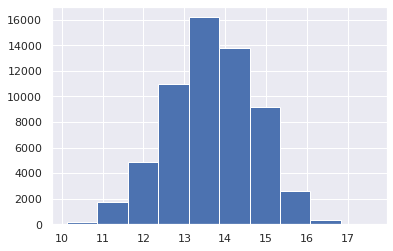

In [58]:
np.log(data['price']).hist()

# Распределение цен не гауссово, но после логарифмирования
# становяться "условно" нормальными
# после удаления слишком больших цен, после логарифмирования стало хуже


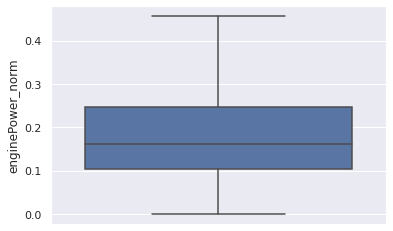

In [6]:
sns.set() # параметры по умолчанию
sns.boxplot( y='enginePower_norm',data=data)
# mileage - убрать значения во всех трех переменных выше IQR
# engineDisplacement enginePower 

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]

In [169]:
len(outliers_iqr(data['mileage_norm']))

1082

In [170]:
len(outliers_iqr(data['engineDisplacement_norm']))

2210

In [171]:
len(outliers_iqr(data['enginePower_norm']))

2566

In [174]:
len(data)

59791

In [169]:
for i in ['mileage_norm','engineDisplacement_norm','enginePower_norm']:
    quartile_1, quartile_3 = np.percentile(data[i], [25, 75])
    iqr = quartile_3 - quartile_1
    low = quartile_1 - (iqr * 1.5)
    up = quartile_3 + (iqr * 1.5)
    data = data[data[i]<up]

In [184]:
len(data)

54547

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'отклонение от начальной даты выпуска машин от цены (норм)'}, xlabel='price', ylabel='enginePower_norm'>

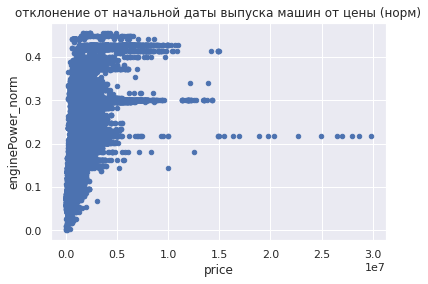

In [40]:
# +modelDate -  смело убираем все что больше 1,5е+7
# +mileage - смело убираем все что больше 1,5е+7
# +engineDisplacement - тоже можем удалить, но наблюдается некая структура
# +enginePower -  тоже удаляем

#  Для МНК очень плохи эти выбросы, так как модель очень чуствительна к этим выбросам

data.plot(x = 'price', 
        y = 'enginePower_norm', 
        kind = 'scatter', 
        grid = True, 
        title = 'отклонение от начальной даты выпуска машин от цены (норм)')

In [19]:

# data = data[data['price']<1500000]
# len(data)
# ПОлучается наш набор данных именно для б/у машин, так как их характеристики наиболее 
# адекватно описываются модулью
# CatBost при логарифмировании давал 11,01% без валидации и стэкинда.. СТАЛО ХУЖЕ
# причем распределение цены тоже стало хуже - нет нормального распределения 
# - поэтому оставляем все данные

40515

# Dataset готов, можно начинать обработку данных

In [170]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt # для построения графиков
import seaborn as sns # библиотека для визуализации статистических данных


In [172]:
y = data['price']
X = data.drop(['price'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,shuffle=True)

#  Модель 1  "наивная" модель

In [62]:
# предсказываем стоимость по модели машины
tmp_train = X_train.copy()
tmp_train['price'] = y_train

predict = X_valid['engineDisplacement_norm'].map(tmp_train.groupby('engineDisplacement_norm')['price'].median())
print(f"Точность наивной модели по метрике MAPE: {(mape(y_valid, predict.values))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 63.58%


# Модель 2 линейная регрессионная модель

In [63]:
lr = LinearRegression()
lr.fit(X_train,np.log(y_train))
#lr.fit(X_train,y_train)

y_pred = lr.predict(X_valid)
print(f"Точность наивной модели по метрике MAPE: {(mape(y_valid, np.exp(y_pred)))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 17.69%


In [64]:
# Регуляризация 
from sklearn.linear_model import Ridge
from sklearn import linear_model

#clf = linear_model.Lasso(alpha=0.00001)
clf = Ridge(alpha=1)
clf.fit(X_train,np.log(y_train))
y_pred = clf.predict(X_valid)
print(f"Точность наивной модели по метрике MAPE: {(mape(y_valid, np.exp(y_pred)))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 17.72%


Регуляризация не дает выигрыша никакого
Так как в наших данных остаются уникальные цены, то мнк делает упор на них - квартет Эскомба

#  Градиентный бустинг

In [177]:
len(y_train)

43637

In [183]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor(n_estimators=500)
clf.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [184]:
print(f"Точность наивной модели по метрике MAPE: {(mape(y_valid, clf.predict(X_valid)))*100:0.2f}%")

Точность наивной модели по метрике MAPE: 15.12%


In [ ]:
from sklearn.model_selection import GridSearchCV

# Зададим ограничения для параметра регуляризации
n_estimators = [300,500]#,700,900]

# Создадим гиперпараметры
hyperparameters = dict(n_estimators=n_estimators)

# n_estimators=100, learning_rate=0.1,
#  ...     max_depth=1

model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=2, verbose=0, n_jobs = -1)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее C:', best_model.best_estimator_.get_params()['n_estimators'])


In [142]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 69.2 MB 12 kB/s  eta 0:00:01    |████▎                           | 9.3 MB 5.6 MB/s eta 0:00:11     |███████▉                        | 16.9 MB 9.3 MB/s eta 0:00:06     |██████████                      | 21.6 MB 7.2 MB/s eta 0:00:07     |████████████████▊               | 36.2 MB 8.6 MB/s eta 0:00:04     |█████████████████████▉          | 47.3 MB 9.3 MB/s eta 0:00:03     |██████████████████████████▋     | 57.5 MB 4.9 MB/s eta 0:00:03     |███████████████████████████████▏| 67.3 MB 7.4 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Модель 3 CatBost параметры по умолчанию

In [68]:
from catboost import CatBoostRegressor
RANDOM_SEED = 42
model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, y_train,
         #cat_features=cat_features_ids,
         eval_set=(X_valid, y_valid),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

model.save_model('catboost_single_model_baseline.model')

In [69]:
# оцениваем точность
predict = model.predict(X_valid)
print(f"Точность модели по метрике MAPE: {(mape(y_valid, predict))*100:0.2f}%")

Точность модели по метрике MAPE: 11.85%


# Модель 4 CatBost логарифм цены

In [70]:
from catboost import CatBoostRegressor
RANDOM_SEED = 42
model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train),
         #cat_features=cat_features_ids,
         eval_set=(X_valid, np.log(y_valid)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

model.save_model('catboost_single_model_baseline.model')

In [71]:
predict_test = np.exp(model.predict(X_valid))
print(f"Точность модели по метрике MAPE: {(mape(y_valid, predict_test))*100:0.2f}%")

Точность модели по метрике MAPE: 11.11%


# Модель 5 CatBost логарифм цены и без one_hot_encoding

Не понятно, как передавать категориальные признаки - поэтому не работает

In [97]:
data1 = pd.read_csv('new_df',sep='\t')
# тестовый Датасэт собирался в сентября 2020 и на текущий момент курс доллара 
# сильно не изменился
data1['price'] = data1['price'].apply(lambda x : int(x))
data1['Владельцы_cat'] = data1['Владельцы']

data1['Date']=data1['modelDate'].apply(lambda x: x - data1['modelDate'].min())
data1['modelDate_norm']=data1['Date'].apply(lambda x: (x-data1['Date'].min())/(data1['Date'].max()-data1['Date'].min()))
data1['mileage_int']=data1['mileage'].apply(lambda x: int(x))
data1['mileage_norm']=data1['mileage_int'].apply(lambda x: (x-data1['mileage_int'].min())/(data1['mileage_int'].max()-data1['mileage_int'].min()))
data1['engineDisplacement_norm']=data1['engineDisplacement'].apply(lambda x: (x-data1['engineDisplacement'].min())/(data1['engineDisplacement'].max()-data1['engineDisplacement'].min()))
data1['enginePower_norm']=data1['enginePower'].apply(lambda x: (x-data1['enginePower'].min())/(data1['enginePower'].max()-data1['enginePower'].min()))

In [ ]:
y = data1['price']
X = data1.drop(['price'], axis=1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2,shuffle=True)

In [104]:
from catboost import CatBoostRegressor
RANDOM_SEED = 42

cat_features_ids = ['brand','bodyType','color',
                    'fuelType','vehicleTransmission','Привод','Руль','ПТС']

model = CatBoostRegressor(iterations = 5000,
                          random_seed = RANDOM_SEED,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train, np.log(y_train),
         cat_features=data1[cat_features_ids],
         eval_set=(X_valid, np.log(y_valid)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )

model.save_model('catboost_single_model_baseline.model')

ValueError: 'brand' is not in list

# Еще одна попытка 

In [158]:
# валидация

cover_train, cover_test = train_test_split(data, test_size=0.3)

cover_y_train, cover_X_train = cover_train['price'], cover_train.drop('price',axis =1)
cover_y_test, cover_X_test = cover_test['price'], cover_test.drop('price',axis =1)

In [160]:
def compute_meta_feature(clf, X_train, X_test, y_train, cv):
    """
    Computes meta-features using the classifier.
    
    :arg clf: scikit-learn classifier
    :args X_train, y_train: training set
    :arg X_test: testing set
    :arg cv: cross-validation folding
    """
    X_meta_train = np.zeros_like(y_train, dtype=np.float32)
    for train_fold_index, predict_fold_index in cv.split(X_train):
        X_fold_train, X_fold_predict = X_train[train_fold_index], X_train[predict_fold_index]
        y_fold_train = y_train[train_fold_index]
        
        folded_clf = clone(clf)
        folded_clf.fit(X_fold_train, y_fold_train)
        X_meta_train[predict_fold_index] = folded_clf.predict_proba(X_fold_predict)[:, 1]
    
    meta_clf = clone(clf)
    meta_clf.fit(X_train, y_train)
    
    X_meta_test = meta_clf.predict_proba(X_test)[:, 1]
    
    return X_meta_train, X_meta_test

In [161]:
def generate_meta_features(classifiers, X_train, X_test, y_train, cv):
    """
    Generates metafeatures using a list of classifiers.
    
    :arg classifiers: list of scikit-learn classifiers
    :args X_train, y_train: training set
    :arg X_test: testing set
    :arg cv: cross-validation folding
    """
    features = [
        compute_meta_feature(clf, X_train, X_test, y_train, cv)
        for clf in tqdm(classifiers)
    ]
    
    stacked_features_train = np.vstack([
        features_train for features_train, features_test in features
    ]).T

    stacked_features_test = np.vstack([
        features_test for features_train, features_test in features
    ]).T
    
    return stacked_features_train, stacked_features_test

In [166]:
from sklearn.model_selection import  KFold
from sklearn.linear_model import Ridge
from sklearn import linear_model
from tqdm import tqdm

cv = KFold(n_splits=10, shuffle=True)
RANDOM_SEED = 42
stacked_features_train, stacked_features_test = generate_meta_features([
    CatBoostRegressor(iterations = 5000,random_seed = RANDOM_SEED,eval_metric='MAPE',custom_metric=['R2', 'MAE'],silent=True,),
    LinearRegression(),
    Ridge(alpha=0.001),
    linear_model.Lasso(alpha=0.01)
], cover_X_train, cover_X_test, cover_y_train.values, cv)

  0%|          | 0/4 [00:00<?, ?it/s]

KeyError: "None of [Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,\n                9,\n            ...\n            38169, 38171, 38172, 38174, 38175, 38176, 38177, 38178, 38179,\n            38181],\n           dtype='int64', length=34363)] are in the [columns]"